In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import cv2
import moviepy.editor as mp
from moviepy.video.io.bindings import mplfig_to_npimage
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from moviepy.editor import VideoFileClip, ImageSequenceClip, CompositeVideoClip
from moviepy.video.io.bindings import mplfig_to_npimage


In [2]:
import json
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random


def timeline_creator(video_file, keysteps, subject_id, trial_id):
        
    # Extract temporal segments from 'keysteps'
    segments = []
    for keystep in keysteps:
        start, end = keystep['start_t'], keystep['end_t']
        label = keystep['label']
        segments.append((start, end, label))


    video_file_name = video_file.split('/')[-1]

    print("Video file:", video_file)
    print("Segments:", segments)

    # Generate a custom color palette for unique labels
    unique_labels = sorted(set([label for _, _, label in segments]))
    palette = sns.color_palette("muted", len(unique_labels))

    # Shuffle the palette to randomize the color assignment
    random.shuffle(palette)

    color_map = {label: palette[i] for i, label in enumerate(unique_labels)}


    plot_output_dir = f"./output/plot/{subject_id}/{trial_id}"
    os.makedirs(plot_output_dir, exist_ok=True)

    # Open video file
    cap = cv2.VideoCapture(video_file)

    if not cap.isOpened():
        print("Error: Could not open video.")
    else:
        fps = cap.get(cv2.CAP_PROP_FPS)

        if fps == 0:
            print("Error: FPS value is zero, which might indicate an issue with the video file.")
        else:
            # Plot timeline
            fig, ax = plt.subplots(figsize=(10, 4))
            ax.set_xlim(0, max([end for _, end, _ in segments]))
            ax.set_ylim(0, 1)

            # Remove y-axis ticks, labels, and spines
            ax.yaxis.set_ticks([])
            ax.yaxis.set_ticklabels([])
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            # Set x-axis label
            ax.set_xlabel("Time (seconds)")

            # Track labels added to the legend
            labels_added = set()

            # Draw bars for each segment
            for start, end, label in segments:
                color = color_map[label]
                if label not in labels_added:
                    ax.broken_barh([(start, end - start)], (0.25, 0.5), facecolors=color, label=label)
                    labels_added.add(label)
                else:
                    ax.broken_barh([(start, end - start)], (0.25, 0.5), facecolors=color)

            # Add legend below the x-axis
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=4, frameon=False)

            # Sync video playback
            def update(frame):
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
                ret, frame_img = cap.read()
                if ret:
                    plt.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))
                return frame_img

            ani = FuncAnimation(fig, update, frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), interval=1000/fps)

            
            plt.tight_layout()

            # Save the timeline plot
            
            file_name = f"{video_file_name.split('.')[0]}_video_timeline"
            fig.savefig(f'{plot_output_dir}/{file_name}_timeline.png', bbox_inches='tight', transparent=True)

            plt.show()


            # Transparent version

            #         # Now create the transparent version with only the color bars
            # fig_transparent, ax_transparent = plt.subplots(figsize=(10, 4))
            # ax_transparent.set_xlim(0, max([end for _, end, _ in segments]))
            # ax_transparent.set_ylim(0, 1)

            # # Remove all axis elements for transparent version
            # ax_transparent.axis('off')

            # # Draw bars for each segment
            # for start, end, label in segments:
            #     color = color_map[label]
            #     ax_transparent.broken_barh([(start, end - start)], (0.25, 0.5), facecolors=color)

            
            # # Save the transparent version as PNG
            # fig_transparent.savefig(f'{plot_output_dir}/{file_name}_bars_only.png', bbox_inches='tight', transparent=True)

            # plt.show()

            
            # Now create another figure with x-axis and no legend
            fig_no_legend, ax_no_legend = plt.subplots(figsize=(16, 2))
            ax_no_legend.set_xlim(0, max([end for _, end, _ in segments]))
            ax_no_legend.set_ylim(0, 1)

            
            # Remove y-axis ticks, labels, and spines
            ax_no_legend.yaxis.set_ticks([])
            ax_no_legend.yaxis.set_ticklabels([])
            ax_no_legend.spines['left'].set_visible(False)
            ax_no_legend.spines['right'].set_visible(False)
            ax_no_legend.spines['top'].set_visible(False)

            # Set x-axis label
            ax_no_legend.set_xlabel("Time (seconds)")

            # Draw bars for each segment (same as before, but without the legend)
            for start, end, label in segments:
                color = color_map[label]
                ax_no_legend.broken_barh([(start, end - start)], (0.25, 0.5), facecolors=color)

            # Save the no-legend plot
            file_name_no_legend = f"{video_file_name.split('.')[0]}video_timeline_no_legend"
            fig_no_legend.savefig(f'{plot_output_dir}/{file_name_no_legend}_timeline.png', bbox_inches='tight', transparent=True)

            plt.show()

    cap.release()

**************************************************
Subject: ms1, Trial: 0
GoPro file name: GX010391_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/0/GoPro/GX010391_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/0/GoPro/GX010391_encoded_trimmed.mp4
Segments: [(0, 6.60863, 'approach_patient'), (6.609, 11.41892, 'check_responsiveness'), (13.395, 15.77309, 'check_breathing'), (11.419, 15.77309, 'check_pulse'), (19.50903, 22.50903, 'request_assistance'), (30.50903, 33.59237, 'turn_on_aed'), (33.884, 44.13068, 'attach_defib_pads'), (22.509, 25.11386, 'request_aed'), (66.6757, 72.67494, 'attach_defib_pads'), (15.773, 83.70723, 'chest_compressions'), (83.707, 88.1881, 'no_action')]


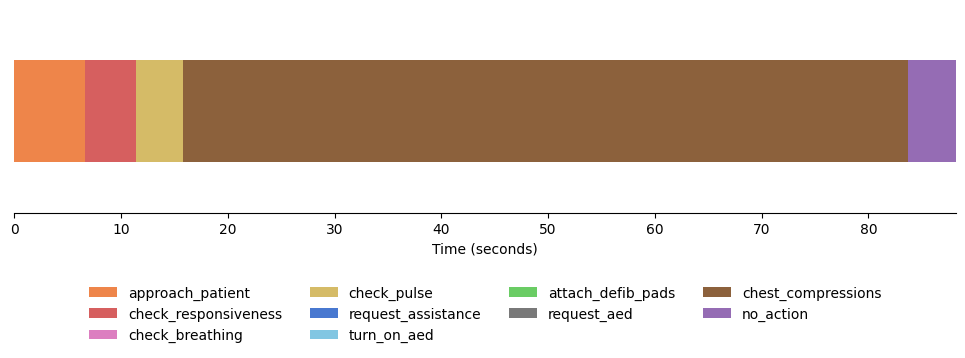

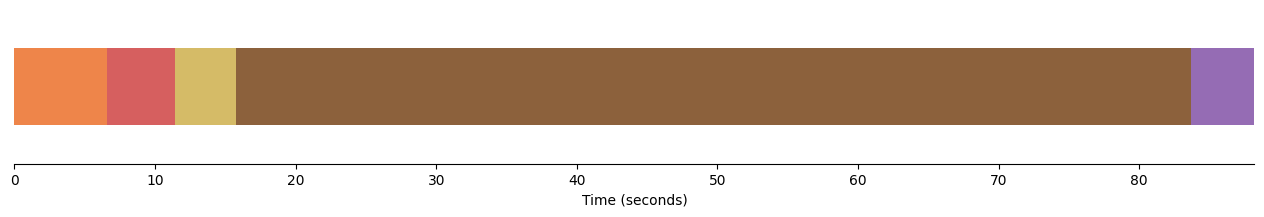

Subject: ms1, Trial: 1
GoPro file name: GX010392_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/1/GoPro/GX010392_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/1/GoPro/GX010392_encoded_trimmed.mp4
Segments: [(0, 5.70439, 'approach_patient'), (5.704, 7.98142, 'check_responsiveness'), (7.981, 11.89809, 'check_pulse'), (9.215, 11.89809, 'check_breathing'), (11.898, 54.21285, 'chest_compressions'), (16.42118, 18.355, 'request_assistance'), (18.355, 21.3535, 'request_aed'), (37.238, 39.03705, 'turn_on_aed'), (40.296, 50.27991, 'attach_defib_pads'), (54.213, 60.29618, 'clear_for_analysis'), (60.296, 67.82259, 'clear_for_shock'), (67.823, 74.82472, 'administer_shock_aed'), (74.825, 96.5488, 'chest_compressions'), (77.808, 82.85538, 'place_bvm'), (80.5271, 83.027, 'open_airway'), (100.741, 119.93882, 'chest_compressions'), (119.939, 123

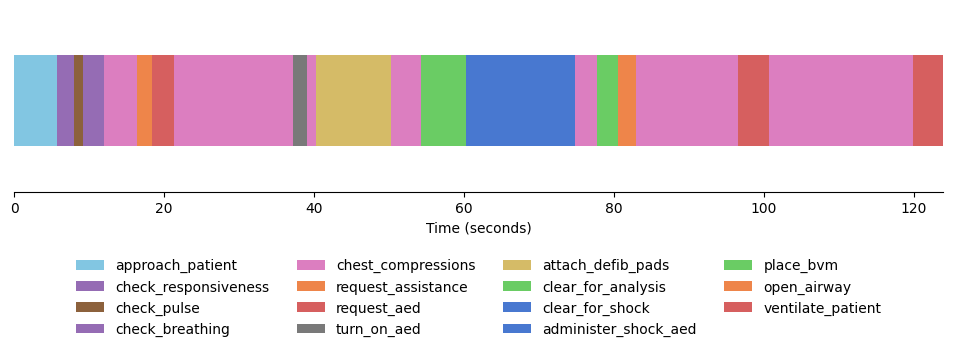

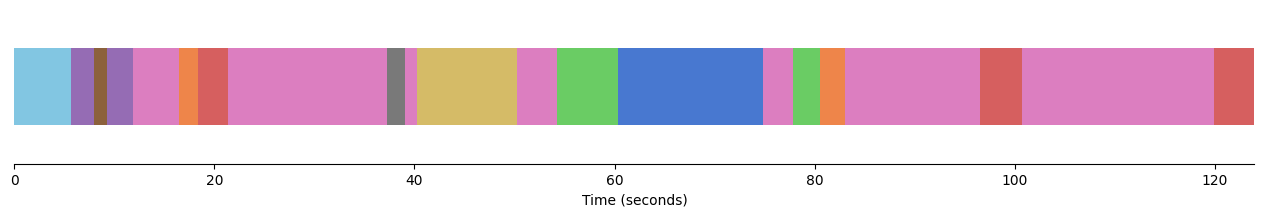

Subject: ms1, Trial: 2
GoPro file name: GX010393_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/2/GoPro/GX010393_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/2/GoPro/GX010393_encoded_trimmed.mp4
Segments: [(0, 3.44495, 'approach_patient'), (3.445, 6.04392, 'check_responsiveness'), (6.044, 11.25226, 'check_pulse'), (7.539, 11.25226, 'check_breathing'), (14.729, 16.50268, 'request_assistance'), (17.37839, 19.03464, 'request_aed'), (22.81589, 24.65964, 'turn_on_aed'), (24.66, 36.36536, 'attach_defib_pads'), (11.252, 37.79145, 'chest_compressions'), (37.791, 45.59567, 'clear_for_analysis'), (45.596, 52.38177, 'clear_for_shock'), (52.382, 58.00677, 'administer_shock_aed'), (58.007, 78.69427, 'chest_compressions'), (57.151, 59.362, 'place_bvm'), (84.005, 127.2771, 'chest_compressions'), (127.277, 133.634, 'ventilate_patient'), (78.6

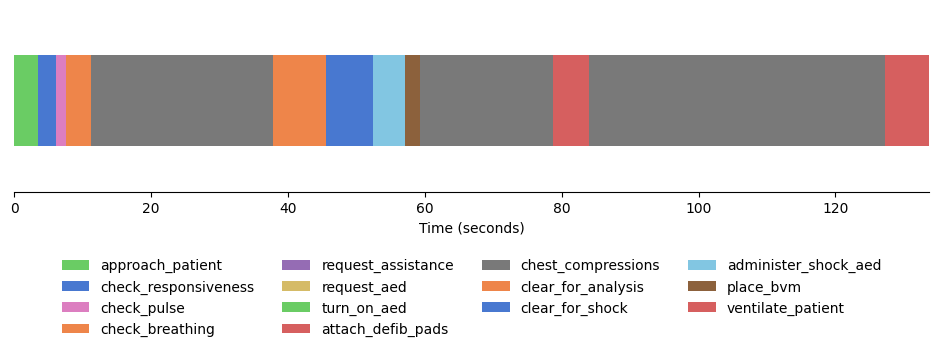

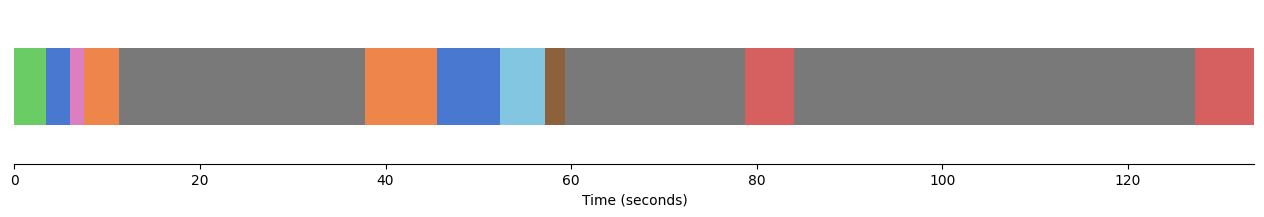

Subject: ms1, Trial: 3
GoPro file name: GX010394_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/3/GoPro/GX010394_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/3/GoPro/GX010394_encoded_trimmed.mp4
Segments: [(0, 3.35642, 'approach_patient'), (3.356, 6.27612, 'check_responsiveness'), (6.276, 10.50226, 'check_breathing'), (6.276, 10.50226, 'check_pulse'), (12.768, 15.88177, 'request_assistance'), (18.06927, 20.00543, 'request_aed'), (22.38177, 26.95683, 'turn_on_aed'), (25.632, 33.38177, 'attach_defib_pads'), (36.78, 44.50677, 'clear_for_analysis'), (44.507, 50.63177, 'clear_for_shock'), (50.632, 55.8612, 'administer_shock_aed'), (10.502, 36.78013, 'chest_compressions'), (55.861, 76.50677, 'chest_compressions'), (55.226, 57.82193, 'place_bvm'), (57.822, 60.65946, 'open_airway'), (76.507, 81.90296, 'ventilate_patient'), (81.903, 10

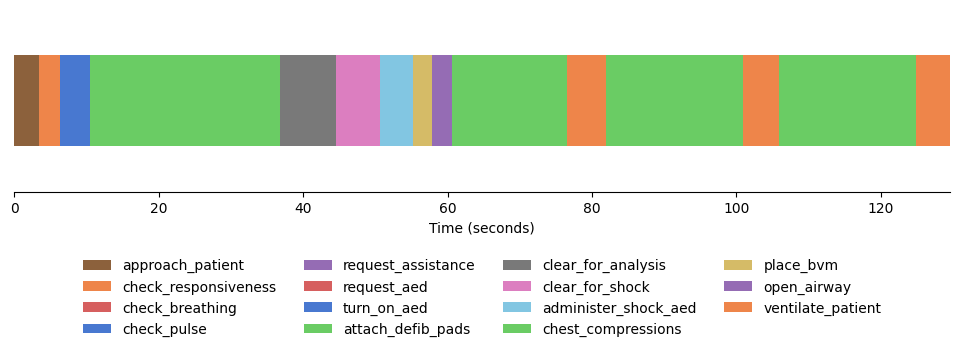

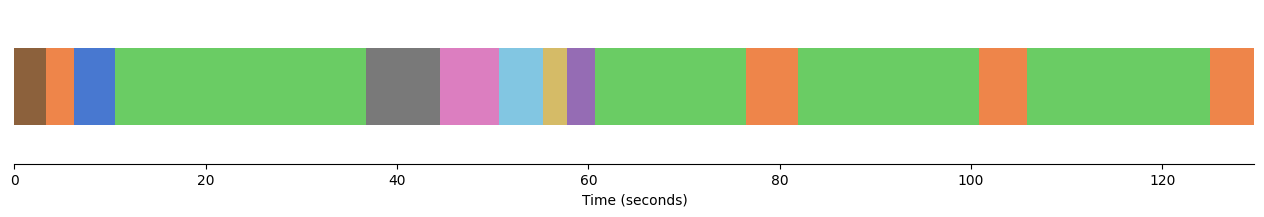

Subject: ms1, Trial: 4
GoPro file name: GX010400_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/4/GoPro/GX010400_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/4/GoPro/GX010400_encoded_trimmed.mp4
Segments: [(0, 2.41892, 'approach_patient'), (2.419, 5.27309, 'check_responsiveness'), (5.273, 12.52309, 'check_pulse'), (5.273, 12.52309, 'check_breathing'), (87.629, 92.092, 'no_action'), (17.00903, 19.50903, 'request_assistance'), (19.509, 21.31812, 'request_aed'), (31.00903, 34.11306, 'turn_on_aed'), (33.09237, 42.37848, 'attach_defib_pads'), (12.523, 87.62901, 'chest_compressions')]


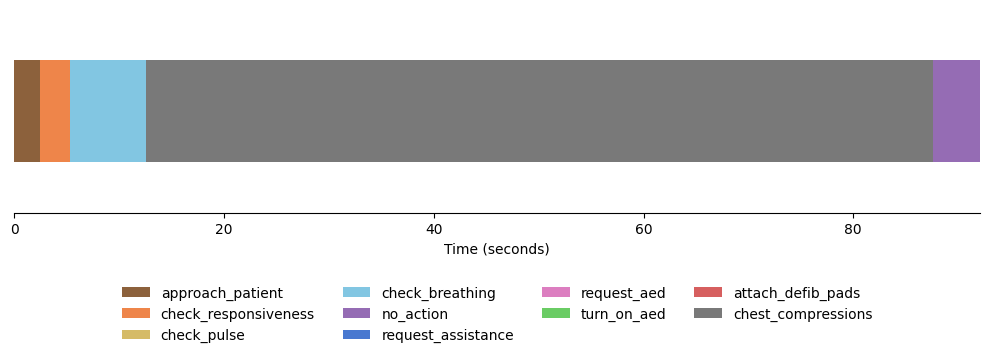

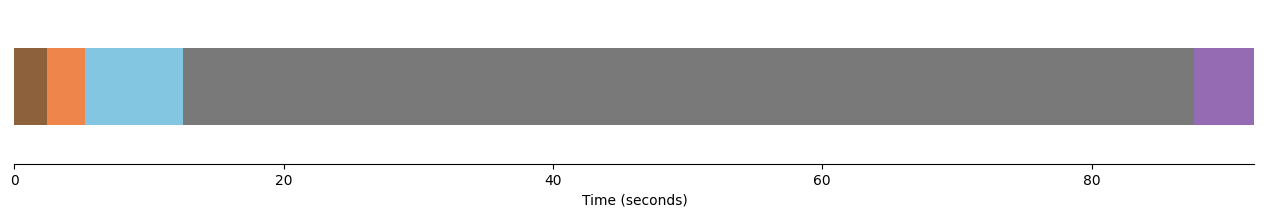

Subject: ms1, Trial: 5
GoPro file name: GX010401_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/5/GoPro/GX010401_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms1/cardiac_arrest/5/GoPro/GX010401_encoded_trimmed.mp4
Segments: [(0, 2.77309, 'approach_patient'), (2.773, 4.41892, 'check_responsiveness'), (4.419, 8.94083, 'check_pulse'), (5.71059, 8.94083, 'check_breathing'), (10.30542, 12.206, 'request_assistance'), (12.40542, 14.077, 'request_aed'), (17.403, 19.48413, 'turn_on_aed'), (19.18, 37.61976, 'attach_defib_pads'), (8.941, 38.90508, 'chest_compressions'), (38.905, 47.55542, 'clear_for_analysis'), (47.555, 53.67079, 'clear_for_shock'), (53.671, 59.32767, 'administer_shock_aed'), (59.637, 62.13368, 'place_bvm'), (80.287, 85.2108, 'ventilate_patient'), (104.094, 108.99942, 'ventilate_patient'), (127.896, 133.4333, 'ventilate_patient')]


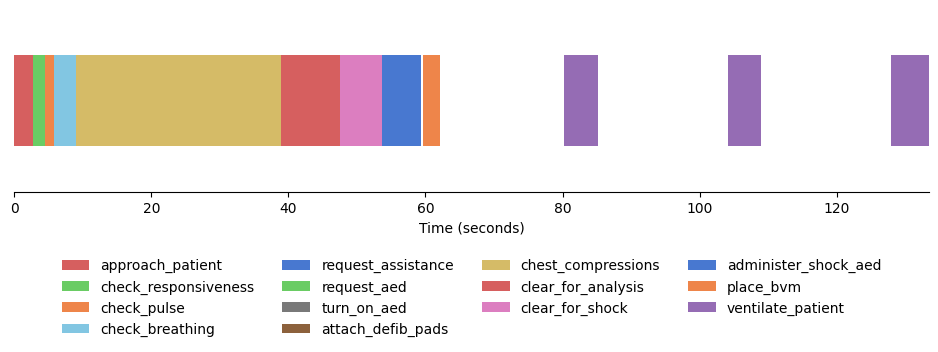

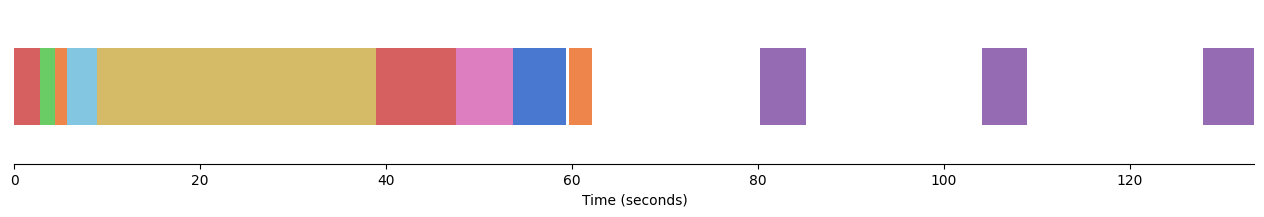

**************************************************
Subject: ms2, Trial: 0
GoPro file name: GX010395_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/0/GoPro/GX010395_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/0/GoPro/GX010395_encoded_trimmed.mp4
Segments: [(0, 2.42578, 'approach_patient'), (2.426, 4.45271, 'check_responsiveness'), (4.453, 9.15271, 'check_pulse'), (7.103, 9.15271, 'check_breathing'), (11.00542, 12.70542, 'request_assistance'), (12.705, 13.705, 'request_aed'), (23.70542, 26.67502, 'turn_on_aed'), (27.623, 47.36342, 'attach_defib_pads'), (49.855, 58.57078, 'clear_for_analysis'), (9.153, 49.85542, 'chest_compressions'), (58.571, 65.20542, 'clear_for_shock'), (65.205, 70.52308, 'administer_shock_aed'), (70.523, 90.17118, 'chest_compressions'), (90.171, 95.36862, 'ventilate_patient'), (95.369, 115.42504, 'chest_comp

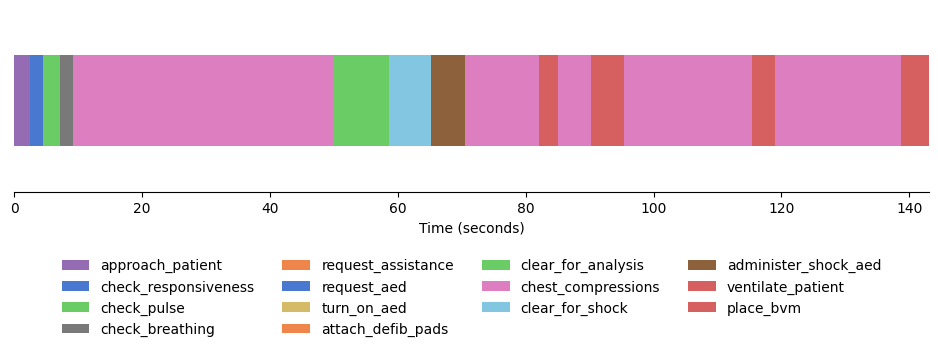

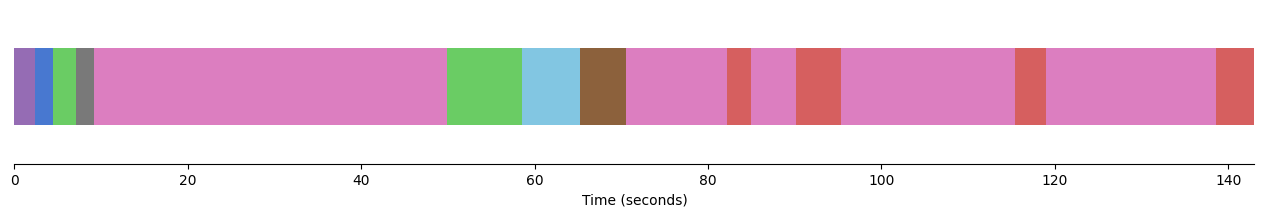

Subject: ms2, Trial: 1
GoPro file name: GX010396_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/1/GoPro/GX010396_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/1/GoPro/GX010396_encoded_trimmed.mp4
Segments: [(0, 2.96571, 'approach_patient'), (2.966, 5.04392, 'check_responsiveness'), (5.044, 9.05527, 'check_pulse'), (8.227, 9.227, 'check_breathing'), (11.00677, 11.703, 'request_assistance'), (11.878, 12.878, 'request_aed'), (23.69427, 26.368, 'turn_on_aed'), (27.19427, 40.26431, 'attach_defib_pads'), (9.227, 44.13177, 'chest_compressions'), (44.132, 53.26805, 'clear_for_analysis'), (53.268, 60.6981, 'clear_for_shock'), (60.698, 63.06927, 'administer_shock_aed'), (63.069, 85.82299, 'chest_compressions'), (62.38177, 64.50677, 'place_bvm'), (85.823, 90.16741, 'ventilate_patient'), (90.167, 110.0508, 'chest_compressions'), (110.051, 

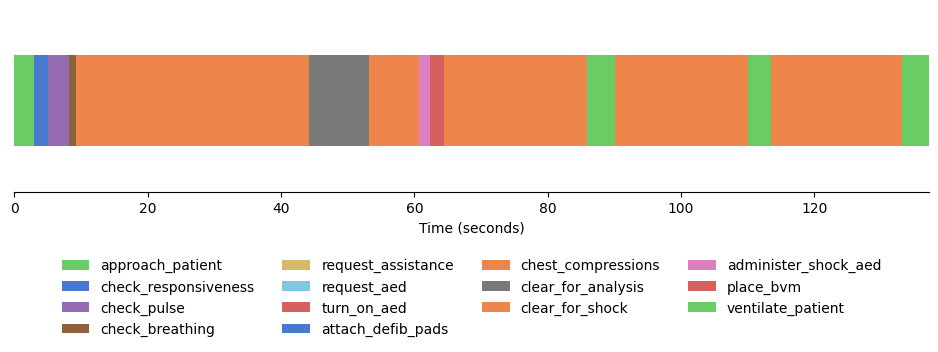

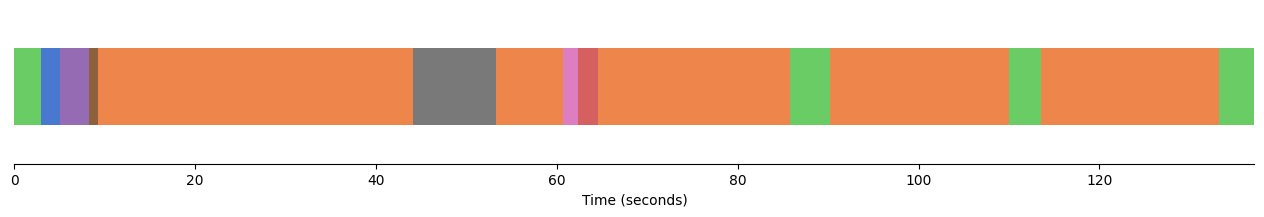

Subject: ms2, Trial: 2
GoPro file name: GX010397_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/2/GoPro/GX010397_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/2/GoPro/GX010397_encoded_trimmed.mp4
Segments: [(2.25226, 3.54392, 'check_responsiveness'), (3.544, 9.24713, 'check_pulse'), (0, 2.25226, 'approach_patient'), (3.544, 9.24713, 'check_breathing'), (13.012, 14.012, 'request_assistance'), (14.12726, 15.012, 'request_aed'), (27.326, 32.11415, 'attach_defib_pads'), (36.502, 39.001, 'turn_on_aed'), (41.704, 49.59321, 'attach_defib_pads'), (9.247, 71.72782, 'chest_compressions'), (71.728, 79.92128, 'clear_for_analysis'), (79.921, 85.95238, 'clear_for_shock'), (85.952, 89.98971, 'administer_shock_aed'), (89.99, 111.17823, 'chest_compressions'), (92.9257, 95.581, 'place_bvm'), (115.012, 134.53538, 'chest_compressions'), (111.178, 

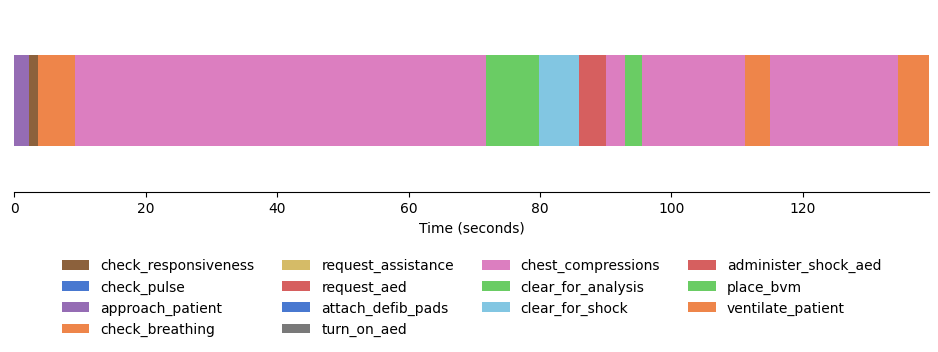

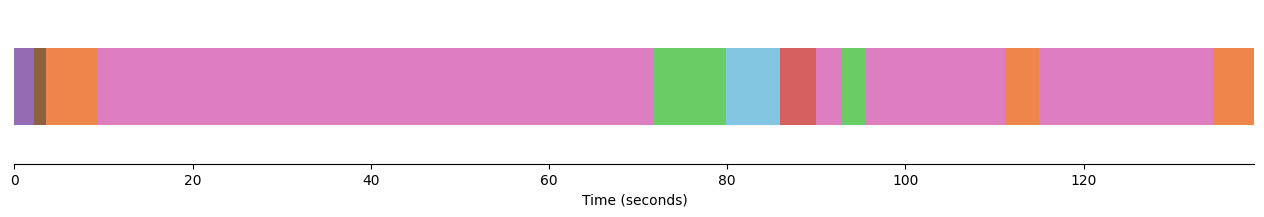

Subject: ms2, Trial: 3
GoPro file name: GX010398_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/3/GoPro/GX010398_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/3/GoPro/GX010398_encoded_trimmed.mp4
Segments: [(0, 2.81476, 'approach_patient'), (2.815, 5.77309, 'check_responsiveness'), (5.773, 11.79392, 'check_pulse'), (5.773, 11.79392, 'check_breathing'), (11.794, 69.63177, 'chest_compressions'), (15.464, 16.25677, 'request_assistance'), (16.257, 17.257, 'request_aed'), (23.69427, 27.003, 'turn_on_aed'), (27.13177, 67.73565, 'attach_defib_pads'), (69.632, 78.236, 'clear_for_analysis'), (78.236, 85.18161, 'clear_for_shock'), (85.182, 88.44025, 'administer_shock_aed'), (88.44, 110.0271, 'chest_compressions'), (113.976, 134.04365, 'chest_compressions'), (88.5271, 92.0989, 'place_bvm'), (110.589, 113.97553, 'ventilate_patient'), (134.

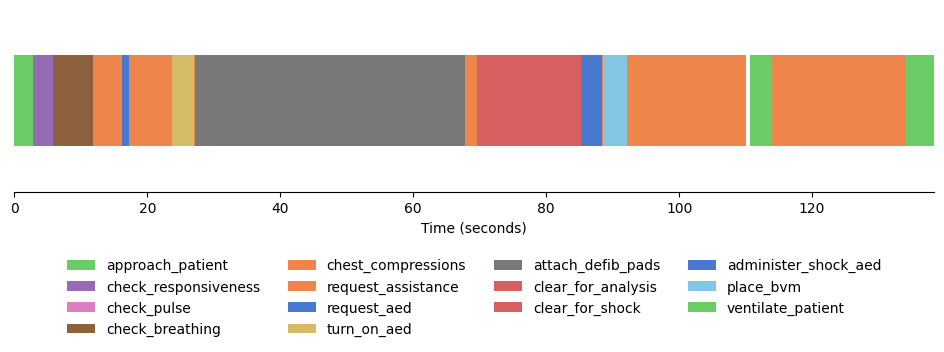

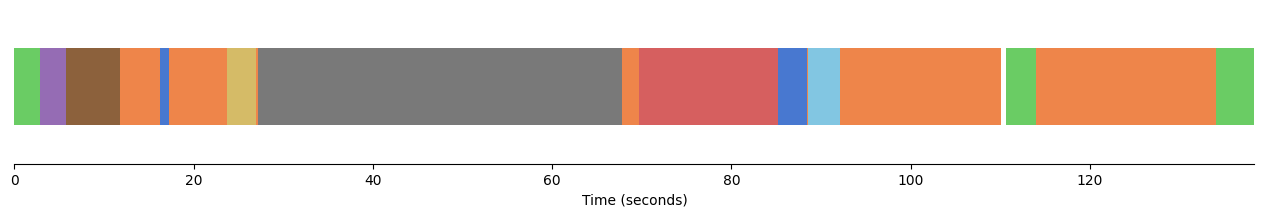

Subject: ms2, Trial: 4
GoPro file name: GX010399_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/4/GoPro/GX010399_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ms2/cardiac_arrest/4/GoPro/GX010399_encoded_trimmed.mp4
Segments: [(0, 2.4702, 'approach_patient'), (2.47, 6.00226, 'check_responsiveness'), (6.002, 11.29282, 'check_pulse'), (6.002, 11.29282, 'check_breathing'), (12.34237, 14.179, 'request_assistance'), (14.179, 15.179, 'request_aed'), (26.176, 28.34743, 'turn_on_aed'), (28.415, 43.12254, 'attach_defib_pads'), (44.874, 55.22806, 'clear_for_analysis'), (55.228, 60.13378, 'clear_for_shock'), (60.134, 65.09706, 'administer_shock_aed'), (62.842, 66.75903, 'place_bvm'), (11.293, 44.87387, 'chest_compressions'), (65.097, 83.94818, 'chest_compressions'), (90.724, 110.34237, 'chest_compressions'), (114.654, 134.42899, 'chest_compressions'), (83.94

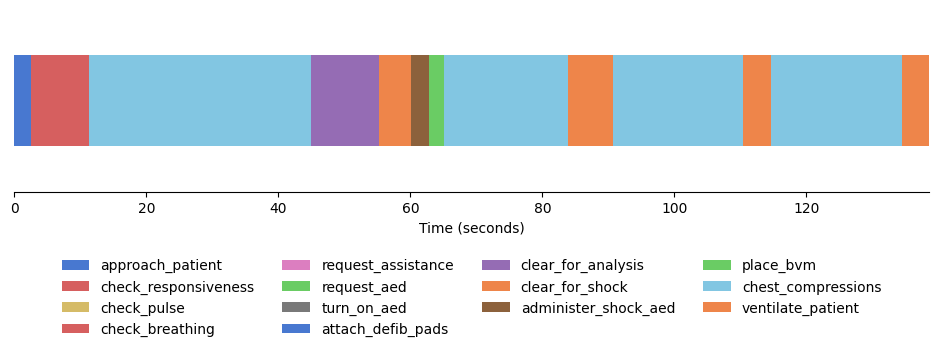

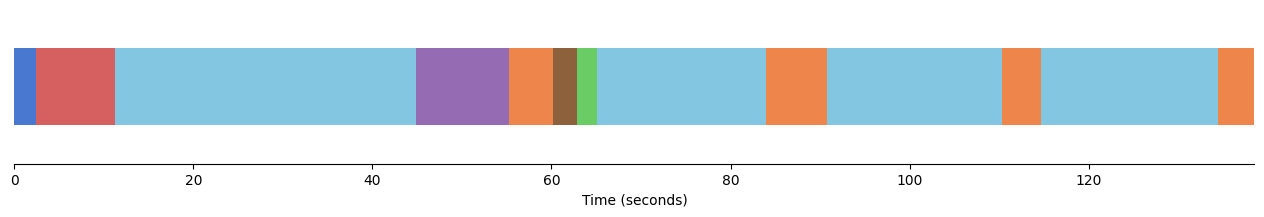

**************************************************
Subject: ng1, Trial: 0
GoPro file name: GX010339_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng1/cardiac_arrest/0/GoPro/GX010339_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng1/cardiac_arrest/0/GoPro/GX010339_encoded_trimmed.mp4
Segments: [(5.752, 10.33245, 'ventilate_patient'), (23.544, 28.53568, 'ventilate_patient'), (0, 5.75226, 'chest_compressions'), (10.332, 23.54392, 'chest_compressions'), (28.536, 29.67118, 'chest_compressions'), (29.671, 32.17118, 'turn_on_aed'), (32.171, 37.92118, 'no_action'), (37.921, 47.21285, 'clear_for_analysis'), (47.213, 53.98798, 'clear_for_shock'), (60.444, 63.094, 'check_pulse'), (53.988, 71.13773, 'no_action')]


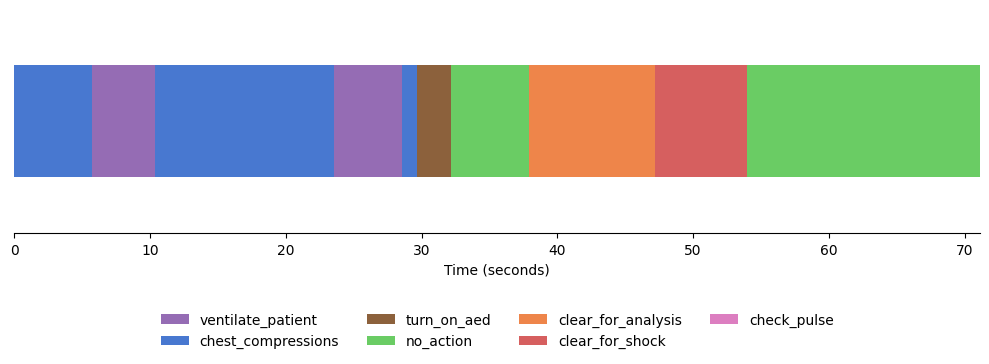

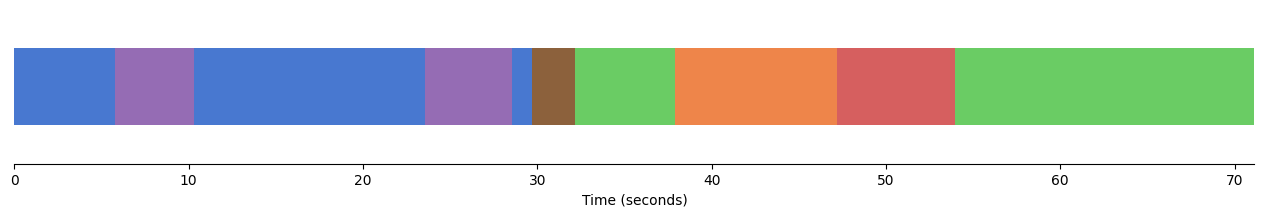

Subject: ng1, Trial: 1
GoPro file name: GX010340_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng1/cardiac_arrest/1/GoPro/GX010340_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng1/cardiac_arrest/1/GoPro/GX010340_encoded_trimmed.mp4
Segments: [(3.012, 7.41892, 'approach_patient'), (0, 3.012, 'no_action'), (7.419, 12.89809, 'check_responsiveness'), (12.898, 16.98449, 'check_pulse'), (15.69, 16.93083, 'place_bvm'), (16.984, 32.75657, 'chest_compressions'), (33.639, 35.726, 'open_airway'), (44.88855, 51.311, 'attach_defib_pads'), (39.119, 41.76355, 'request_aed'), (37.077, 52.93563, 'chest_compressions'), (52.936, 61.13855, 'clear_for_analysis'), (61.139, 69.26355, 'clear_for_shock'), (69.264, 74.80401, 'administer_shock_aed'), (75.905, 78.16007, 'place_bvm'), (79.76355, 86.08937, 'ventilate_patient'), (78.16, 79.76355, 'open_airway'), (32.757, 37.07691, 'ventilate_p

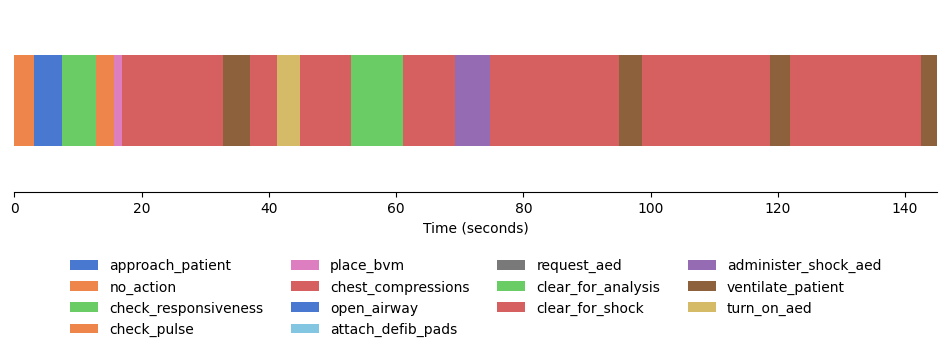

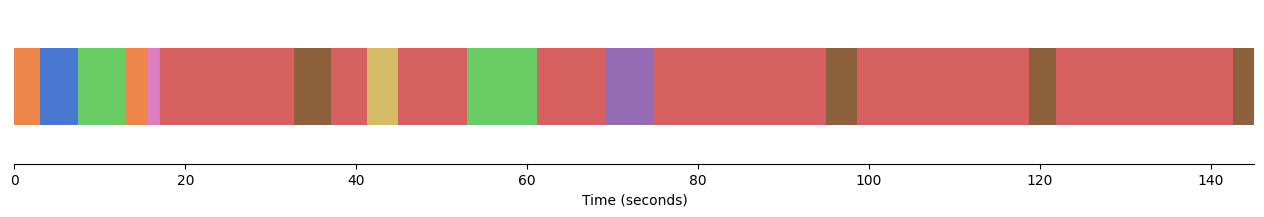

**************************************************
Subject: ng2, Trial: 0
GoPro file name: GX010341_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng2/cardiac_arrest/0/GoPro/GX010341_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng2/cardiac_arrest/0/GoPro/GX010341_encoded_trimmed.mp4
Segments: [(0, 5.76254, 'approach_patient'), (5.763, 10.40004, 'check_responsiveness'), (10.4, 32.00903, 'chest_compressions'), (12.509, 14.32131, 'place_bvm'), (37.176, 54.73433, 'chest_compressions'), (57.509, 59.63255, 'request_aed'), (14.321, 16.25903, 'ventilate_patient'), (32.009, 37.1757, 'ventilate_patient'), (54.734, 59.67973, 'ventilate_patient'), (66.889, 69.12782, 'turn_on_aed'), (69.128, 76.00668, 'attach_defib_pads'), (59.68, 91.76355, 'chest_compressions'), (91.764, 102.39023, 'clear_for_analysis'), (102.39, 108.26355, 'clear_for_shock'), (108.264, 113.01355, 'administer

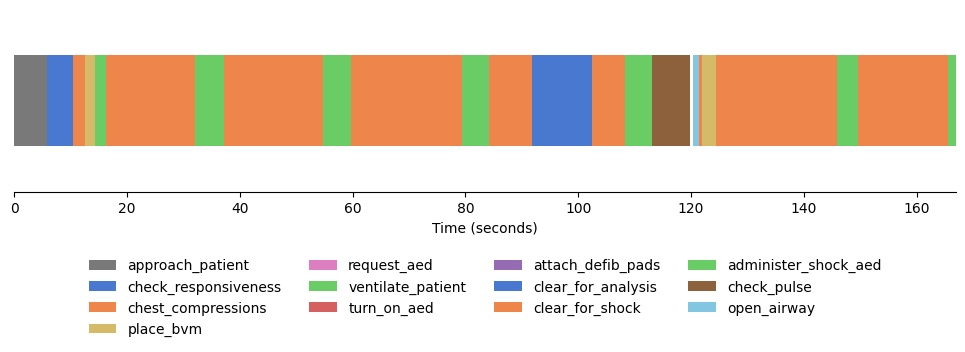

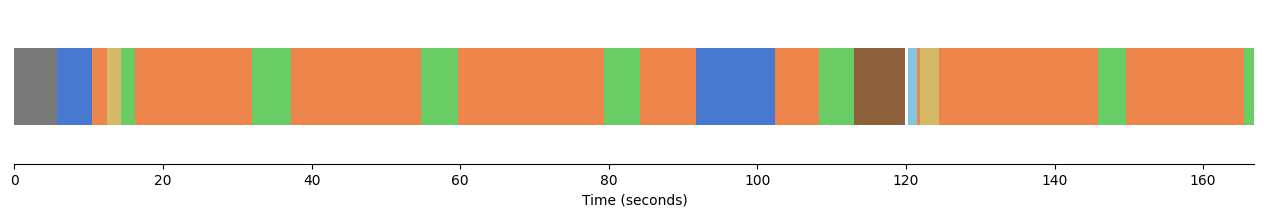

Subject: ng2, Trial: 1
GoPro file name: GX010342_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng2/cardiac_arrest/1/GoPro/GX010342_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng2/cardiac_arrest/1/GoPro/GX010342_encoded_trimmed.mp4
Segments: [(0, 7.30762, 'no_action'), (7.308, 10.5271, 'approach_patient'), (10.527, 14.20578, 'check_responsiveness'), (14.206, 15.79474, 'check_pulse'), (15.795, 32.56111, 'chest_compressions'), (16.7771, 19.47466, 'place_bvm'), (34.027, 110.2771, 'chest_compressions'), (53.5271, 62.85648, 'request_aed'), (61.7771, 68.7322, 'attach_defib_pads'), (68.732, 72.11656, 'turn_on_aed'), (97.538, 110.73521, 'attach_defib_pads'), (110.5271, 119.63603, 'clear_for_analysis'), (119.636, 128.19894, 'clear_for_shock'), (128.199, 133.0271, 'administer_shock_aed'), (133.027, 135.21823, 'check_pulse'), (134.0271, 135.5271, 'open_airway'), (135.527, 1

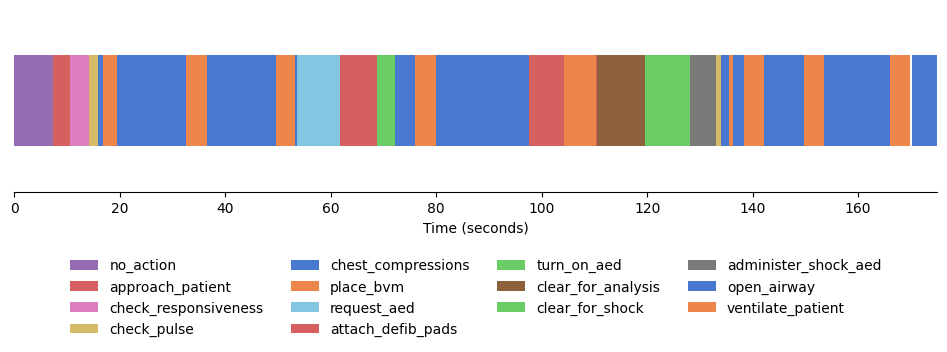

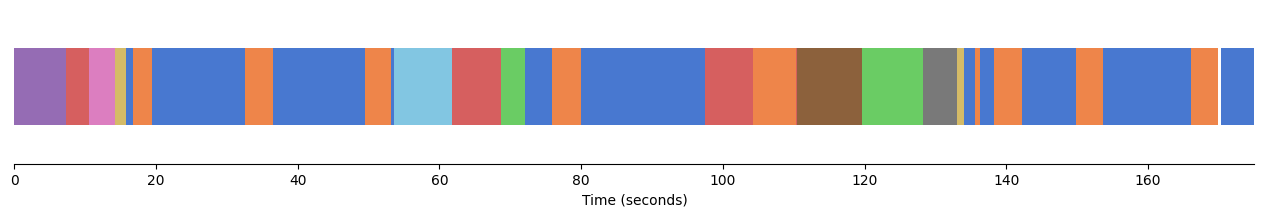

**************************************************
Subject: ng3, Trial: 0
GoPro file name: GX010332_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/0/GoPro/GX010332_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/0/GoPro/GX010332_encoded_trimmed.mp4
Segments: [(0.02, 83.45542, 'no_action'), (83.455, 87.48384, 'check_responsiveness'), (87.484, 90.63855, 'check_pulse'), (90.639, 94.03855, 'check_breathing'), (94.039, 95.94588, 'request_assistance'), (95.946, 111.21192, 'chest_compressions'), (111.212, 112.57137, 'open_airway'), (112.571, 114.04788, 'place_bvm'), (114.048, 121.10421, 'ventilate_patient'), (122.07834, 123.07834, 'check_pulse'), (123.078, 129.4614, 'attach_defib_pads'), (129.461, 137.76674, 'turn_on_aed'), (137.767, 151.96242, 'clear_for_analysis'), (151.962, 156.22509, 'clear_for_shock'), (156.225, 161.461, 'administe

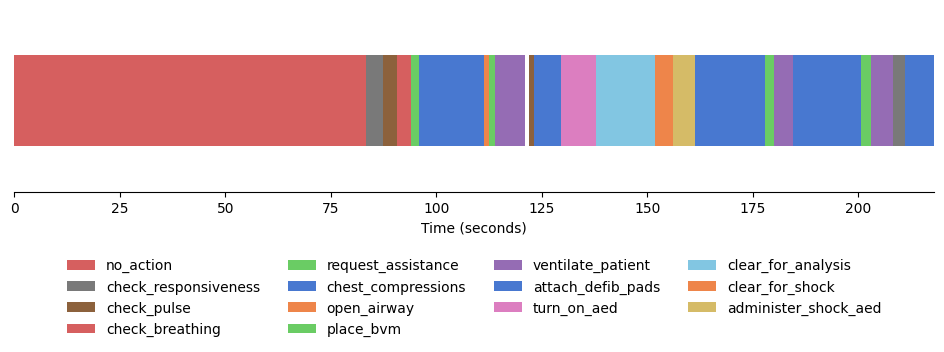

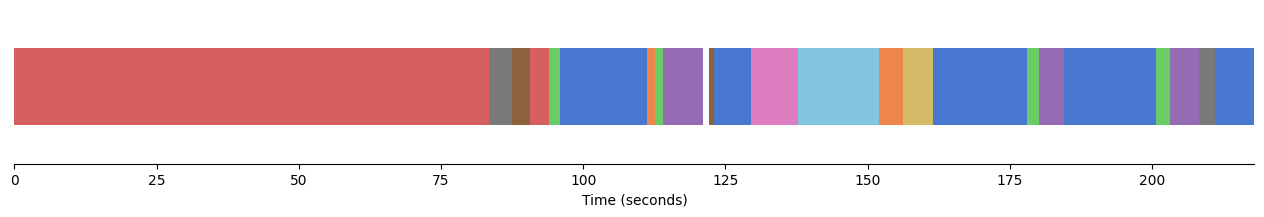

Subject: ng3, Trial: 1
GoPro file name: GX010333_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/1/GoPro/GX010333_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/1/GoPro/GX010333_encoded_trimmed.mp4
Segments: [(0, 4.35164, 'check_responsiveness'), (4.352, 8.00857, 'check_pulse'), (8.009, 12.38041, 'check_breathing'), (12.38, 27.54618, 'chest_compressions'), (27.546, 30.17738, 'place_bvm'), (30.177, 35.5336, 'ventilate_patient'), (35.534, 50.35087, 'chest_compressions'), (50.351, 52.42162, 'place_bvm'), (52.422, 56.54174, 'ventilate_patient'), (56.542, 59.94014, 'check_pulse'), (59.94, 65.8699, 'attach_defib_pads'), (65.87, 84.77008, 'turn_on_aed'), (84.77, 89.11108, 'attach_defib_pads'), (89.111, 93.06222, 'turn_on_aed'), (93.062, 107.52531, 'clear_for_analysis'), (107.525, 110.75608, 'clear_for_shock'), (110.756, 117.02587, 'admi

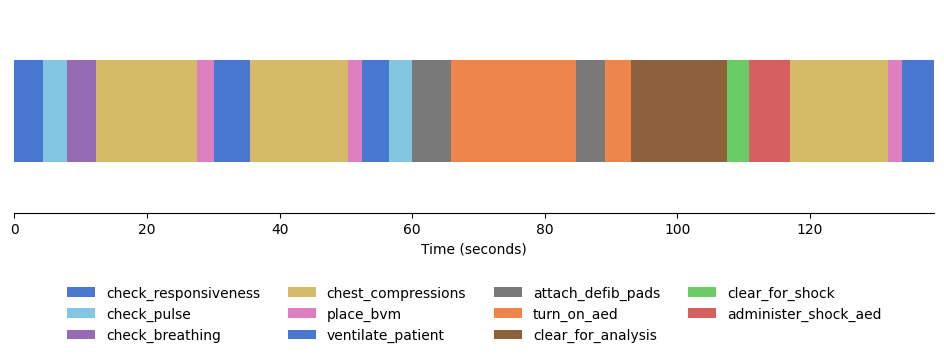

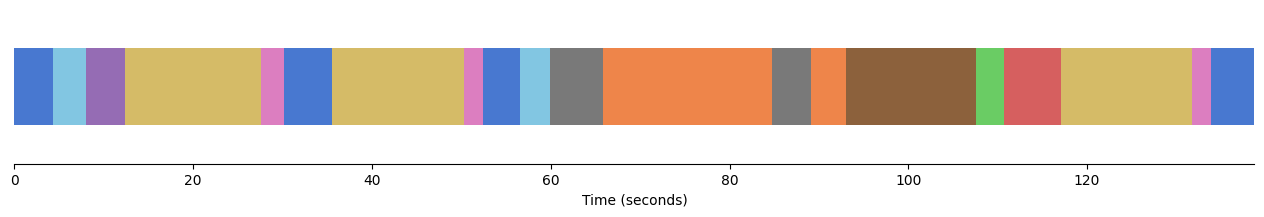

Subject: ng3, Trial: 10
GoPro file name: GX010375_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/10/GoPro/GX010375_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/10/GoPro/GX010375_encoded_trimmed.mp4
Segments: [(0, 3.0789, 'no_action'), (3.079, 4.83824, 'check_responsiveness'), (4.838, 7.48728, 'check_pulse'), (7.487, 10.94902, 'check_breathing'), (10.949, 11.5822, 'request_assistance'), (11.582, 14.17265, 'request_aed'), (14.173, 29.10017, 'chest_compressions'), (15.898, 22.71989, 'turn_on_aed'), (22.72, 29.10017, 'place_bvm'), (29.1, 32.93033, 'ventilate_patient'), (32.93, 48.2034, 'chest_compressions'), (33.691, 45.61452, 'attach_defib_pads'), (45.615, 48.2034, 'place_bvm'), (48.203, 51.83065, 'ventilate_patient'), (51.831, 55.27207, 'attach_defib_pads'), (55.272, 69.75456, 'clear_for_analysis'), (69.755, 72.75117, 'clear_for

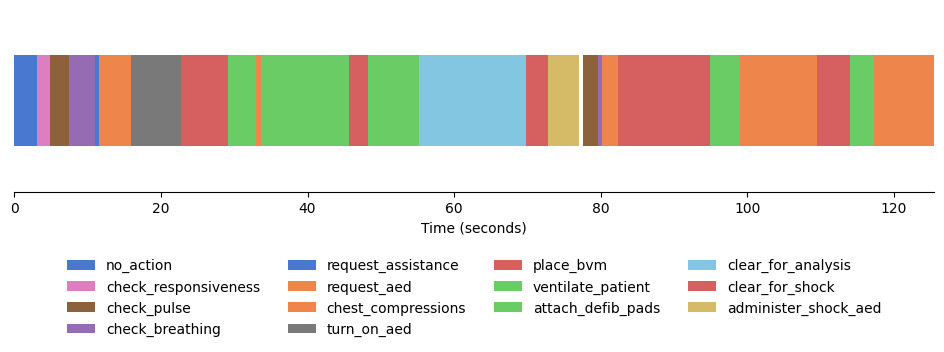

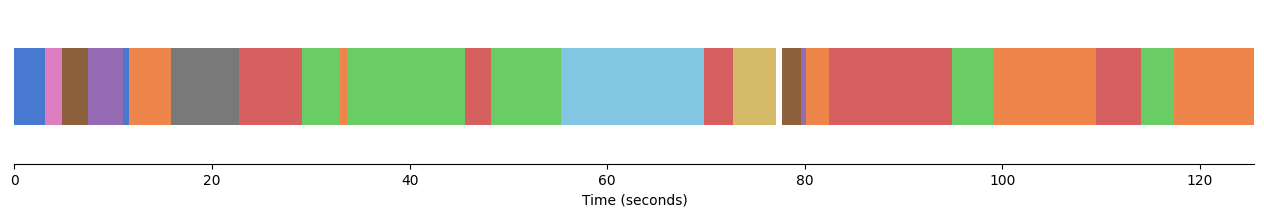

Subject: ng3, Trial: 11
GoPro file name: GX010376_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/11/GoPro/GX010376_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/11/GoPro/GX010376_encoded_trimmed.mp4
Segments: [(0, 2.30995, 'no_action'), (2.31, 3.75527, 'check_responsiveness'), (3.755, 5.87644, 'check_pulse'), (5.876, 9.18787, 'check_breathing'), (9.188, 10.05312, 'request_assistance'), (10.053, 12.17708, 'request_aed'), (12.177, 27.23649, 'chest_compressions'), (27.236, 28.78574, 'place_bvm'), (28.786, 32.41204, 'ventilate_patient'), (32.412, 47.25677, 'chest_compressions'), (32.412, 40.7193, 'turn_on_aed'), (40.719, 47.25677, 'place_bvm'), (47.257, 50.73107, 'ventilate_patient'), (50.731, 65.58986, 'chest_compressions'), (51.62, 63.39988, 'attach_defib_pads'), (63.4, 65.04882, 'place_bvm'), (63.4, 77.54795, 'clear_for_analysis

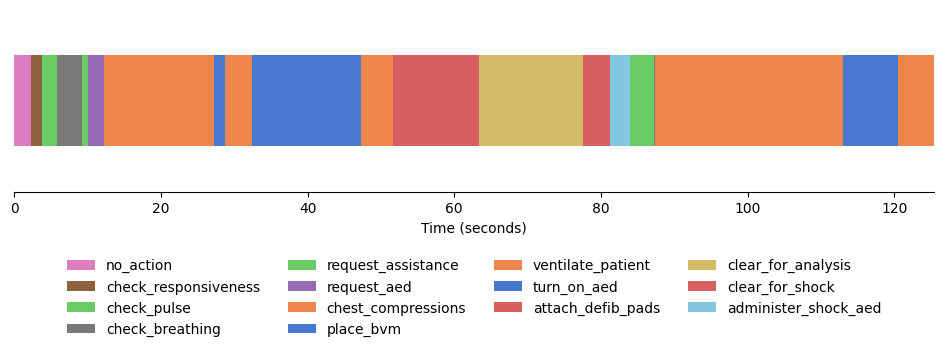

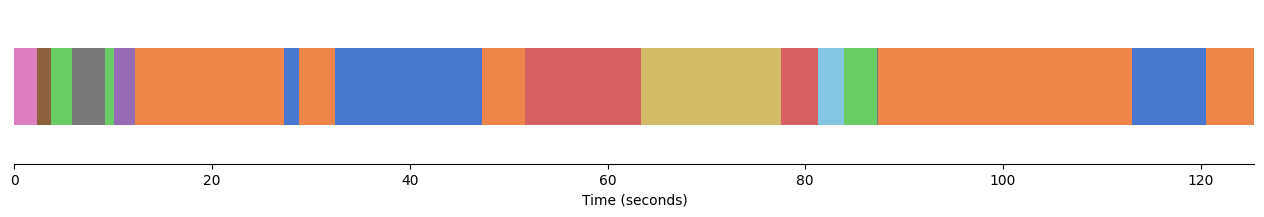

Subject: ng3, Trial: 12
GoPro file name: GX010377_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/12/GoPro/GX010377_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/12/GoPro/GX010377_encoded_trimmed.mp4
Segments: [(0, 9.56283, 'no_action'), (9.563, 11.73738, 'check_responsiveness'), (11.737, 14.2116, 'check_pulse'), (14.212, 18.12571, 'check_breathing'), (18.126, 18.93355, 'request_assistance'), (18.934, 20.6146, 'request_aed'), (20.615, 35.8661, 'chest_compressions'), (23.616, 28.12364, 'turn_on_aed'), (28.124, 35.8661, 'place_bvm'), (35.866, 38.87451, 'ventilate_patient'), (38.875, 54.35542, 'chest_compressions'), (39.64, 51.79874, 'attach_defib_pads'), (51.988, 54.2883, 'place_bvm'), (54.288, 56.96657, 'ventilate_patient'), (56.967, 67.62732, 'clear_for_analysis'), (67.627, 71.54459, 'clear_for_shock'), (71.545, 73.36568, 'admin

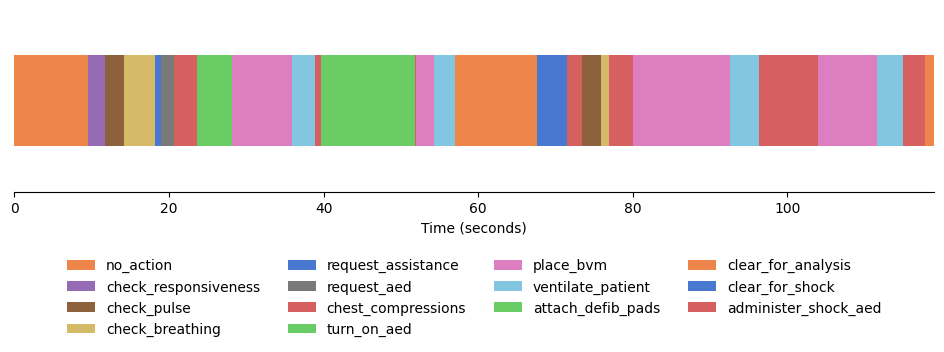

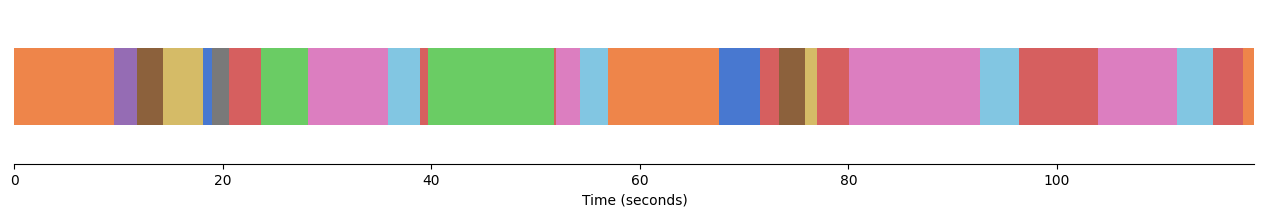

Subject: ng3, Trial: 2
GoPro file name: GX010334_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/2/GoPro/GX010334_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/2/GoPro/GX010334_encoded_trimmed.mp4
Segments: [(0, 4.43976, 'no_action'), (4.44, 7.14702, 'check_responsiveness'), (7.147, 10.17438, 'check_pulse'), (10.174, 14.76838, 'check_breathing'), (14.768, 16.92346, 'request_assistance'), (16.923, 31.75026, 'chest_compressions'), (31.75, 33.49686, 'place_bvm'), (33.497, 38.94147, 'ventilate_patient'), (38.941, 54.18773, 'chest_compressions'), (54.188, 55.76281, 'place_bvm'), (55.763, 60.73112, 'ventilate_patient'), (60.731, 63.66596, 'check_pulse'), (63.666, 74.63452, 'attach_defib_pads'), (74.635, 82.86261, 'turn_on_aed'), (82.863, 97.254, 'clear_for_analysis'), (97.254, 101.13867, 'clear_for_shock'), (101.139, 107.60554, 'admin

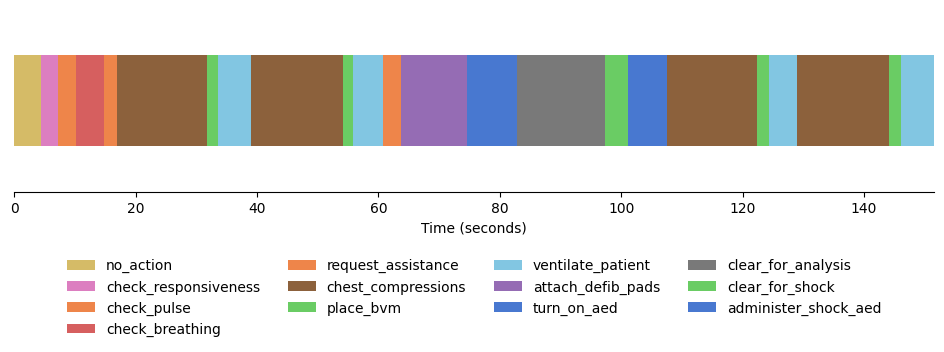

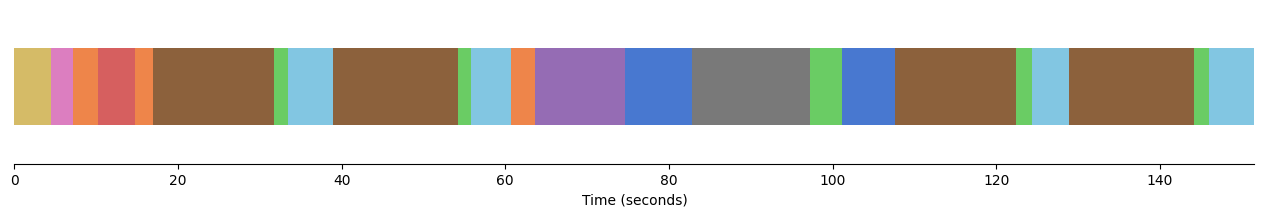

Subject: ng3, Trial: 3
GoPro file name: GX010335_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/3/GoPro/GX010335_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/3/GoPro/GX010335_encoded_trimmed.mp4
Segments: [(0, 3.5458, 'no_action'), (3.546, 6.15005, 'check_responsiveness'), (6.15, 9.02736, 'check_pulse'), (9.027, 12.7874, 'check_breathing'), (12.787, 13.7414, 'request_assistance'), (13.741, 14.461, 'request_aed'), (30.531, 31.81976, 'place_bvm'), (31.82, 36.36014, 'ventilate_patient'), (14.461, 30.531, 'chest_compressions'), (36.36, 51.5136, 'chest_compressions'), (51.514, 53.20164, 'place_bvm'), (53.202, 56.7883, 'ventilate_patient'), (56.788, 60.29144, 'check_pulse'), (60.291, 66.91645, 'attach_defib_pads'), (66.916, 126.00606, 'turn_on_aed'), (126.006, 146.19708, 'attach_defib_pads'), (146.197, 160.69107, 'clear_for_analysis

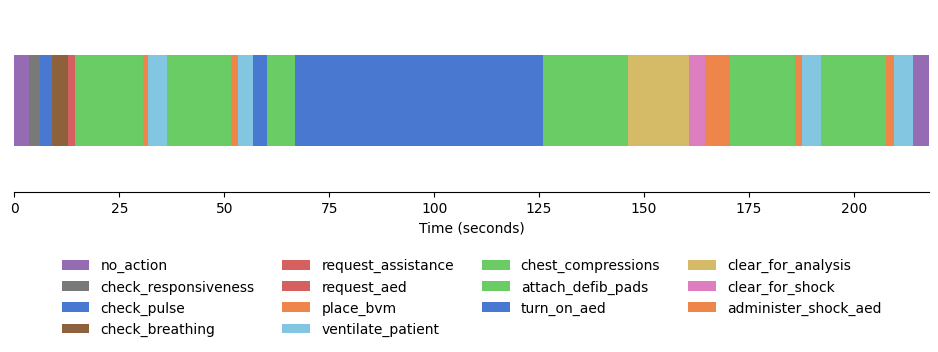

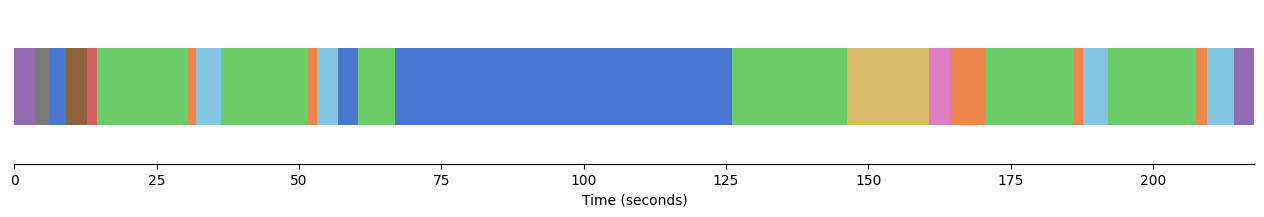

Subject: ng3, Trial: 4
GoPro file name: GX010336_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/4/GoPro/GX010336_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/4/GoPro/GX010336_encoded_trimmed.mp4
Segments: [(0, 7.02698, 'no_action'), (7.027, 8.8252, 'check_responsiveness'), (8.825, 11.83868, 'check_pulse'), (11.839, 15.64135, 'check_breathing'), (15.641, 16.42392, 'request_assistance'), (16.424, 17.37139, 'request_aed'), (17.371, 32.49343, 'chest_compressions'), (32.493, 35.13885, 'place_bvm'), (35.139, 39.63661, 'ventilate_patient'), (39.637, 55.61086, 'chest_compressions'), (55.611, 57.66022, 'place_bvm'), (57.66, 61.44152, 'ventilate_patient'), (61.442, 64.30933, 'check_pulse'), (64.309, 69.99531, 'attach_defib_pads'), (69.995, 79.27477, 'turn_on_aed'), (79.275, 93.76722, 'clear_for_analysis'), (93.767, 97.57727, 'clear_for_

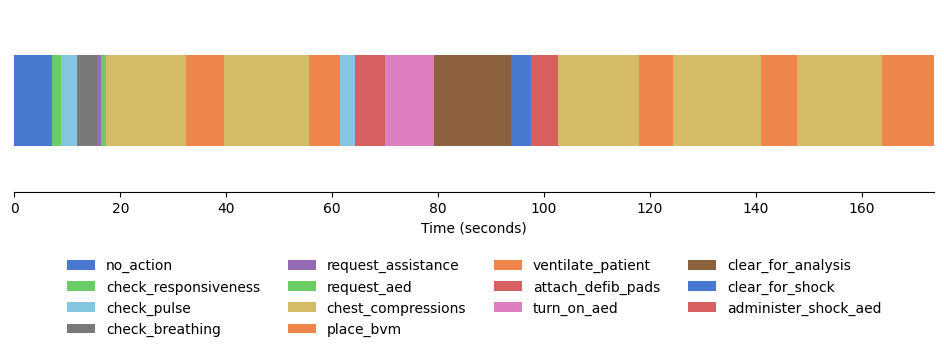

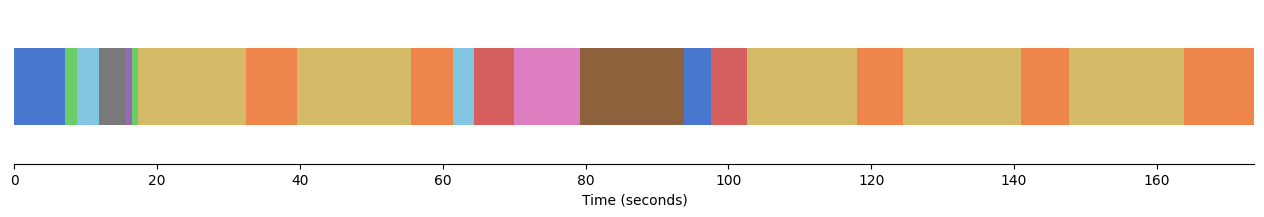

Subject: ng3, Trial: 5
GoPro file name: GX010364_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/5/GoPro/GX010364_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/5/GoPro/GX010364_encoded_trimmed.mp4
Segments: [(3.06476, 5.39809, 'check_responsiveness'), (5.60642, 8.93976, 'check_pulse'), (9.27309, 11.10642, 'check_breathing'), (11.46059, 13.06476, 'request_aed'), (13.12726, 30.02309, 'chest_compressions'), (30.93976, 33.16892, 'place_bvm'), (33.43976, 37.23142, 'ventilate_patient'), (37.87726, 53.85642, 'chest_compressions'), (54.35642, 56.04392, 'place_bvm'), (56.10642, 60.25226, 'ventilate_patient'), (62.75226, 64.48142, 'turn_on_aed'), (67.37726, 82.52309, 'attach_defib_pads'), (85.43976, 93.35642, 'clear_for_analysis'), (96.21059, 100.955, 'clear_for_shock'), (101.81476, 106.56476, 'administer_shock_aed'), (106.75226, 123.7730

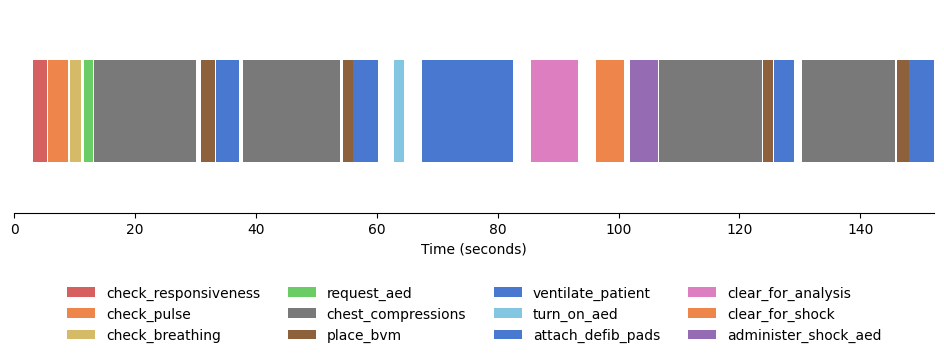

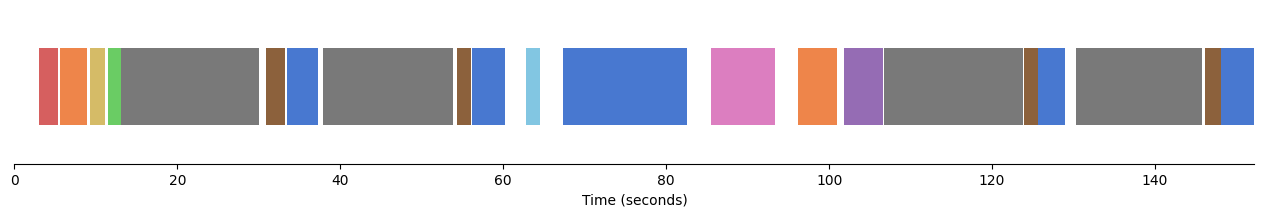

Subject: ng3, Trial: 6
GoPro file name: GX010365_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/6/GoPro/GX010365_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/6/GoPro/GX010365_encoded_trimmed.mp4
Segments: [(1.75226, 2.77309, 'approach_patient'), (2.66892, 5.21059, 'check_responsiveness'), (5.41892, 8.81476, 'check_pulse'), (9.00226, 11.926, 'check_breathing'), (12.79392, 14.08559, 'request_aed'), (14.37726, 30.87642, 'chest_compressions'), (31.10642, 33.96059, 'place_bvm'), (33.961, 37.77309, 'ventilate_patient'), (38.50226, 53.71059, 'chest_compressions'), (54.689, 55.73142, 'place_bvm'), (55.731, 60.16892, 'ventilate_patient'), (62.68976, 70.41892, 'attach_defib_pads'), (71.39809, 80.29392, 'clear_for_analysis'), (82.91892, 88.87726, 'clear_for_shock'), (89.02309, 93.39809, 'administer_shock_aed'), (93.91892, 110.04392, 'che

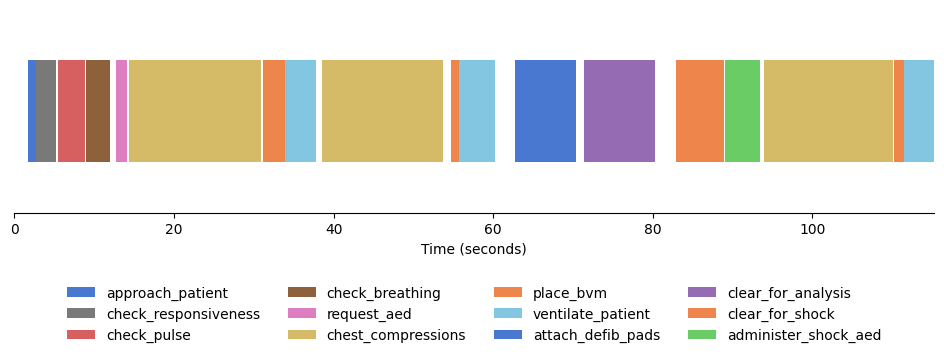

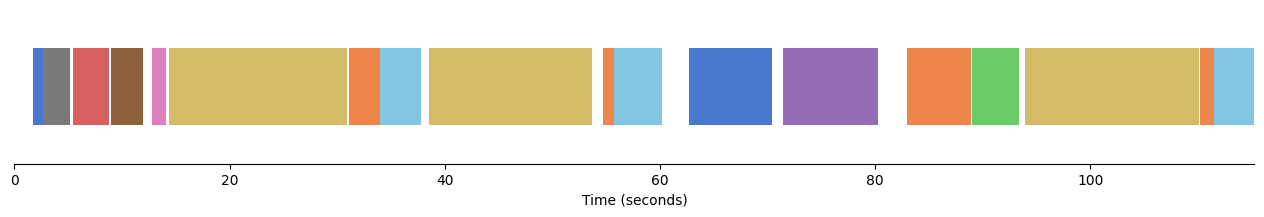

Subject: ng3, Trial: 7
GoPro file name: GX010366_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/7/GoPro/GX010366_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/7/GoPro/GX010366_encoded_trimmed.mp4
Segments: [(2.50226, 3.81476, 'approach_patient'), (3.12, 5.96059, 'check_responsiveness'), (6.341, 9.83559, 'check_pulse'), (10.08559, 13.33559, 'check_breathing'), (13.336, 15.64809, 'request_aed'), (13.35642, 15.66892, 'request_assistance'), (15.64809, 31.54392, 'chest_compressions'), (31.73142, 33.33559, 'place_bvm'), (33.352, 37.31476, 'ventilate_patient'), (38.35642, 54.27309, 'chest_compressions'), (55.00226, 56.35642, 'place_bvm'), (56.356, 60.73142, 'ventilate_patient'), (63.335, 70.62726, 'attach_defib_pads'), (70.73142, 80.27309, 'clear_for_analysis'), (82.87726, 88.50226, 'clear_for_shock'), (88.62726, 92.91892, 'administer

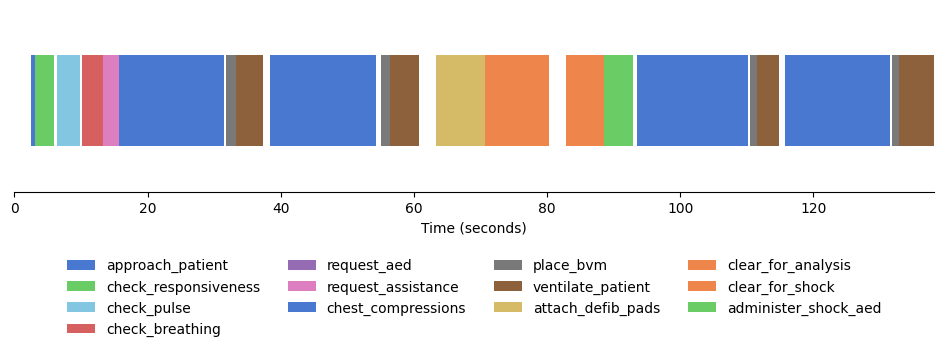

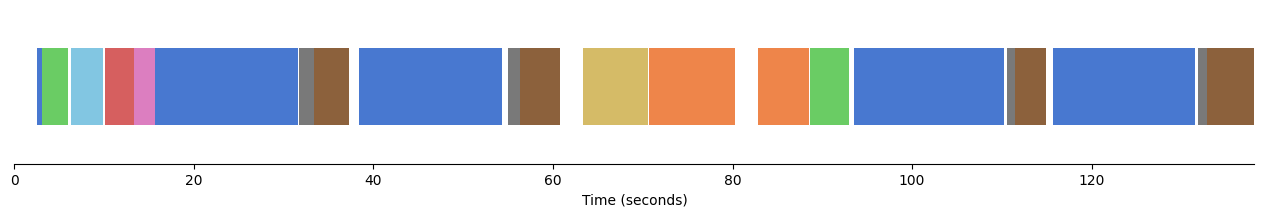

Subject: ng3, Trial: 8
GoPro file name: GX010373_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/8/GoPro/GX010373_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/8/GoPro/GX010373_encoded_trimmed.mp4
Segments: [(0, 4.09646, 'no_action'), (4.096, 6.99201, 'check_responsiveness'), (6.992, 9.72395, 'check_pulse'), (9.724, 13.5363, 'check_breathing'), (13.536, 14.22686, 'request_assistance'), (14.227, 15.68447, 'request_aed'), (15.684, 31.96635, 'chest_compressions'), (31.966, 36.46387, 'place_bvm'), (36.464, 42.22458, 'ventilate_patient'), (42.225, 58.04966, 'chest_compressions'), (58.05, 61.07756, 'place_bvm'), (61.078, 65.47359, 'ventilate_patient'), (65.474, 68.71237, 'check_pulse'), (68.712, 72.25903, 'attach_defib_pads'), (72.259, 74.23851, 'turn_on_aed'), (74.239, 83.45041, 'attach_defib_pads'), (83.45, 97.90065, 'clear_for_anal

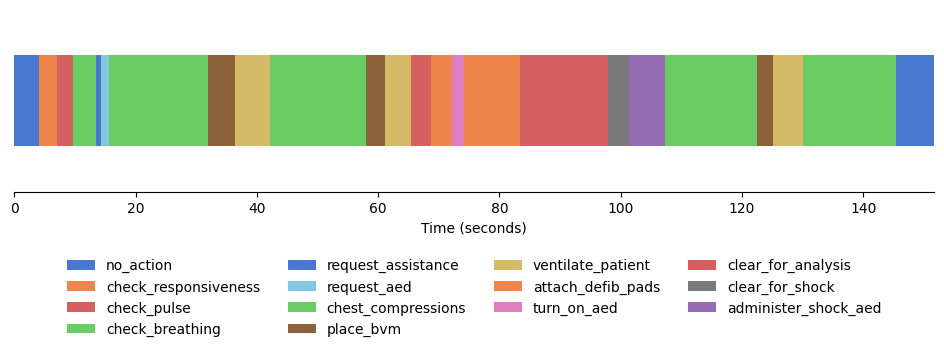

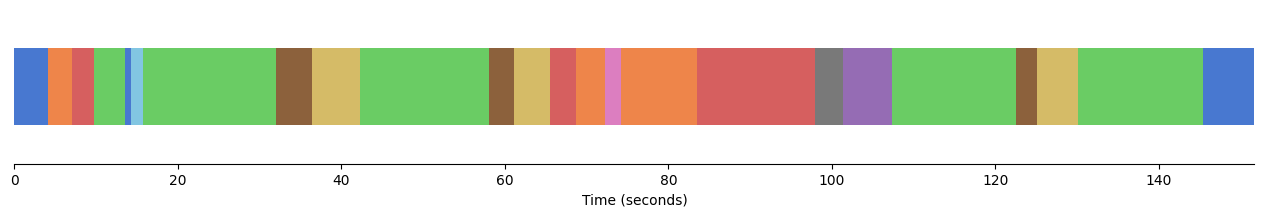

Subject: ng3, Trial: 9
GoPro file name: GX010374_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/9/GoPro/GX010374_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng3/cardiac_arrest/9/GoPro/GX010374_encoded_trimmed.mp4
Segments: [(0, 4.07514, 'no_action'), (4.075, 5.97418, 'check_responsiveness'), (5.974, 9.15816, 'check_pulse'), (9.158, 13.17532, 'check_breathing'), (13.175, 13.815, 'request_assistance'), (13.815, 15.84472, 'request_aed'), (15.845, 31.00903, 'chest_compressions'), (20.108, 22.15542, 'turn_on_aed'), (22.155, 30.4257, 'place_bvm'), (35.658, 44.36342, 'attach_defib_pads'), (44.363, 49.50542, 'place_bvm'), (49.505, 63.40542, 'clear_for_analysis'), (49.505, 54.18005, 'ventilate_patient'), (63.405, 67.1395, 'clear_for_shock'), (67.139, 70.95542, 'administer_shock_aed'), (70.955, 74.55542, 'check_pulse'), (74.555, 76.51209, 'check_breathin

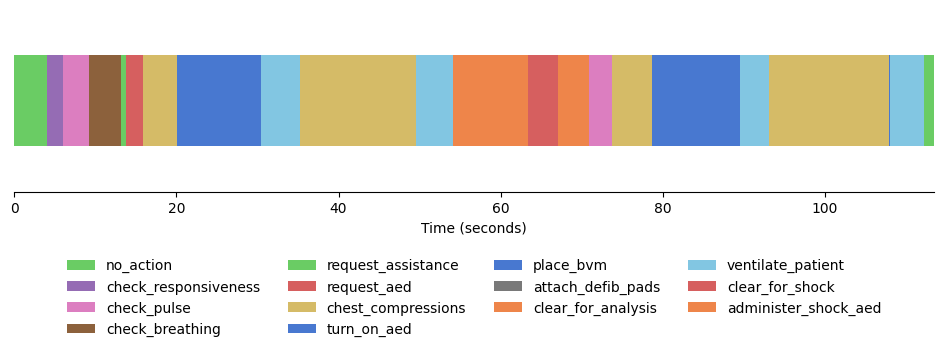

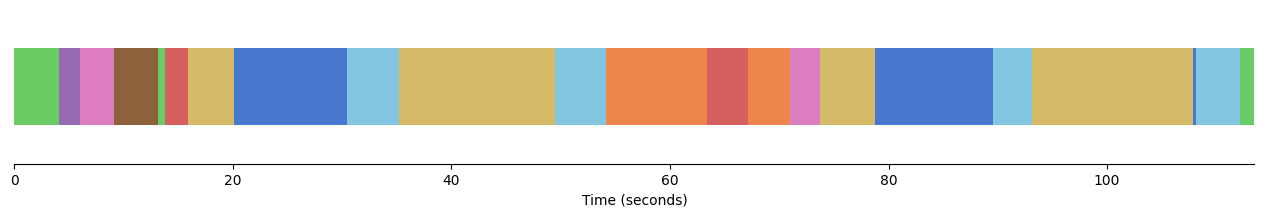

**************************************************
Subject: ng4, Trial: 0
GoPro file name: GX010343_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/0/GoPro/GX010343_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/0/GoPro/GX010343_encoded_trimmed.mp4
Segments: [(0, 2.66892, 'approach_patient'), (2.669, 4.87726, 'check_responsiveness'), (4.877, 7.58559, 'check_pulse'), (79.76355, 83.439, 'request_aed'), (7.677, 78.7771, 'chest_compressions'), (83.358, 103.1757, 'chest_compressions'), (86.54, 89.934, 'check_pulse'), (7.84237, 9.6757, 'place_bvm'), (93.678, 102.44701, 'attach_defib_pads'), (94.759, 96.426, 'turn_on_aed'), (104.5271, 120.66497, 'clear_for_analysis'), (121.277, 124.7771, 'administer_shock_aed'), (117.683, 124.277, 'clear_for_shock'), (126.493, 129.04467, 'check_pulse'), (129.045, 158.91043, 'chest_compressions'), (127.9

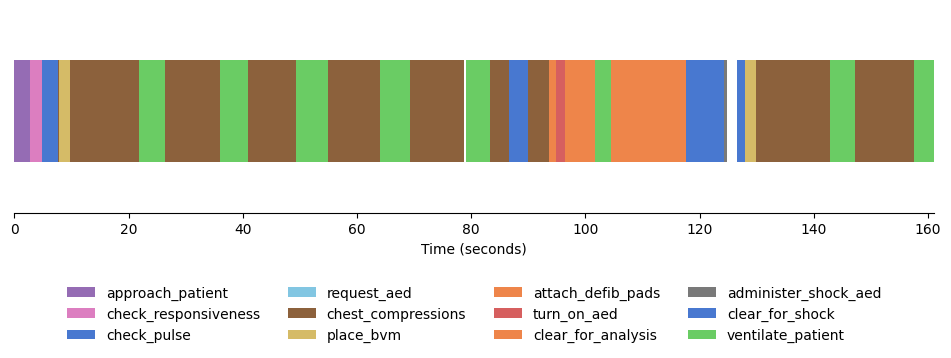

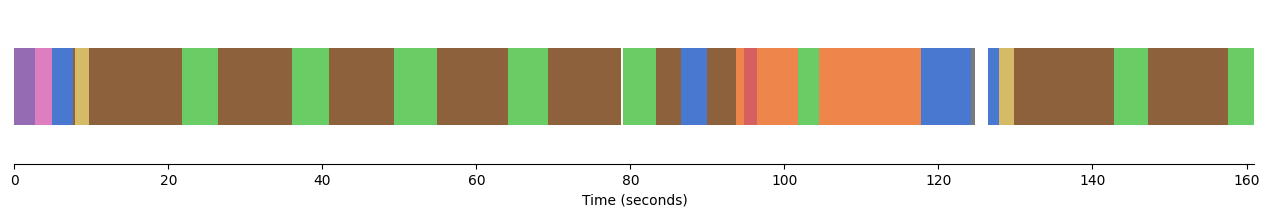

Subject: ng4, Trial: 1
GoPro file name: GX010344_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/1/GoPro/GX010344_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/1/GoPro/GX010344_encoded_trimmed.mp4
Segments: [(0.01726, 3.88855, 'approach_patient'), (3.889, 7.092, 'check_responsiveness'), (7.13855, 9.02573, 'check_pulse'), (15.925, 17.889, 'place_bvm'), (9.026, 70.76355, 'chest_compressions'), (24.88855, 27.8816, 'ventilate_patient'), (53.25, 57.01355, 'ventilate_patient'), (39.26355, 42.63855, 'ventilate_patient'), (53.26355, 55.964, 'request_aed'), (59.51355, 62.01355, 'turn_on_aed'), (62.496, 68.07932, 'attach_defib_pads'), (70.65, 81.76355, 'clear_for_analysis'), (82.362, 87.01355, 'clear_for_shock'), (87.01355, 91.01355, 'administer_shock_aed'), (91.014, 94.76355, 'check_pulse'), (95.405, 98.248, 'place_bvm'), (91.322, 141.88

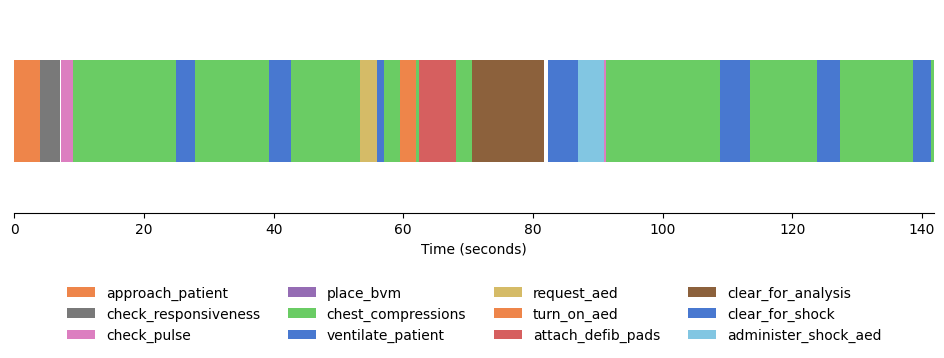

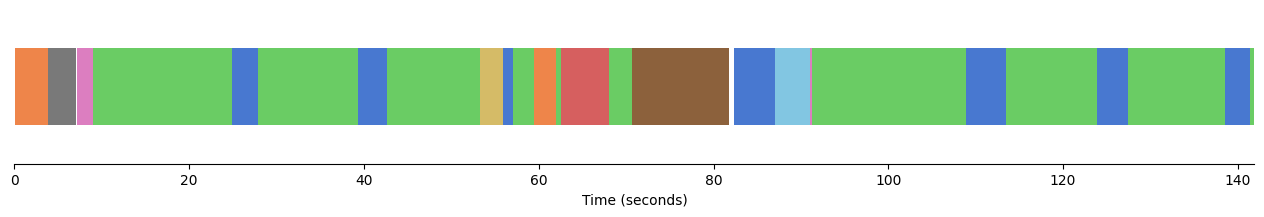

Subject: ng4, Trial: 2
GoPro file name: GX010355_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/2/GoPro/GX010355_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/2/GoPro/GX010355_encoded_trimmed.mp4
Segments: [(5.33559, 6.308, 'approach_patient'), (8.89809, 9.60642, 'check_pulse'), (9.75226, 12.10642, 'check_breathing'), (6.37726, 8.68976, 'check_responsiveness'), (12.29392, 12.71059, 'check_pulse'), (12.771, 27.71059, 'chest_compressions'), (27.71059, 30.04392, 'open_airway'), (27.71059, 30.04392, 'place_bvm'), (30.023, 34.14809, 'ventilate_patient'), (34.41892, 35.68976, 'turn_on_aed'), (34.457, 35.71059, 'request_aed'), (35.831, 60.101, 'attach_defib_pads'), (60.29392, 69.18976, 'clear_for_analysis'), (69.56476, 71.08, 'administer_shock_aed'), (73.96059, 76.991, 'clear_for_shock'), (77.48142, 83.21059, 'administer_shock_aed'), 

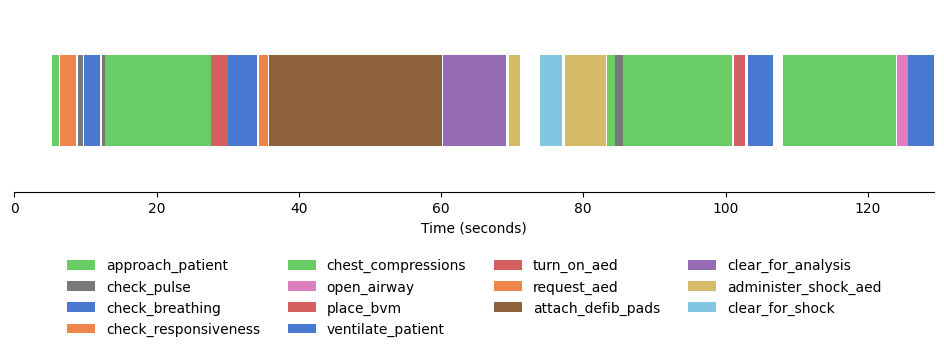

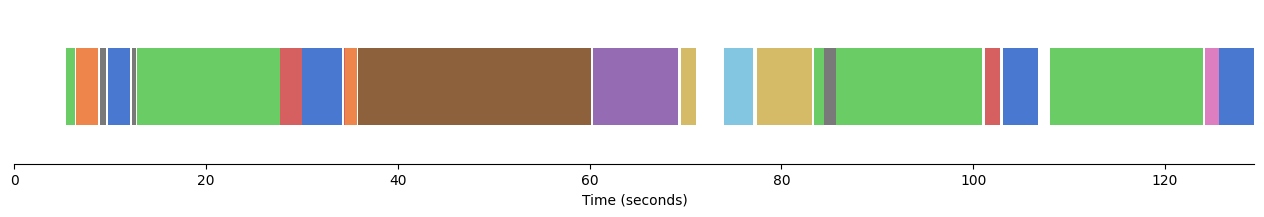

Subject: ng4, Trial: 3
GoPro file name: GX010356_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/3/GoPro/GX010356_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/3/GoPro/GX010356_encoded_trimmed.mp4
Segments: [(1.85642, 4.87726, 'approach_patient'), (4.877, 7.21059, 'check_responsiveness'), (7.35642, 8.29392, 'check_pulse'), (8.31476, 9.29392, 'check_breathing'), (9.52309, 10.08559, 'check_pulse'), (10.25226, 10.89809, 'check_breathing'), (10.91892, 27.23142, 'chest_compressions'), (27.54392, 28.52309, 'open_airway'), (27.58559, 28.54392, 'place_bvm'), (29.21059, 32.25226, 'ventilate_patient'), (32.50226, 33.58559, 'turn_on_aed'), (32.43976, 33.64809, 'request_aed'), (42.35642, 50.96059, 'clear_for_analysis'), (51.81476, 53.96059, 'administer_shock_aed'), (54.18976, 62.31476, 'clear_for_shock'), (66.64809, 67.98142, 'check_pulse')

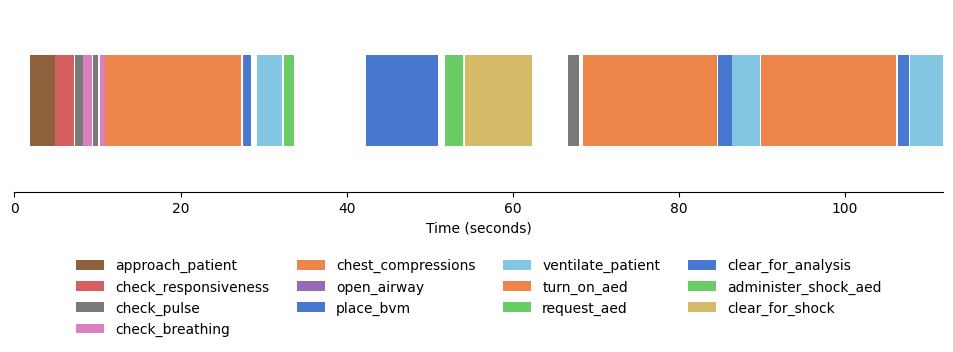

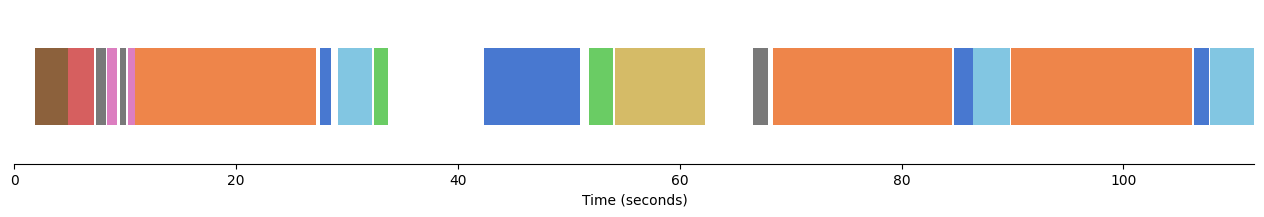

Subject: ng4, Trial: 4
GoPro file name: GX010357_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/4/GoPro/GX010357_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng4/cardiac_arrest/4/GoPro/GX010357_encoded_trimmed.mp4
Segments: [(2.816, 6.06476, 'approach_patient'), (6.29392, 8.87726, 'check_responsiveness'), (8.91892, 9.71059, 'check_pulse'), (9.711, 10.98142, 'check_breathing'), (11.10642, 27.35642, 'chest_compressions'), (27.50226, 29.33476, 'place_bvm'), (29.39809, 32.75226, 'ventilate_patient'), (32.91892, 34.66892, 'turn_on_aed'), (32.87726, 34.16892, 'request_aed'), (35.10642, 56.16892, 'attach_defib_pads'), (56.169, 65.02309, 'clear_for_analysis'), (66.004, 68.16892, 'administer_shock_aed'), (67.097, 71.93108, 'clear_for_shock'), (78.14108, 80.60108, 'check_pulse'), (79.28108, 80.07108, 'check_breathing'), (81.34108, 97.17108, 'chest_compres

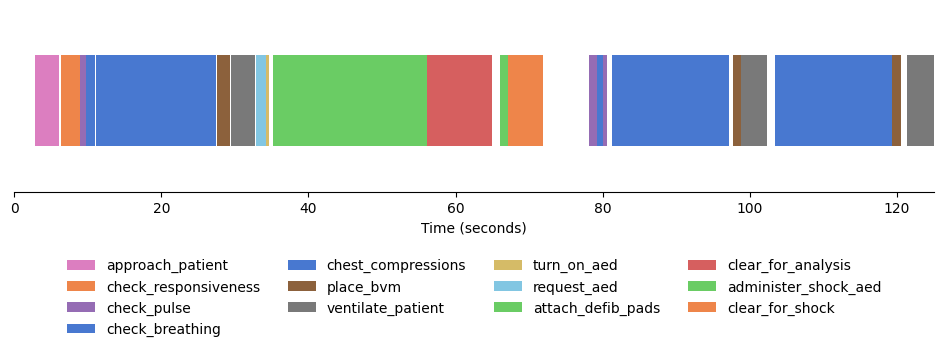

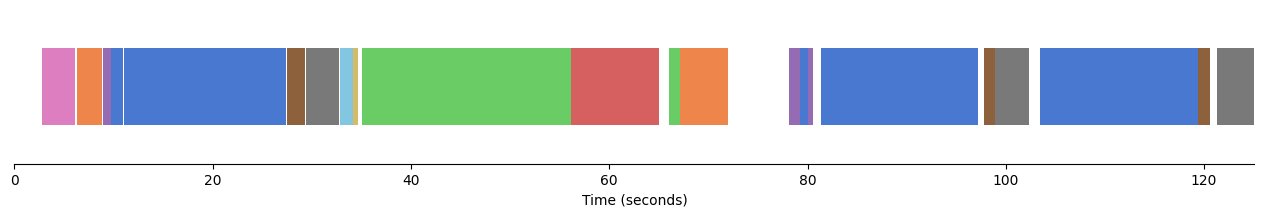

**************************************************
Subject: ng5, Trial: 0
GoPro file name: GX010316_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/0/GoPro/GX010316_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/0/GoPro/GX010316_encoded_trimmed.mp4
Segments: [(0, 11.10309, 'no_action'), (11.103, 15.50553, 'check_responsiveness'), (15.506, 19.86389, 'check_breathing'), (19.864, 25.72574, 'check_pulse'), (25.726, 39.08933, 'chest_compressions'), (39.089, 43.18533, 'place_bvm'), (43.185, 54.03633, 'ventilate_patient'), (54.036, 62.5307, 'attach_defib_pads'), (62.531, 79.85445, 'turn_on_aed'), (79.854, 93.4857, 'chest_compressions'), (93.486, 97.84856, 'place_bvm'), (97.849, 107.83909, 'ventilate_patient'), (107.839, 115.76183, 'clear_for_analysis'), (115.762, 132.04483, 'chest_compressions'), (132.045, 135.47968, 'place_bvm'), (135.

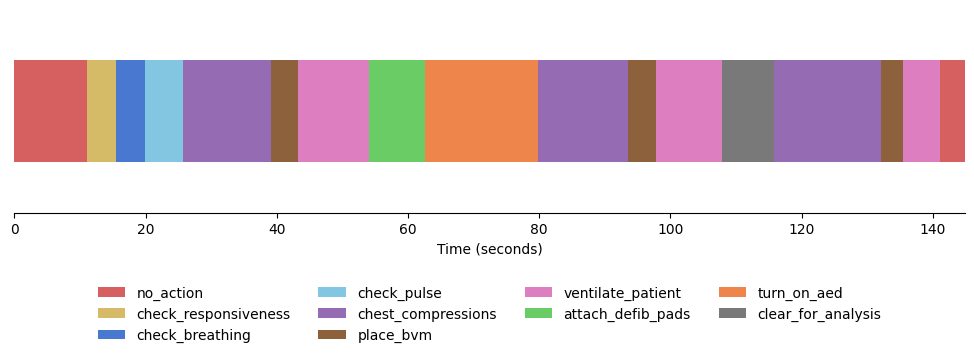

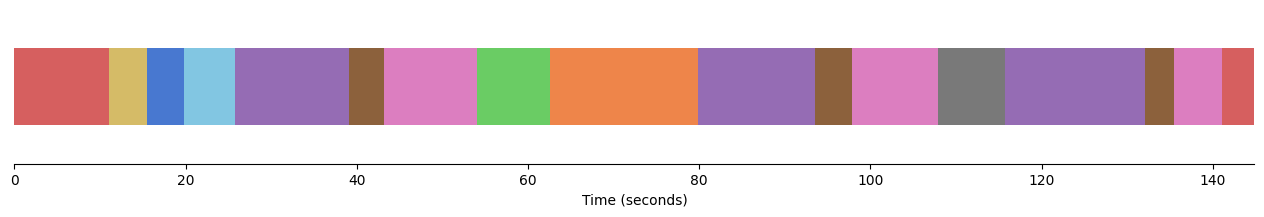

Subject: ng5, Trial: 1
GoPro file name: GX010317_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/1/GoPro/GX010317_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/1/GoPro/GX010317_encoded_trimmed.mp4
Segments: [(0, 8.03204, 'no_action'), (8.032, 12.60456, 'check_responsiveness'), (12.605, 14.25233, 'check_pulse'), (14.252, 20.5914, 'check_breathing'), (20.591, 34.69427, 'check_responsiveness'), (34.694, 37.55267, 'place_bvm'), (37.553, 43.24047, 'ventilate_patient'), (43.24, 44.63451, 'turn_on_aed'), (44.635, 54.04507, 'attach_defib_pads'), (54.045, 60.13351, 'chest_compressions'), (60.134, 74.52651, 'clear_for_analysis'), (74.527, 77.48386, 'clear_for_shock'), (77.484, 82.93569, 'administer_shock_aed'), (82.936, 101.09237, 'chest_compressions'), (101.092, 104.67276, 'place_bvm'), (104.673, 111.89072, 'ventilate_patient'), (111.891

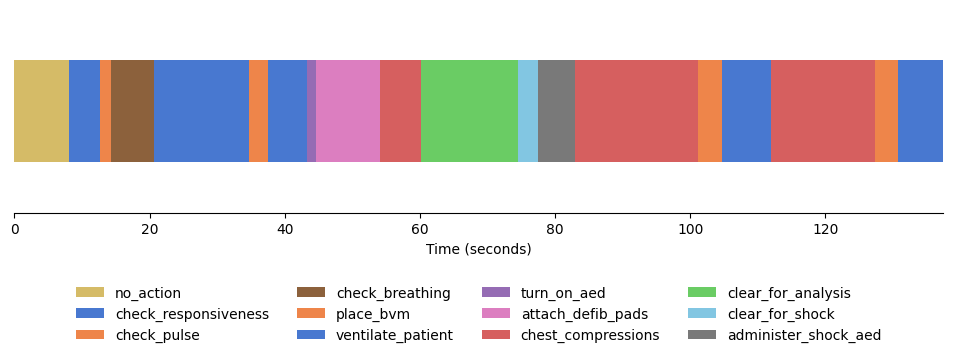

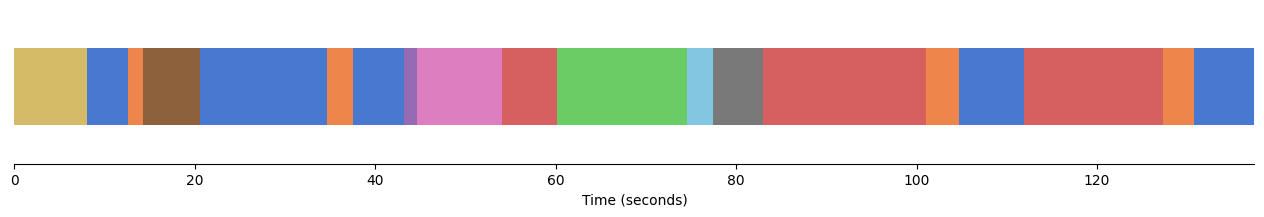

Subject: ng5, Trial: 10
GoPro file name: GX010331_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/10/GoPro/GX010331_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/10/GoPro/GX010331_encoded_trimmed.mp4
Segments: [(0, 6.85588, 'no_action'), (6.856, 10.62051, 'check_responsiveness'), (10.621, 12.32232, 'check_pulse'), (12.322, 16.74893, 'check_breathing'), (16.749, 31.67118, 'chest_compressions'), (31.671, 34.27815, 'place_bvm'), (34.278, 39.69393, 'ventilate_patient'), (39.694, 41.79624, 'turn_on_aed'), (41.796, 49.26792, 'attach_defib_pads'), (49.268, 63.91008, 'clear_for_analysis'), (63.91, 67.93544, 'clear_for_shock'), (67.935, 71.20233, 'administer_shock_aed'), (71.202, 89.92012, 'chest_compressions'), (89.92, 92.8513, 'place_bvm'), (92.851, 98.93268, 'ventilate_patient'), (98.933, 115.59316, 'chest_compressions'), (115.593, 11

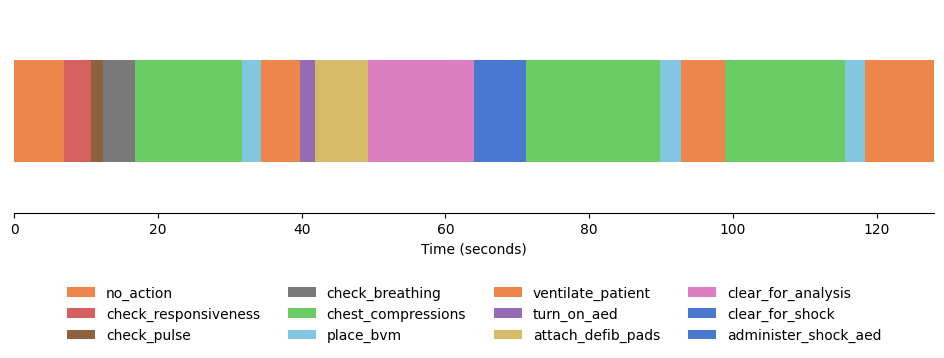

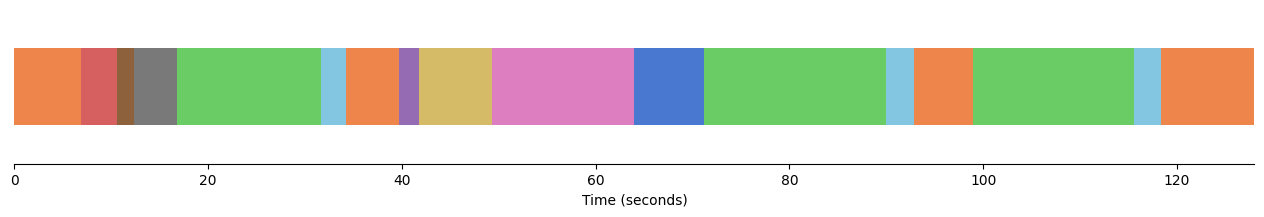

Subject: ng5, Trial: 11
GoPro file name: GX010349_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/11/GoPro/GX010349_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/11/GoPro/GX010349_encoded_trimmed.mp4
Segments: [(14.10642, 15.87726, 'approach_patient'), (16.25, 19.68976, 'check_responsiveness'), (20.06476, 22.89809, 'check_pulse'), (20.04392, 22.89809, 'check_breathing'), (24.71059, 26.48142, 'check_pulse'), (24.73142, 26.487, 'check_breathing'), (26.75226, 43.39809, 'chest_compressions'), (43.93976, 45.64809, 'place_bvm'), (45.75226, 48.96059, 'ventilate_patient'), (56.02309, 60.04392, 'attach_defib_pads'), (60.25226, 61.23142, 'turn_on_aed'), (68.54392, 78.08559, 'clear_for_analysis'), (80.81476, 86.54392, 'clear_for_shock'), (86.64809, 90.21059, 'administer_shock_aed'), (90.43976, 106.25226, 'chest_compressions'), (106.54392, 

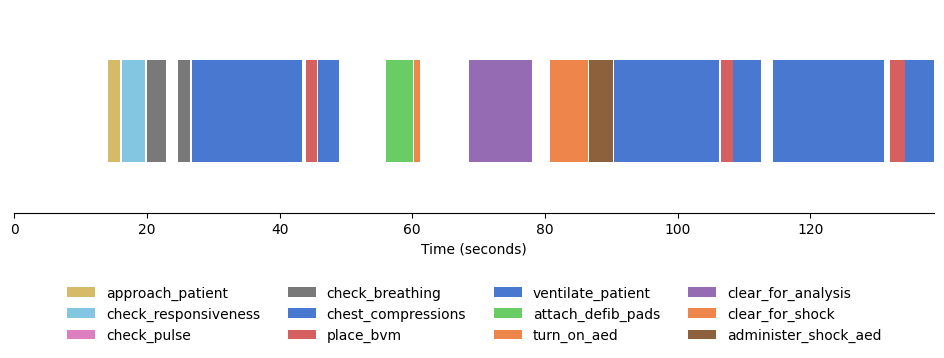

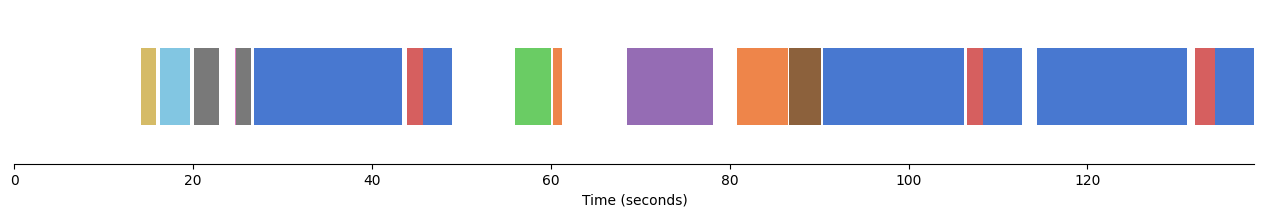

Subject: ng5, Trial: 12
GoPro file name: GX010350_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/12/GoPro/GX010350_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/12/GoPro/GX010350_encoded_trimmed.mp4
Segments: [(3.39809, 5.06476, 'approach_patient'), (5.04392, 6.39809, 'check_responsiveness'), (6.68976, 11.06476, 'check_pulse'), (6.71059, 11.10642, 'check_breathing'), (11.25226, 27.02309, 'chest_compressions'), (27.71059, 29.02309, 'place_bvm'), (29.133, 33.08559, 'ventilate_patient'), (36.179, 42.87726, 'attach_defib_pads'), (43.68976, 53.37726, 'clear_for_analysis'), (55.58559, 61.46059, 'clear_for_shock'), (61.79392, 65.10642, 'administer_shock_aed'), (65.52309, 80.23142, 'chest_compressions'), (80.96059, 82.21059, 'place_bvm'), (82.211, 87.14809, 'ventilate_patient'), (88.02309, 106.68976, 'chest_compressions'), (107.21059, 

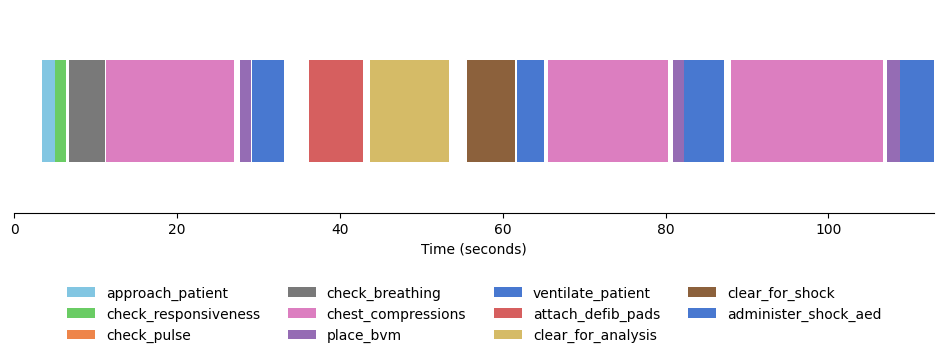

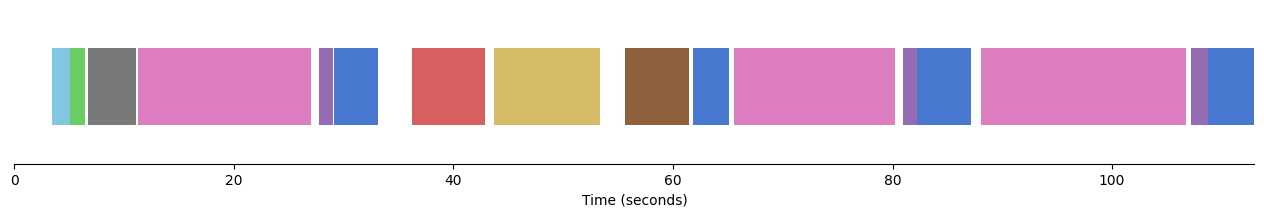

Subject: ng5, Trial: 13
GoPro file name: GX010351_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/13/GoPro/GX010351_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/13/GoPro/GX010351_encoded_trimmed.mp4
Segments: [(2.46059, 5.39809, 'approach_patient'), (5.531, 9.46059, 'check_responsiveness'), (9.52309, 13.43976, 'check_pulse'), (9.50226, 13.46059, 'check_breathing'), (13.60642, 28.16892, 'chest_compressions'), (28.169, 29.96059, 'place_bvm'), (29.961, 34.48142, 'ventilate_patient'), (37.811, 74.04392, 'attach_defib_pads'), (74.31476, 83.58559, 'clear_for_analysis'), (85.83559, 91.68976, 'clear_for_shock'), (91.89928, 96.9071, 'administer_shock_aed'), (96.96178, 112.80553, 'chest_compressions'), (112.806, 114.4696, 'place_bvm'), (114.64928, 119.43835, 'ventilate_patient'), (119.50866, 136.19616, 'chest_compressions'), (136.196, 13

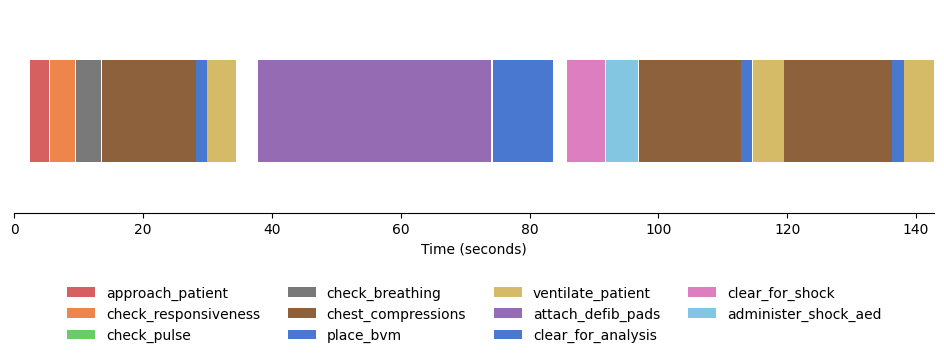

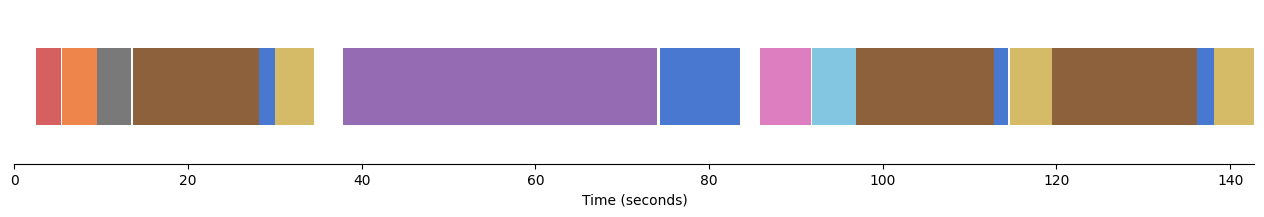

Subject: ng5, Trial: 14
GoPro file name: GX010352_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/14/GoPro/GX010352_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/14/GoPro/GX010352_encoded_trimmed.mp4
Segments: [(3.703, 6.08559, 'approach_patient'), (5.83559, 8.58559, 'check_responsiveness'), (8.79392, 13.96059, 'check_pulse'), (8.85642, 14.00226, 'check_breathing'), (14.02309, 29.46059, 'chest_compressions'), (29.461, 31.85642, 'place_bvm'), (31.856, 36.00226, 'ventilate_patient'), (37.73142, 45.75226, 'attach_defib_pads'), (46.12726, 55.06476, 'clear_for_analysis'), (57.10642, 63.27309, 'clear_for_shock'), (63.46059, 68.68976, 'administer_shock_aed'), (68.69, 84.96059, 'chest_compressions'), (85.04392, 86.89809, 'place_bvm'), (86.898, 91.10642, 'ventilate_patient'), (91.58559, 107.56476, 'chest_compressions'), (108.00226, 109.9

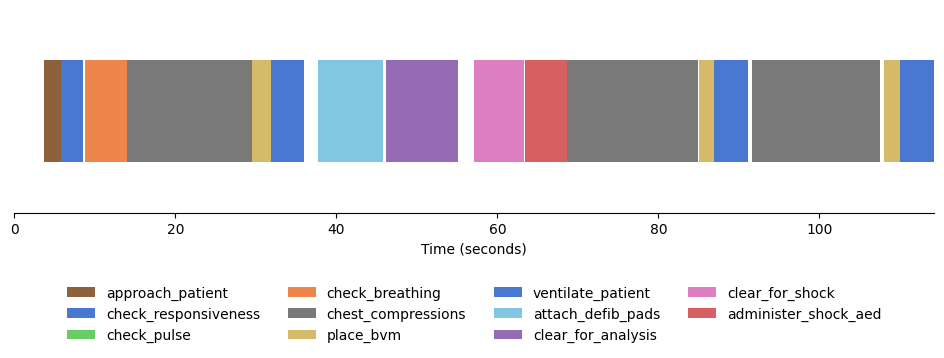

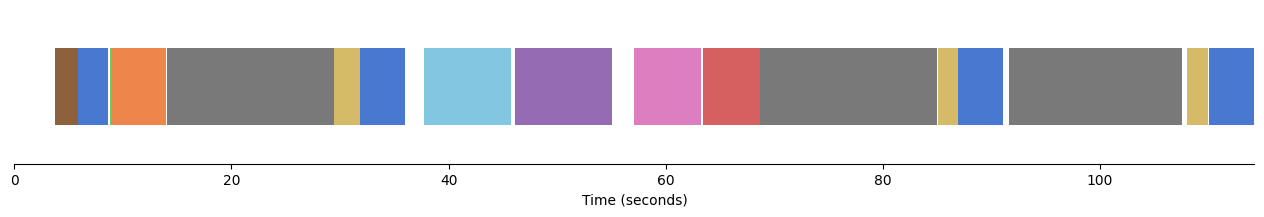

Subject: ng5, Trial: 15
GoPro file name: GX010354_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/15/GoPro/GX010354_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/15/GoPro/GX010354_encoded_trimmed.mp4
Segments: [(3.46059, 6.02309, 'approach_patient'), (6.023, 8.16892, 'check_responsiveness'), (8.23142, 13.54392, 'check_pulse'), (8.25226, 13.54392, 'check_breathing'), (13.79392, 28.50226, 'chest_compressions'), (28.81476, 31.66892, 'place_bvm'), (31.669, 35.91892, 'ventilate_patient'), (36.46059, 61.73142, 'attach_defib_pads'), (61.91892, 71.23142, 'clear_for_analysis'), (73.73142, 79.16892, 'clear_for_shock'), (79.29392, 84.79392, 'administer_shock_aed'), (85.00226, 88.48142, 'check_pulse'), (89.54392, 104.04392, 'chest_compressions'), (104.27309, 106.08559, 'place_bvm'), (106.086, 110.16892, 'ventilate_patient'), (111.455, 126.8

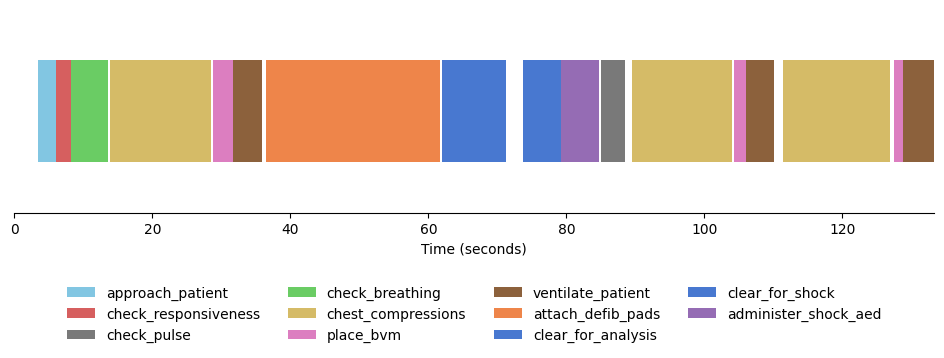

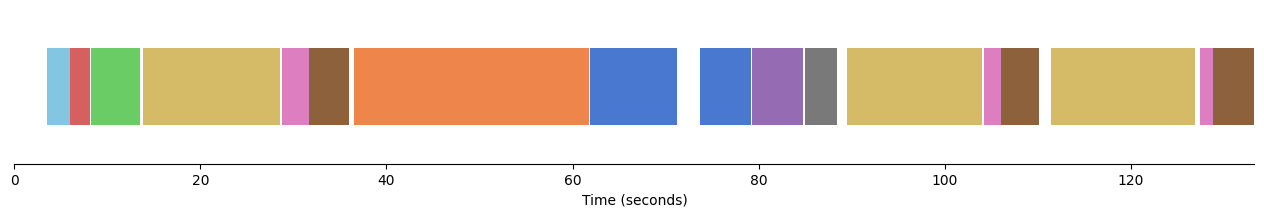

Subject: ng5, Trial: 16
GoPro file name: GX010368_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/16/GoPro/GX010368_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/16/GoPro/GX010368_encoded_trimmed.mp4
Segments: [(0, 6.13426, 'no_action'), (6.134, 7.92211, 'check_responsiveness'), (7.922, 9.86701, 'check_pulse'), (9.867, 14.19058, 'check_breathing'), (14.191, 29.15259, 'chest_compressions'), (29.153, 32.05464, 'place_bvm'), (32.055, 36.89189, 'ventilate_patient'), (36.892, 43.70372, 'turn_on_aed'), (43.704, 64.16063, 'attach_defib_pads'), (64.161, 78.67646, 'clear_for_analysis'), (78.676, 82.22839, 'clear_for_shock'), (82.228, 86.5583, 'administer_shock_aed'), (86.558, 90.6707, 'check_pulse'), (90.671, 105.97444, 'chest_compressions'), (105.974, 107.9849, 'place_bvm'), (107.985, 113.2667, 'ventilate_patient'), (113.267, 127.8919, 

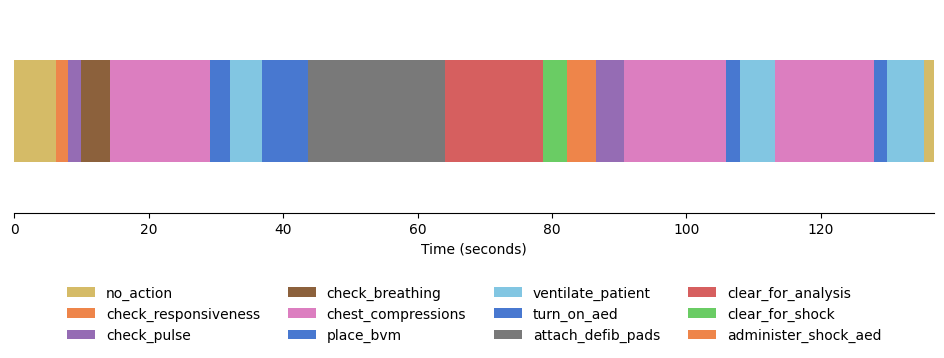

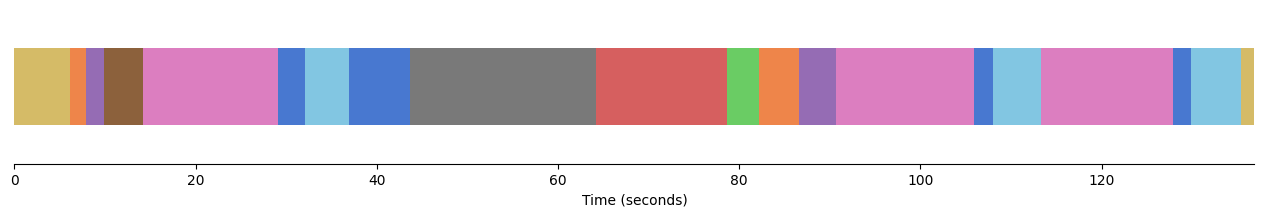

Subject: ng5, Trial: 17
GoPro file name: GX010369_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/17/GoPro/GX010369_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/17/GoPro/GX010369_encoded_trimmed.mp4
Segments: [(0, 9.65872, 'no_action'), (9.659, 11.2156, 'check_responsiveness'), (11.216, 12.86678, 'check_pulse'), (12.867, 16.92337, 'check_breathing'), (16.923, 35.28721, 'chest_compressions'), (20.92, 26.44372, 'place_bvm'), (26.444, 66.6757, 'ventilate_patient'), (35.287, 38.79641, 'turn_on_aed'), (38.796, 64.3457, 'attach_defib_pads'), (64.346, 78.38114, 'clear_for_analysis'), (78.381, 83.3765, 'clear_for_shock'), (83.376, 86.17364, 'administer_shock_aed'), (86.174, 89.94132, 'check_pulse'), (89.941, 118.84095, 'chest_compressions'), (89.605, 91.93931, 'place_bvm'), (91.939, 120.52411, 'ventilate_patient'), (120.524, 124.124, '

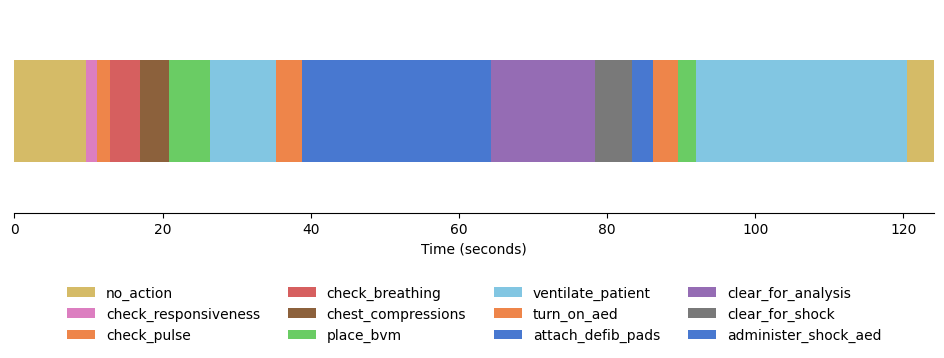

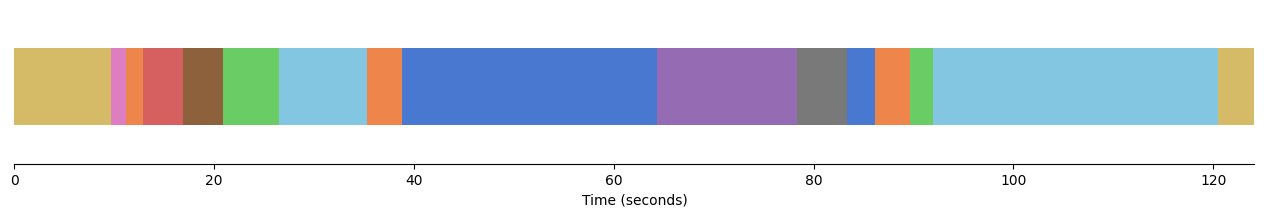

Subject: ng5, Trial: 18
GoPro file name: GX010370_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/18/GoPro/GX010370_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/18/GoPro/GX010370_encoded_trimmed.mp4
Segments: [(0, 7.23142, 'no_action'), (7.231, 10.27229, 'check_responsiveness'), (10.272, 11.66817, 'check_pulse'), (11.668, 15.32682, 'check_breathing'), (15.327, 55.25677, 'chest_compressions'), (21.00677, 23.00677, 'place_bvm'), (23.007, 29.48412, 'ventilate_patient'), (29.712, 34.52244, 'turn_on_aed'), (34.522, 54.01958, 'attach_defib_pads'), (54.02, 68.42677, 'clear_for_analysis'), (68.427, 72.63684, 'clear_for_shock'), (72.637, 75.20227, 'administer_shock_aed'), (75.202, 79.06809, 'check_pulse'), (78.37177, 80.52621, 'check_breathing'), (79.405, 108.7156, 'chest_compressions'), (80.09237, 83.30254, 'place_bvm'), (83.303, 111.9

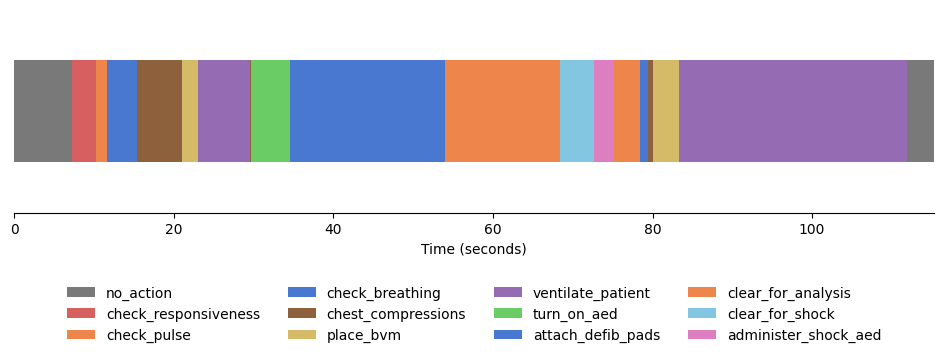

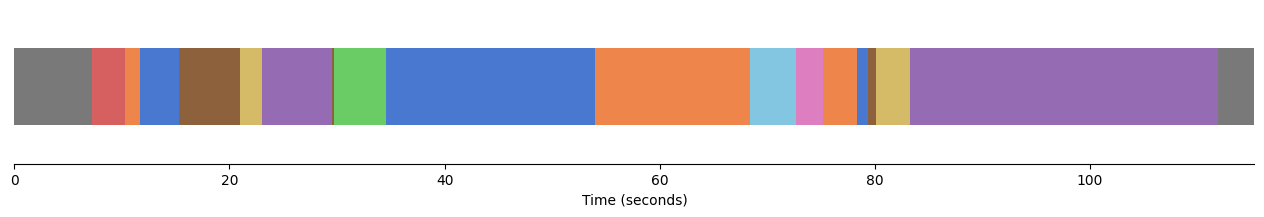

Subject: ng5, Trial: 19
GoPro file name: GX010371_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/19/GoPro/GX010371_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/19/GoPro/GX010371_encoded_trimmed.mp4
Segments: [(0, 7.34953, 'no_action'), (7.35, 9.74091, 'check_responsiveness'), (9.741, 10.80045, 'check_pulse'), (10.8, 13.75309, 'check_breathing'), (13.753, 14.70647, 'request_assistance'), (14.706, 29.15542, 'chest_compressions'), (21.601, 29.15542, 'place_bvm'), (29.155, 32.92885, 'ventilate_patient'), (32.929, 57.40542, 'chest_compressions'), (39.016, 41.54586, 'turn_on_aed'), (41.546, 54.12252, 'attach_defib_pads'), (54.123, 57.40542, 'place_bvm'), (57.405, 63.72248, 'ventilate_patient'), (58.842, 73.27223, 'clear_for_analysis'), (73.272, 77.38544, 'clear_for_shock'), (77.385, 80.87073, 'administer_shock_aed'), (80.871, 84.633

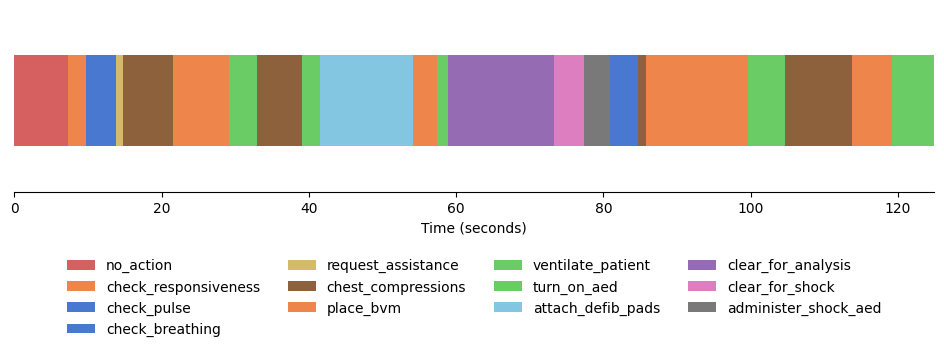

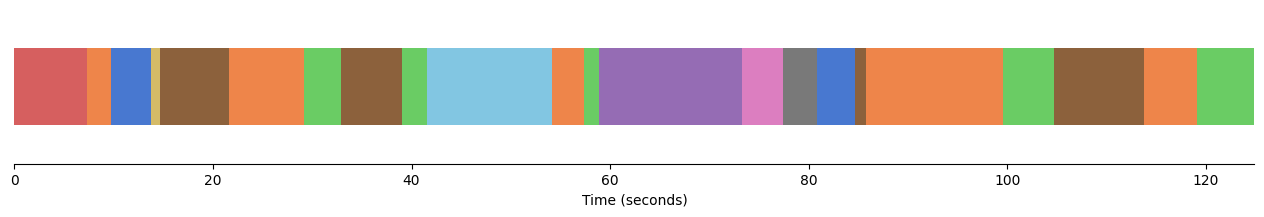

Subject: ng5, Trial: 2
GoPro file name: GX010318_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/2/GoPro/GX010318_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/2/GoPro/GX010318_encoded_trimmed.mp4
Segments: [(0, 6.6243, 'no_action'), (6.624, 10.23913, 'check_responsiveness'), (10.239, 12.10277, 'check_pulse'), (12.103, 18.96896, 'check_breathing'), (18.969, 35.1419, 'chest_compressions'), (35.142, 38.07191, 'place_bvm'), (38.072, 43.54792, 'ventilate_patient'), (43.548, 44.83936, 'turn_on_aed'), (44.839, 54.66226, 'attach_defib_pads'), (54.662, 61.16392, 'chest_compressions'), (61.164, 74.29995, 'clear_for_analysis'), (74.3, 78.77045, 'clear_for_shock'), (78.77, 82.2299, 'administer_shock_aed'), (82.23, 98.25473, 'chest_compressions'), (98.255, 101.30592, 'place_bvm'), (101.306, 108.32087, 'ventilate_patient'), (108.321, 124.554

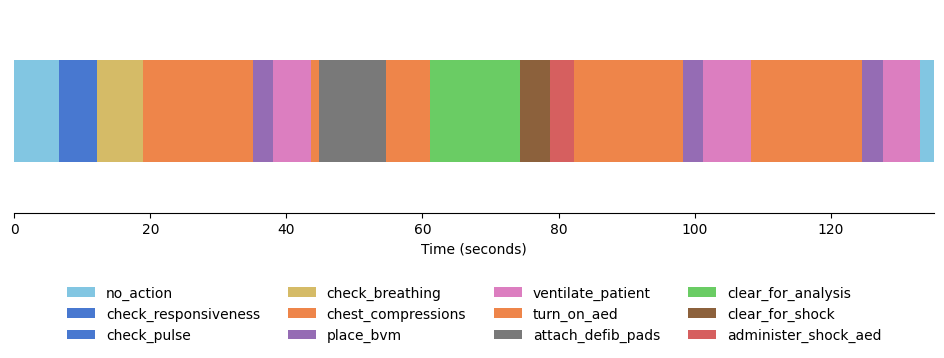

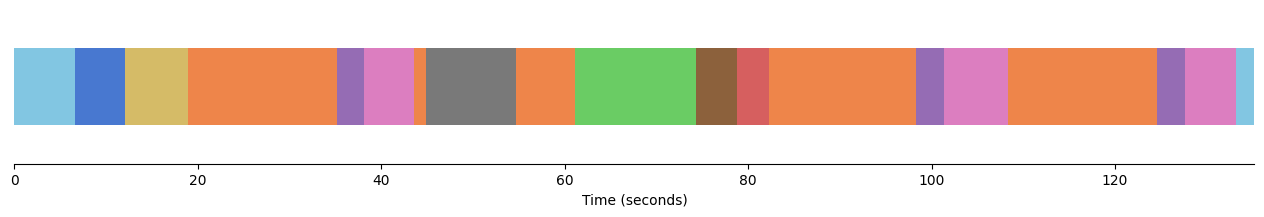

Subject: ng5, Trial: 20
GoPro file name: GX010372_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/20/GoPro/GX010372_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/20/GoPro/GX010372_encoded_trimmed.mp4
Segments: [(0, 7.0928, 'no_action'), (7.093, 9.35644, 'check_responsiveness'), (9.356, 14.36236, 'check_pulse'), (14.362, 15.07837, 'check_breathing'), (15.851, 30.59287, 'chest_compressions'), (17.514, 24.07553, 'place_bvm'), (24.076, 28.54308, 'turn_on_aed'), (28.543, 30.59287, 'place_bvm'), (30.593, 35.67606, 'ventilate_patient'), (35.676, 50.13752, 'attach_defib_pads'), (36.91394, 52.09412, 'chest_compressions'), (50.138, 64.49927, 'clear_for_analysis'), (52.02, 53.37268, 'place_bvm'), (53.373, 57.32571, 'ventilate_patient'), (64.499, 68.05668, 'clear_for_shock'), (68.057, 71.01975, 'administer_shock_aed'), (71.02, 74.30273, 'ch

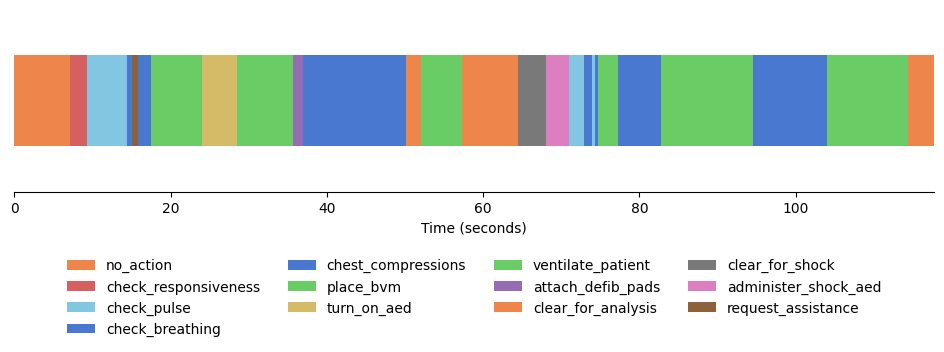

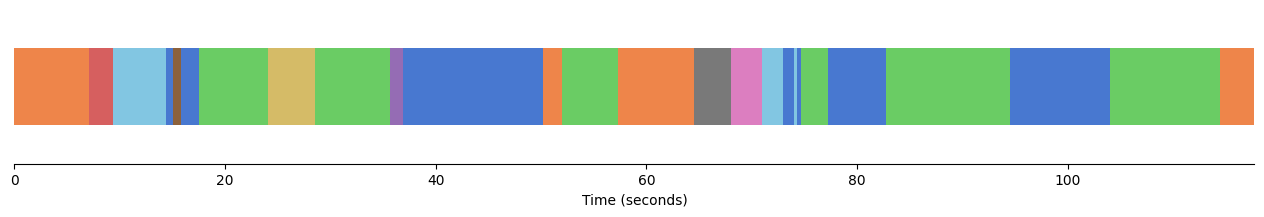

Subject: ng5, Trial: 3
GoPro file name: GX010319_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/3/GoPro/GX010319_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/3/GoPro/GX010319_encoded_trimmed.mp4
Segments: [(0, 9.0662, 'no_action'), (9.066, 12.66051, 'check_responsiveness'), (12.661, 14.23812, 'check_pulse'), (14.238, 20.53713, 'check_breathing'), (20.537, 35.24292, 'chest_compressions'), (35.243, 38.42637, 'place_bvm'), (38.426, 43.18932, 'ventilate_patient'), (43.189, 44.78959, 'turn_on_aed'), (44.79, 53.63647, 'attach_defib_pads'), (53.636, 60.13016, 'chest_compressions'), (73.302, 76.73683, 'clear_for_shock'), (60.13, 73.302, 'clear_for_analysis'), (76.737, 80.76794, 'administer_shock_aed'), (80.768, 95.38177, 'chest_compressions'), (95.382, 98.95273, 'place_bvm'), (98.953, 104.89997, 'ventilate_patient'), (104.9, 119.07621

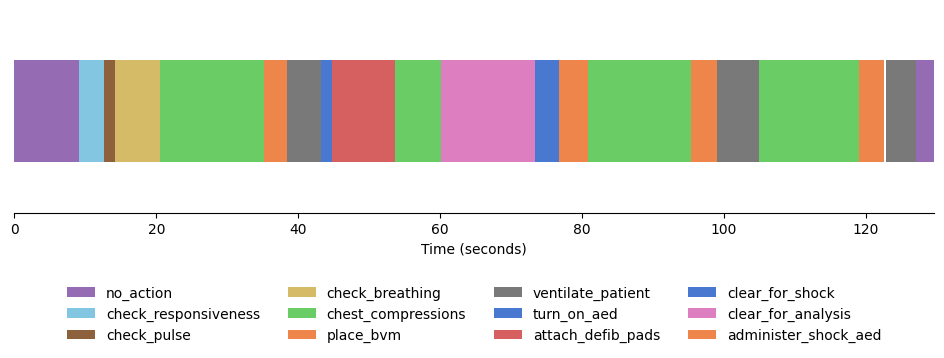

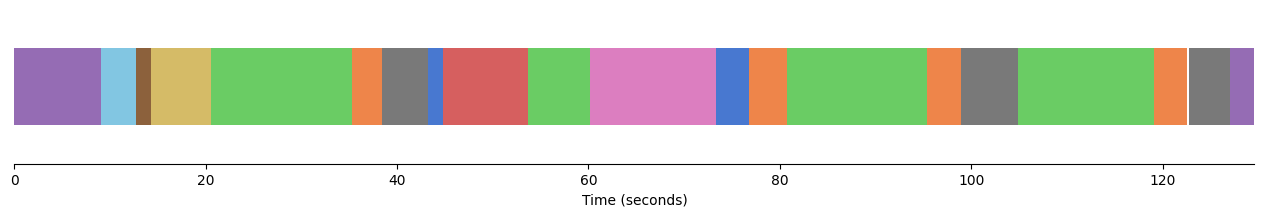

Subject: ng5, Trial: 4
GoPro file name: GX010320_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/4/GoPro/GX010320_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/4/GoPro/GX010320_encoded_trimmed.mp4
Segments: [(0, 6.88763, 'no_action'), (6.888, 10.46485, 'check_responsiveness'), (10.465, 13.31733, 'check_pulse'), (13.317, 18.38524, 'check_breathing'), (18.385, 32.75452, 'chest_compressions'), (32.755, 35.18077, 'place_bvm'), (35.181, 40.80598, 'ventilate_patient'), (40.806, 41.806, 'turn_on_aed'), (41.806, 49.46881, 'attach_defib_pads'), (49.469, 63.88654, 'clear_for_analysis'), (63.887, 67.03283, 'clear_for_shock'), (67.033, 71.49299, 'administer_shock_aed'), (71.493, 85.75903, 'chest_compressions'), (85.759, 89.04614, 'place_bvm'), (89.046, 94.56921, 'ventilate_patient'), (94.569, 108.49432, 'chest_compressions'), (108.494, 111.

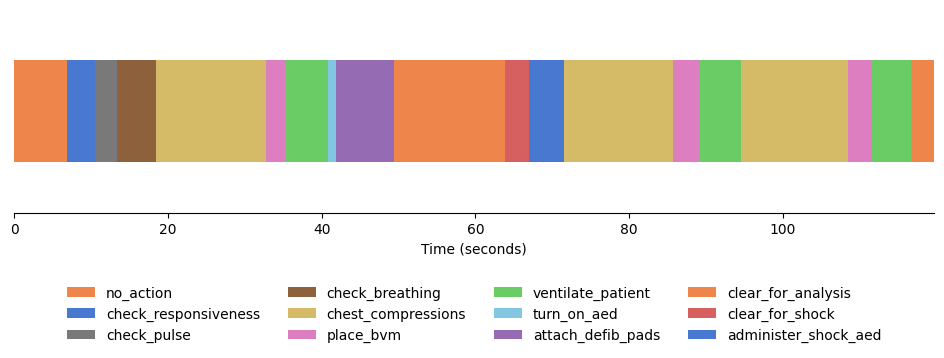

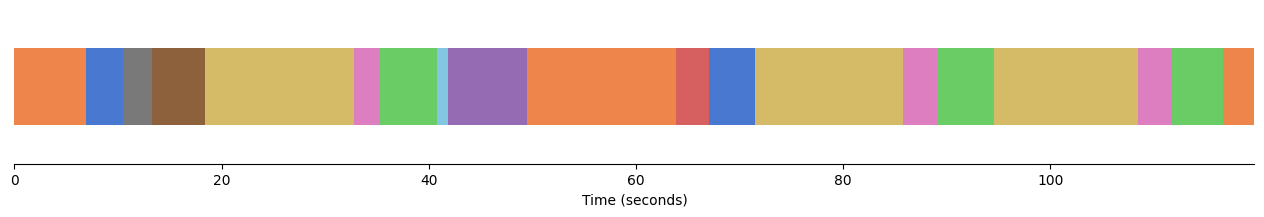

Subject: ng5, Trial: 5
GoPro file name: GX010326_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/5/GoPro/GX010326_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/5/GoPro/GX010326_encoded_trimmed.mp4
Segments: [(0, 6.00413, 'no_action'), (6.004, 8.10942, 'check_responsiveness'), (8.109, 9.36631, 'check_pulse'), (9.366, 14.93223, 'check_breathing'), (14.932, 31.51216, 'chest_compressions'), (31.512, 33.97452, 'place_bvm'), (33.975, 39.64408, 'ventilate_patient'), (39.644, 41.96565, 'turn_on_aed'), (41.966, 50.99459, 'attach_defib_pads'), (50.995, 56.5819, 'chest_compressions'), (56.582, 70.00298, 'clear_for_analysis'), (70.003, 73.95577, 'clear_for_shock'), (73.956, 77.8824, 'administer_shock_aed'), (77.882, 93.50903, 'chest_compressions'), (93.509, 96.43014, 'place_bvm'), (96.43, 101.74479, 'ventilate_patient'), (101.328, 119.092, 

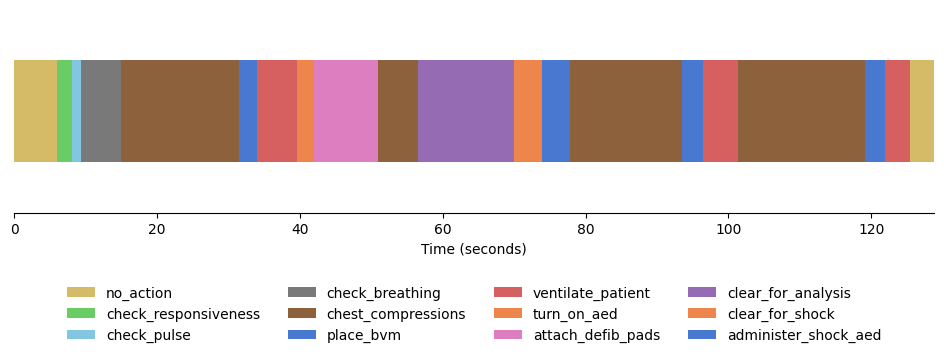

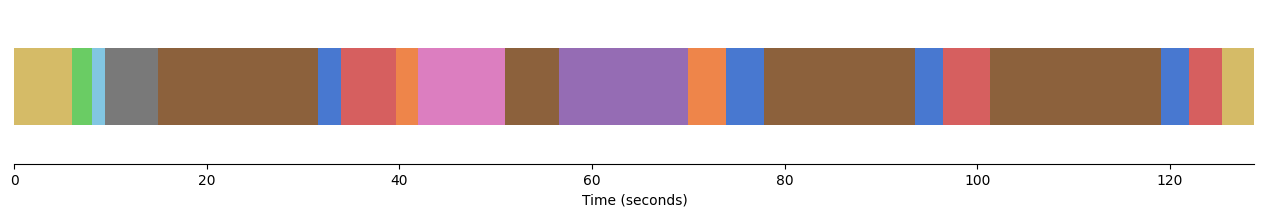

Subject: ng5, Trial: 6
GoPro file name: GX010327_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/6/GoPro/GX010327_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/6/GoPro/GX010327_encoded_trimmed.mp4
Segments: [(0, 4.69, 'no_action'), (4.69, 7.07099, 'check_responsiveness'), (7.071, 9.32748, 'check_pulse'), (9.327, 13.56469, 'check_breathing'), (13.565, 30.45542, 'chest_compressions'), (30.455, 33.05784, 'place_bvm'), (33.058, 39.30603, 'ventilate_patient'), (39.306, 40.35542, 'turn_on_aed'), (40.355, 47.79322, 'attach_defib_pads'), (47.793, 62.25609, 'clear_for_analysis'), (62.256, 66.39635, 'clear_for_shock'), (66.396, 69.84972, 'administer_shock_aed'), (69.85, 86.8735, 'chest_compressions'), (86.874, 89.30179, 'place_bvm'), (89.302, 95.10667, 'ventilate_patient'), (95.107, 110.81172, 'chest_compressions'), (110.812, 113.13776, '

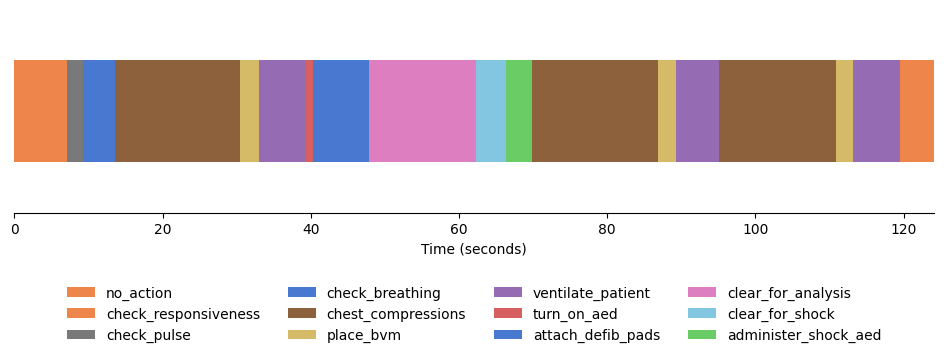

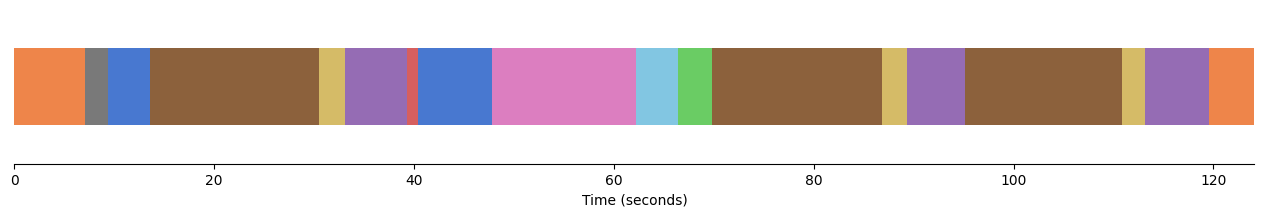

Subject: ng5, Trial: 7
GoPro file name: GX010328_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/7/GoPro/GX010328_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/7/GoPro/GX010328_encoded_trimmed.mp4
Segments: [(0, 13.05133, 'no_action'), (13.051, 16.83544, 'check_responsiveness'), (16.835, 19.04907, 'check_pulse'), (19.04907, 23.43371, 'check_breathing'), (23.434, 38.32776, 'chest_compressions'), (38.328, 40.438, 'place_bvm'), (40.438, 46.67623, 'ventilate_patient'), (46.676, 47.676, 'turn_on_aed'), (47.676, 55.34485, 'attach_defib_pads'), (55.345, 69.71589, 'clear_for_analysis'), (69.716, 73.9151, 'clear_for_shock'), (73.915, 77.43137, 'administer_shock_aed'), (77.431, 95.52685, 'chest_compressions'), (95.527, 97.88934, 'place_bvm'), (97.889, 103.50602, 'turn_on_aed'), (103.506, 119.49505, 'chest_compressions'), (119.495, 122.210

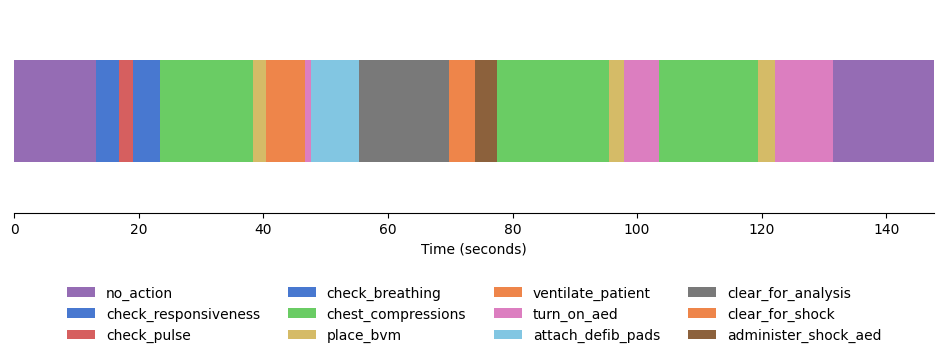

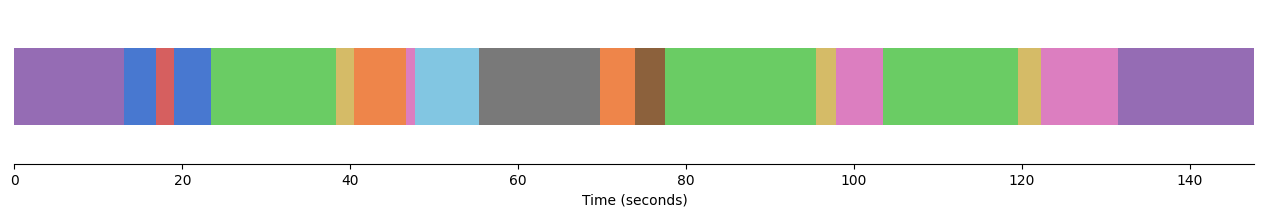

Subject: ng5, Trial: 8
GoPro file name: GX010329_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/8/GoPro/GX010329_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/8/GoPro/GX010329_encoded_trimmed.mp4
Segments: [(0, 7.70501, 'no_action'), (7.705, 12.63593, 'check_responsiveness'), (12.636, 19.36587, 'check_pulse'), (19.366, 35.04235, 'chest_compressions'), (35.042, 37.80261, 'place_bvm'), (37.803, 42.93881, 'ventilate_patient'), (42.939, 45.30316, 'turn_on_aed'), (45.303, 52.88831, 'attach_defib_pads'), (52.888, 67.29693, 'clear_for_analysis'), (67.297, 71.27486, 'clear_for_shock'), (71.275, 75.58508, 'administer_shock_aed'), (75.585, 92.17688, 'chest_compressions'), (92.177, 94.55811, 'place_bvm'), (94.558, 100.22085, 'ventilate_patient'), (100.221, 116.75924, 'chest_compressions'), (116.759, 119.41063, 'place_bvm'), (119.411, 124.

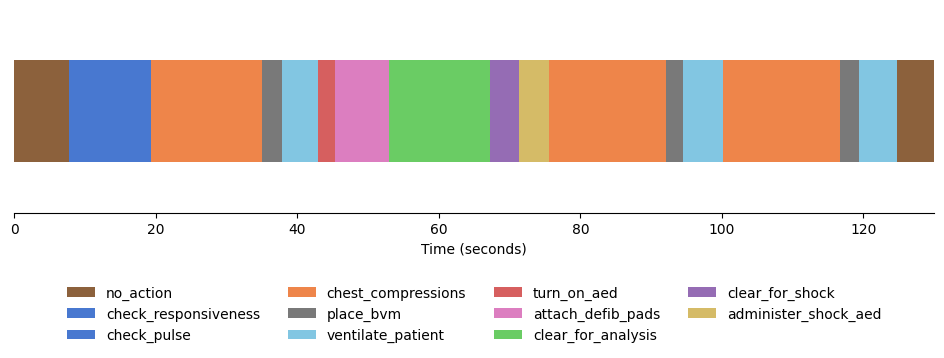

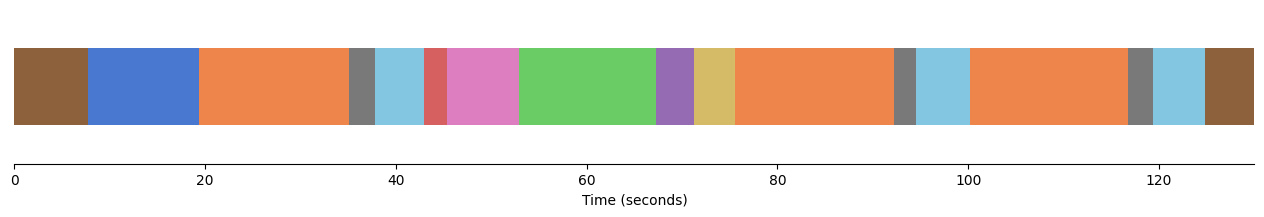

Subject: ng5, Trial: 9
GoPro file name: GX010330_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/9/GoPro/GX010330_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng5/cardiac_arrest/9/GoPro/GX010330_encoded_trimmed.mp4
Segments: [(0, 9.68976, 'no_action'), (9.69, 12.83559, 'check_responsiveness'), (12.836, 14.16892, 'check_pulse'), (14.169, 19.69011, 'check_breathing'), (19.69, 35.19427, 'chest_compressions'), (35.194, 38.32333, 'place_bvm'), (38.323, 43.45031, 'ventilate_patient'), (43.45, 45.37627, 'turn_on_aed'), (45.376, 53.50903, 'attach_defib_pads'), (53.509, 68.18788, 'clear_for_analysis'), (68.188, 72.17062, 'clear_for_shock'), (72.171, 75.37756, 'administer_shock_aed'), (75.378, 91.516, 'chest_compressions'), (91.516, 93.69996, 'place_bvm'), (93.7, 99.5013, 'ventilate_patient'), (99.501, 115.7756, 'chest_compressions'), (115.776, 118.2161, '

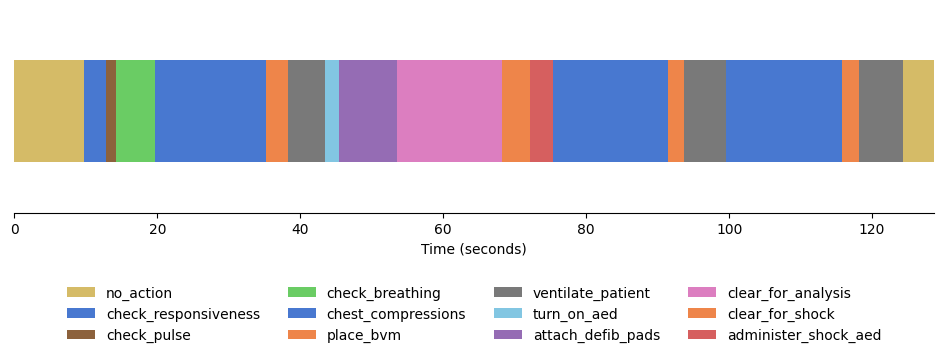

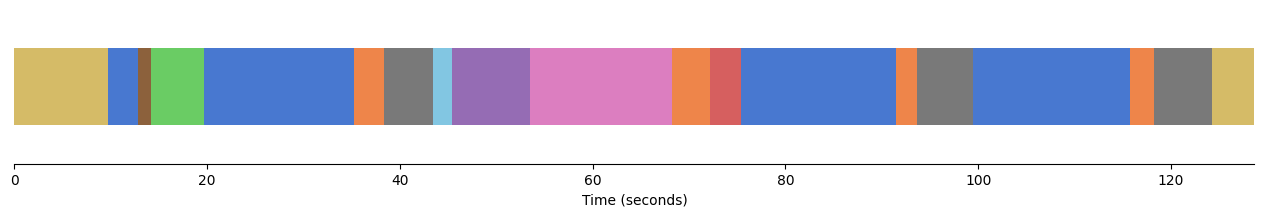

**************************************************
Subject: ng6, Trial: 0
GoPro file name: GX010358_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/0/GoPro/GX010358_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/0/GoPro/GX010358_encoded_trimmed.mp4
Segments: [(1.058, 3.00226, 'approach_patient'), (3.00226, 7.04392, 'check_responsiveness'), (6.96059, 13.46059, 'check_pulse'), (16.52309, 35.39809, 'chest_compressions'), (37.73142, 39.87726, 'place_bvm'), (39.96059, 44.60642, 'ventilate_patient'), (53.16892, 55.04392, 'turn_on_aed'), (61.16892, 72.85642, 'attach_defib_pads'), (73.35642, 82.75226, 'clear_for_analysis'), (83.00226, 85.39809, 'administer_shock_aed'), (85.33559, 92.14809, 'clear_for_shock'), (91.16892, 95.31476, 'administer_shock_aed'), (96.14809, 115.77309, 'chest_compressions'), (116.56476, 118.52309, 'place_bvm'), (1

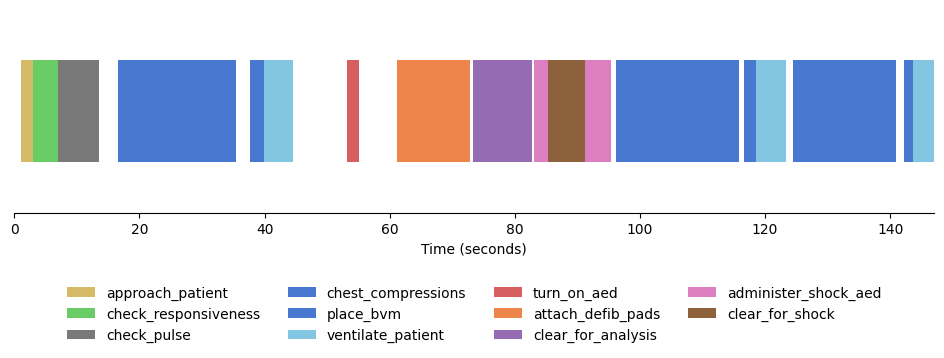

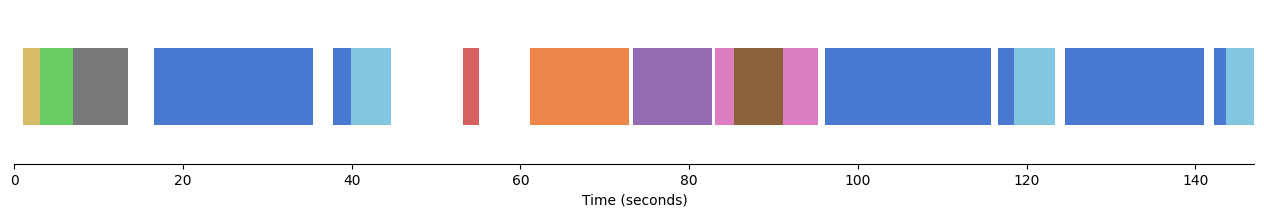

Subject: ng6, Trial: 1
GoPro file name: GX010359_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/1/GoPro/GX010359_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/1/GoPro/GX010359_encoded_trimmed.mp4
Segments: [(2.119, 4.50226, 'approach_patient'), (4.502, 8.52309, 'check_responsiveness'), (9.25226, 12.85642, 'check_pulse'), (13.06476, 31.68976, 'chest_compressions'), (33.18976, 34.52309, 'place_bvm'), (34.60642, 37.89809, 'ventilate_patient'), (46.21059, 60.23142, 'attach_defib_pads'), (61.35642, 70.85642, 'clear_for_analysis'), (72.85642, 78.12726, 'clear_for_shock'), (78.81476, 83.16892, 'administer_shock_aed'), (84.12726, 103.54392, 'chest_compressions'), (103.83559, 105.87726, 'place_bvm'), (106.02309, 109.79392, 'ventilate_patient'), (110.18976, 128.81476, 'chest_compressions'), (129.998, 130.998, 'place_bvm'), (130.998, 135.

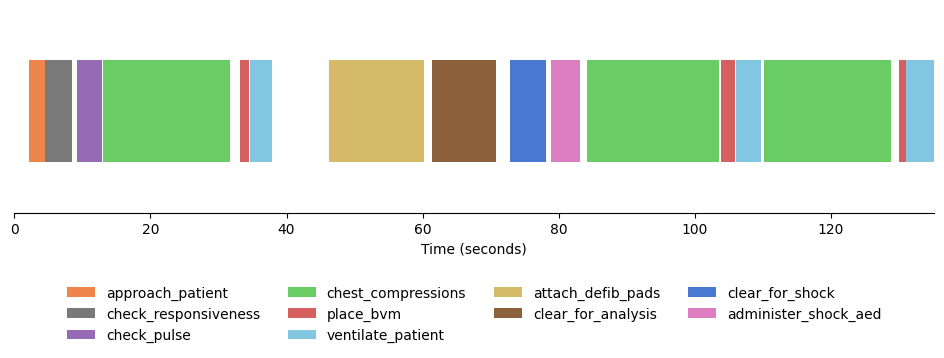

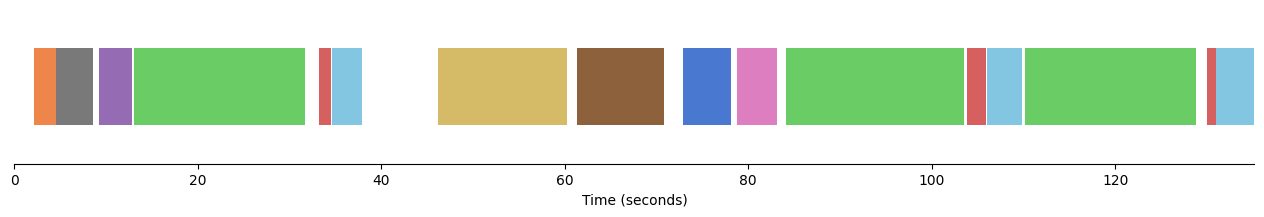

Subject: ng6, Trial: 2
GoPro file name: GX010360_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/2/GoPro/GX010360_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/2/GoPro/GX010360_encoded_trimmed.mp4
Segments: [(2.266, 3.08559, 'approach_patient'), (3.086, 8.58559, 'check_responsiveness'), (9.06476, 13.18976, 'check_pulse'), (13.25226, 30.79392, 'chest_compressions'), (30.91892, 32.60642, 'place_bvm'), (32.606, 36.02309, 'ventilate_patient'), (39.23142, 52.60642, 'attach_defib_pads'), (54.56476, 63.91892, 'clear_for_analysis'), (66.35642, 71.85642, 'clear_for_shock'), (72.37726, 77.52309, 'administer_shock_aed'), (77.75226, 97.58559, 'chest_compressions'), (97.98142, 100.87726, 'place_bvm'), (100.98142, 105.21059, 'ventilate_patient')]


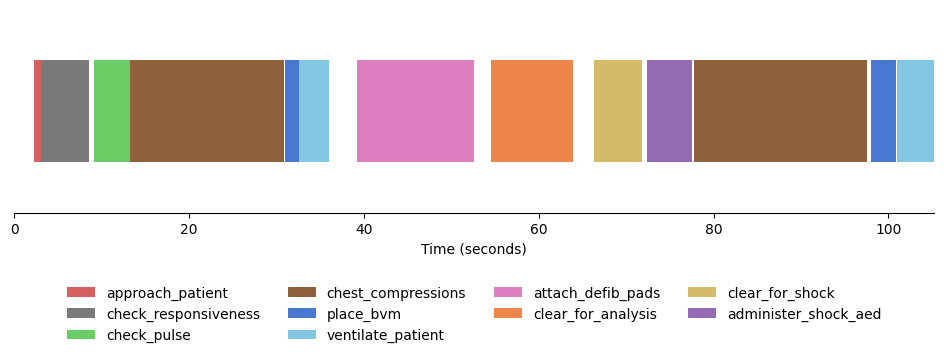

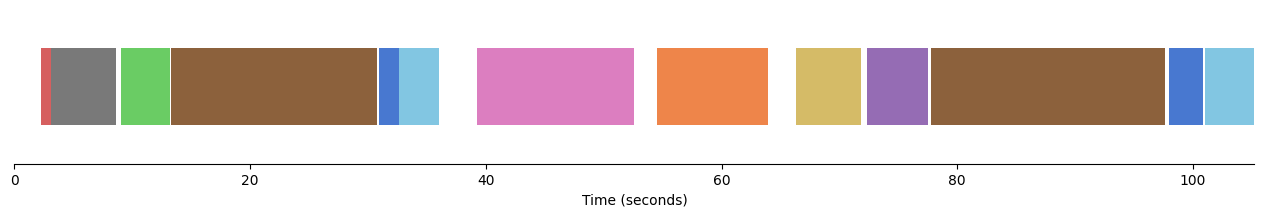

Subject: ng6, Trial: 3
GoPro file name: GX010381_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/3/GoPro/GX010381_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/3/GoPro/GX010381_encoded_trimmed.mp4
Segments: [(0, 3.38243, 'no_action'), (3.382, 9.49244, 'check_responsiveness'), (9.492, 13.02052, 'check_breathing'), (15.914, 18.5633, 'turn_on_aed'), (49.819, 63.97317, 'clear_for_analysis'), (63.973, 68.41625, 'clear_for_shock'), (68.416, 74.49803, 'administer_shock_aed'), (74.498, 92.4257, 'chest_compressions'), (92.426, 96.11685, 'place_bvm'), (96.117, 101.43377, 'ventilate_patient'), (101.434, 117.14327, 'chest_compressions'), (117.143, 120.85405, 'place_bvm'), (120.854, 126.393, 'ventilate_patient'), (13.021, 15.914, 'check_responsiveness'), (15.914, 49.819, 'attach_defib_pads')]


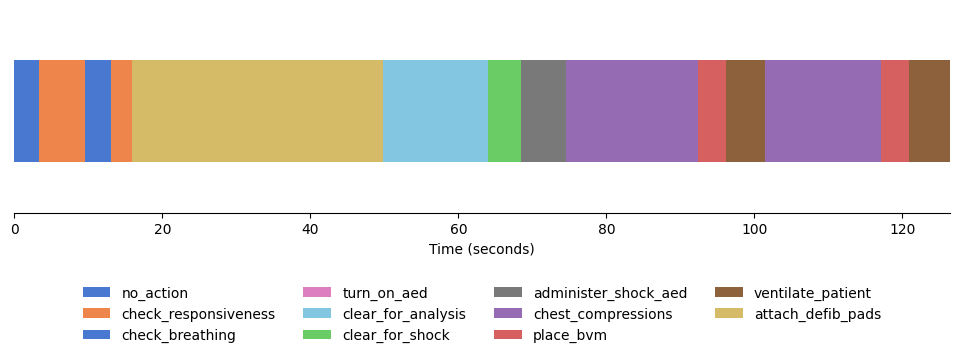

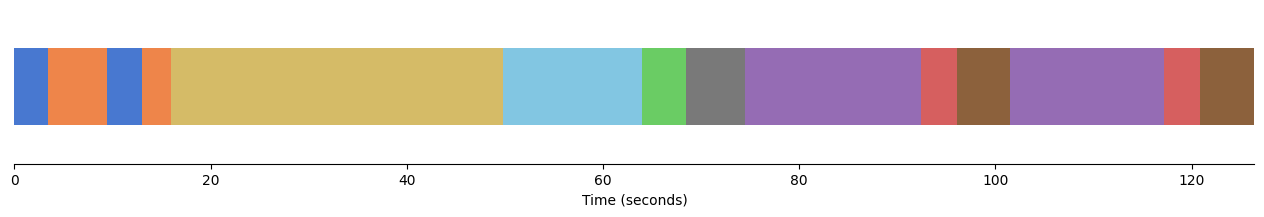

Subject: ng6, Trial: 4
GoPro file name: GX010382_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/4/GoPro/GX010382_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/4/GoPro/GX010382_encoded_trimmed.mp4
Segments: [(0, 5.14036, 'no_action'), (8.878, 12.445, 'check_pulse'), (5.14, 8.878, 'check_responsiveness'), (12.445, 15.76539, 'check_breathing'), (15.765, 33.54302, 'chest_compressions'), (33.543, 36.5527, 'place_bvm'), (36.553, 42.59995, 'ventilate_patient'), (42.6, 60.498, 'chest_compressions'), (60.498, 63.08414, 'place_bvm'), (63.084, 68.88768, 'ventilate_patient'), (68.888, 69.90052, 'request_assistance'), (69.901, 76.28776, 'turn_on_aed'), (76.288, 97.71671, 'attach_defib_pads'), (97.717, 112.11935, 'clear_for_analysis'), (112.119, 116.38134, 'clear_for_shock'), (116.381, 119.86247, 'administer_shock_aed'), (119.862, 141.37959,

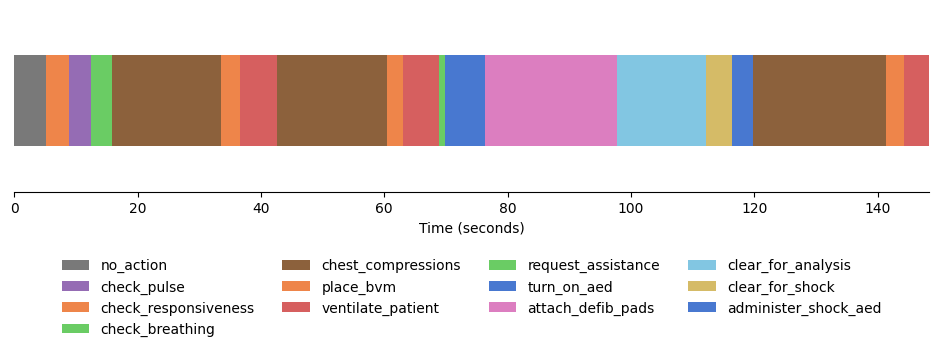

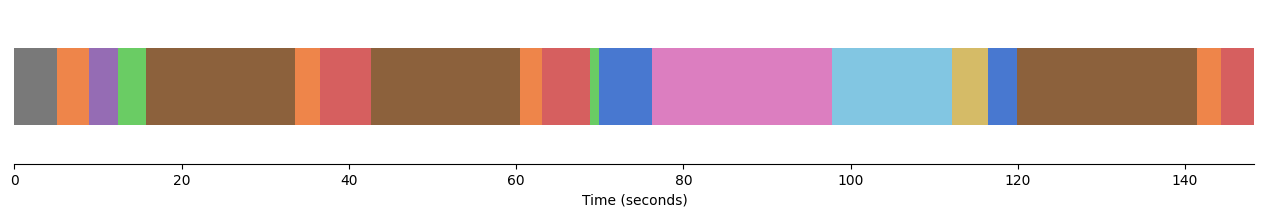

Subject: ng6, Trial: 5
GoPro file name: GX010383_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/5/GoPro/GX010383_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng6/cardiac_arrest/5/GoPro/GX010383_encoded_trimmed.mp4
Segments: [(0, 3.12976, 'no_action'), (3.13, 7.09915, 'check_responsiveness'), (7.099, 10.29037, 'check_breathing'), (10.29, 14.78413, 'check_pulse'), (14.784, 32.11515, 'chest_compressions'), (32.115, 34.75972, 'place_bvm'), (34.76, 39.80385, 'ventilate_patient'), (39.804, 56.79609, 'chest_compressions'), (56.796, 59.39883, 'place_bvm'), (59.399, 64.20728, 'ventilate_patient'), (64.207, 66.26355, 'check_pulse'), (66.309, 69.3128, 'turn_on_aed'), (69.313, 103.2763, 'attach_defib_pads'), (103.276, 117.78784, 'clear_for_analysis'), (117.788, 121.9082, 'clear_for_shock'), (121.908, 128.06921, 'administer_shock_aed'), (128.069, 146.91564, 

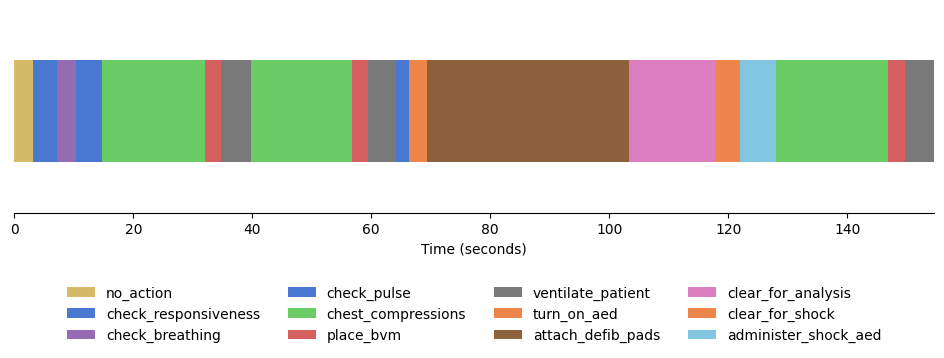

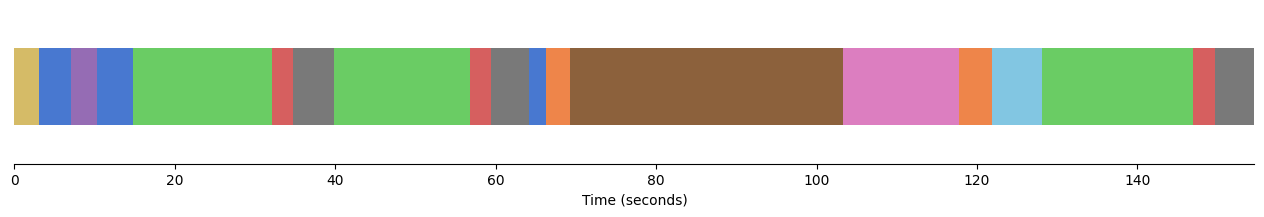

**************************************************
Subject: ng7, Trial: 0
GoPro file name: GX010347_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng7/cardiac_arrest/0/GoPro/GX010347_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng7/cardiac_arrest/0/GoPro/GX010347_encoded_trimmed.mp4
Segments: [(0, 4.11656, 'approach_patient'), (4.117, 5.83634, 'check_responsiveness'), (5.836, 7.63475, 'check_pulse'), (7.635, 57.13177, 'chest_compressions'), (24.149, 26.51279, 'place_bvm'), (33.879, 35.432, 'turn_on_aed'), (31.088, 34.721, 'ventilate_patient'), (43.58785, 49.07333, 'attach_defib_pads'), (45.171, 49.76355, 'ventilate_patient'), (57.132, 64.44669, 'clear_for_analysis'), (64.447, 70.63177, 'clear_for_shock'), (70.626, 74.05909, 'administer_shock_aed'), (76.507, 78.81914, 'check_pulse'), (79.724, 81.25444, 'place_bvm'), (78.819, 138.76556, 'chest_compressions'), (93.94

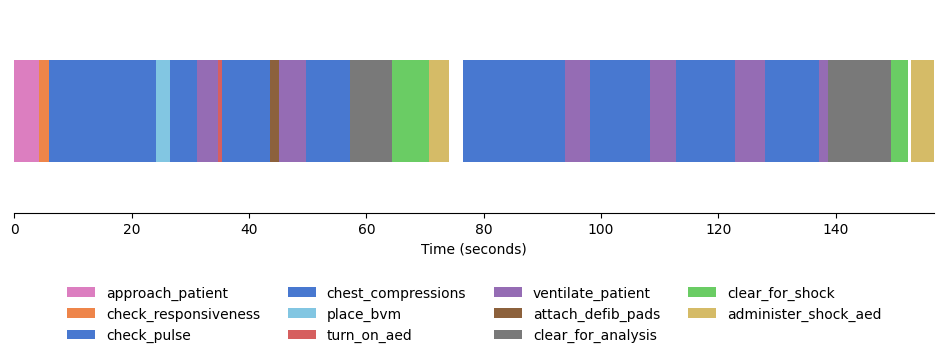

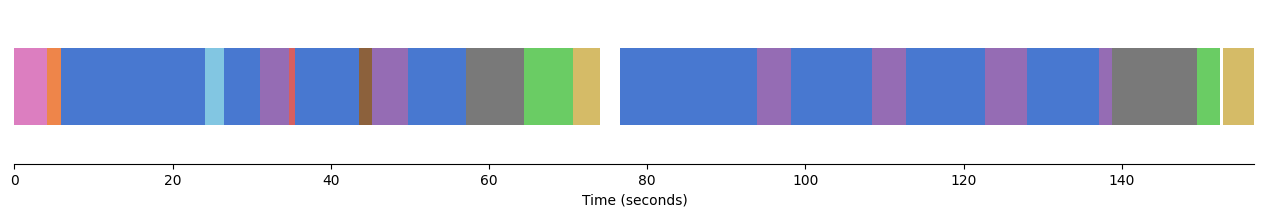

**************************************************
Subject: ng8, Trial: 0
GoPro file name: GX010321_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/0/GoPro/GX010321_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/0/GoPro/GX010321_encoded_trimmed.mp4
Segments: [(5.091, 7.55542, 'check_breathing'), (10.983, 15.05542, 'check_breathing'), (5.091, 7.55542, 'check_pulse'), (10.983, 15.05542, 'check_pulse'), (15.055, 34.94778, 'chest_compressions'), (34.948, 49.16057, 'attach_defib_pads'), (49.161, 59.23004, 'turn_on_aed'), (59.23, 73.49156, 'clear_for_analysis'), (73.492, 78.96496, 'clear_for_shock'), (78.965, 85.31311, 'administer_shock_aed'), (85.313, 104.4543, 'chest_compressions'), (104.454, 107.32984, 'place_bvm'), (107.33, 113.00486, 'ventilate_patient'), (113.005, 127.5076, 'chest_compressions'), (127.508, 130.00532, 'place_bvm')

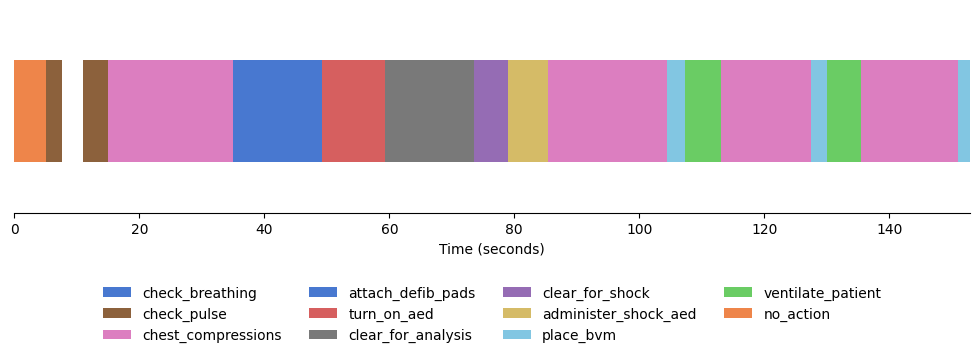

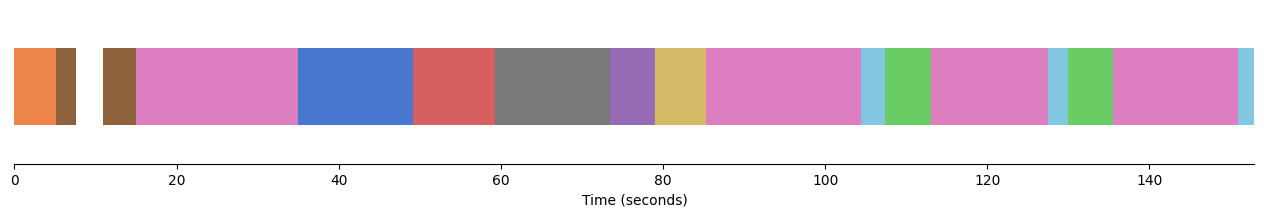

Subject: ng8, Trial: 1
GoPro file name: GX010322_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/1/GoPro/GX010322_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/1/GoPro/GX010322_encoded_trimmed.mp4
Segments: [(5.837, 10.25271, 'check_pulse'), (5.837, 10.25271, 'check_responsiveness'), (10.253, 30.39204, 'chest_compressions'), (30.392, 32.31928, 'place_bvm'), (32.319, 36.8621, 'ventilate_patient'), (36.862, 56.62952, 'chest_compressions'), (56.63, 65.67118, 'attach_defib_pads'), (65.671, 69.08489, 'turn_on_aed'), (69.085, 79.78742, 'chest_compressions'), (79.787, 81.88474, 'place_bvm'), (81.885, 85.09153, 'ventilate_patient'), (85.092, 103.59487, 'chest_compressions'), (103.595, 105.64672, 'place_bvm'), (105.647, 110.3366, 'ventilate_patient'), (110.337, 126.76883, 'clear_for_analysis'), (126.769, 131.9257, 'clear_for_shock'), (13

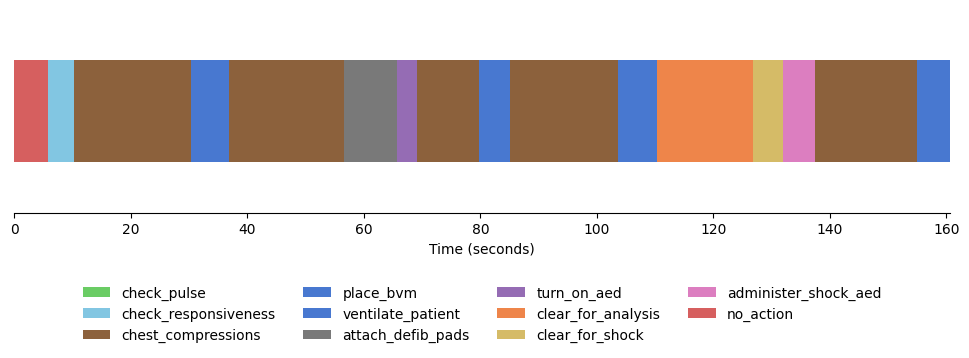

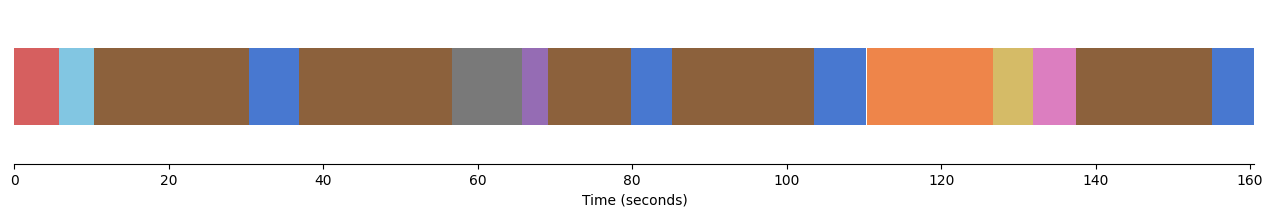

Subject: ng8, Trial: 10
GoPro file name: GX010380_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/10/GoPro/GX010380_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/10/GoPro/GX010380_encoded_trimmed.mp4
Segments: [(0, 3.2614, 'no_action'), (3.261, 19.91538, 'chest_compressions'), (19.915, 24.94651, 'place_bvm'), (24.947, 29.46281, 'ventilate_patient'), (29.463, 48.39334, 'chest_compressions'), (48.393, 53.75055, 'place_bvm'), (53.751, 57.70781, 'ventilate_patient'), (57.708, 59.31239, 'attach_defib_pads'), (59.312, 61.57615, 'turn_on_aed'), (61.576, 70.10153, 'attach_defib_pads'), (70.102, 84.56014, 'clear_for_analysis'), (84.56, 88.15633, 'clear_for_shock'), (88.156, 93.83775, 'administer_shock_aed'), (93.838, 114.15375, 'chest_compressions'), (114.154, 117.30077, 'place_bvm'), (117.301, 120.88743, 'ventilate_patient')]


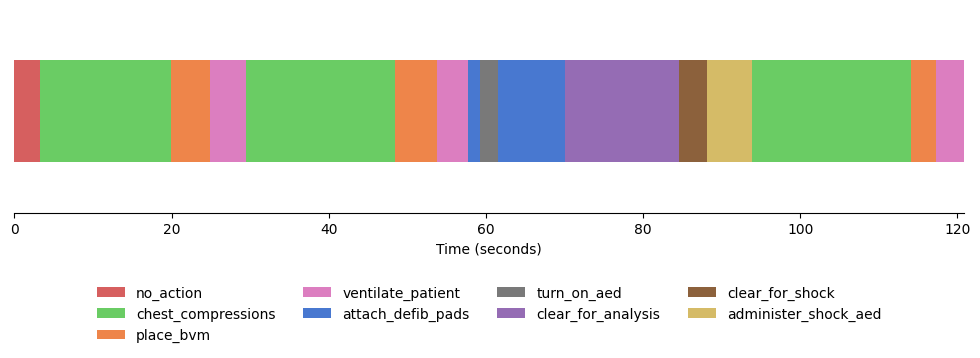

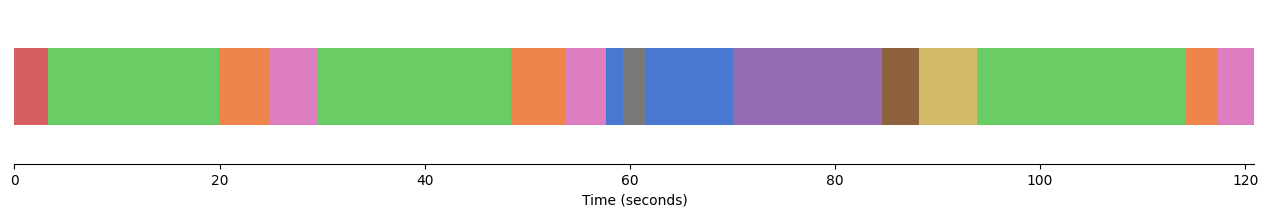

Subject: ng8, Trial: 2
GoPro file name: GX010323_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/2/GoPro/GX010323_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/2/GoPro/GX010323_encoded_trimmed.mp4
Segments: [(9.049, 9.849, 'chest_compressions'), (9.849, 13.33594, 'check_pulse'), (13.336, 31.04347, 'chest_compressions'), (31.043, 32.95999, 'place_bvm'), (32.96, 36.46622, 'ventilate_patient'), (36.466, 45.54104, 'attach_defib_pads'), (45.541, 60.0638, 'clear_for_analysis'), (60.064, 64.37527, 'clear_for_shock'), (69.692, 87.4257, 'chest_compressions'), (87.426, 89.67951, 'place_bvm'), (89.68, 95.69558, 'ventilate_patient'), (95.696, 111.62867, 'chest_compressions'), (111.629, 113.79641, 'place_bvm'), (113.796, 119.69565, 'ventilate_patient'), (119.696, 135.69965, 'chest_compressions'), (135.7, 137.44636, 'place_bvm'), (137.446, 14

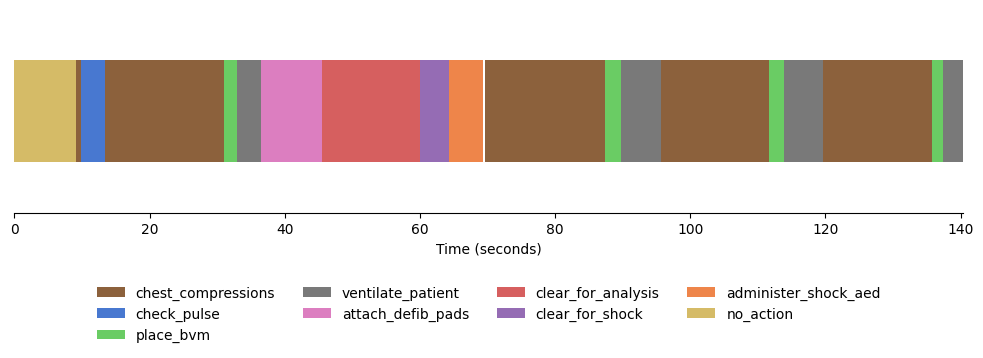

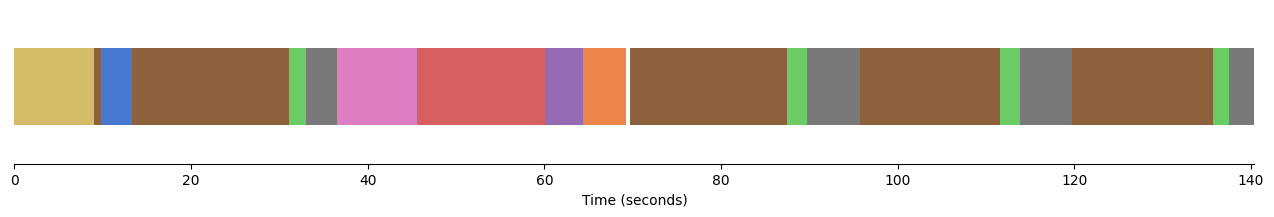

Subject: ng8, Trial: 3
GoPro file name: GX010324_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/3/GoPro/GX010324_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/3/GoPro/GX010324_encoded_trimmed.mp4
Segments: [(4.941, 9.23093, 'check_pulse'), (9.231, 11.22285, 'check_breathing'), (11.223, 25.92118, 'chest_compressions'), (25.921, 28.28858, 'place_bvm'), (28.289, 32.51305, 'ventilate_patient'), (32.513, 33.77364, 'turn_on_aed'), (33.774, 43.72013, 'attach_defib_pads'), (43.72, 58.02418, 'clear_for_analysis'), (58.024, 62.41269, 'clear_for_shock'), (62.413, 67.83786, 'administer_shock_aed'), (67.838, 86.39654, 'chest_compressions'), (86.397, 88.49376, 'place_bvm'), (88.494, 93.07801, 'ventilate_patient'), (93.078, 110.17103, 'chest_compressions'), (110.171, 112.05395, 'place_bvm'), (112.054, 116.01167, 'ventilate_patient'), (116.012

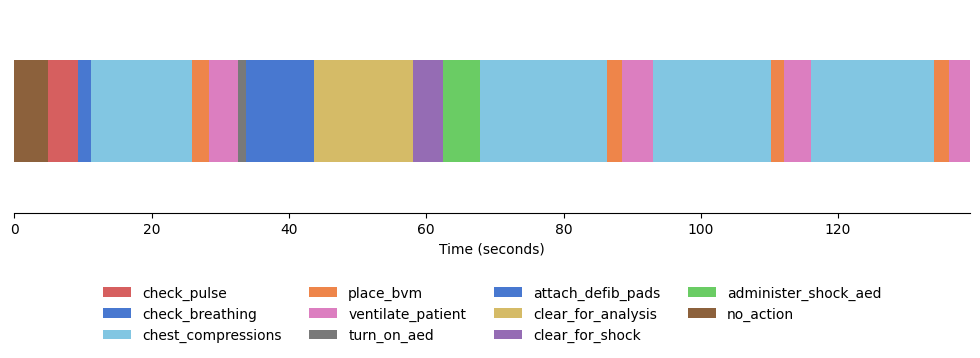

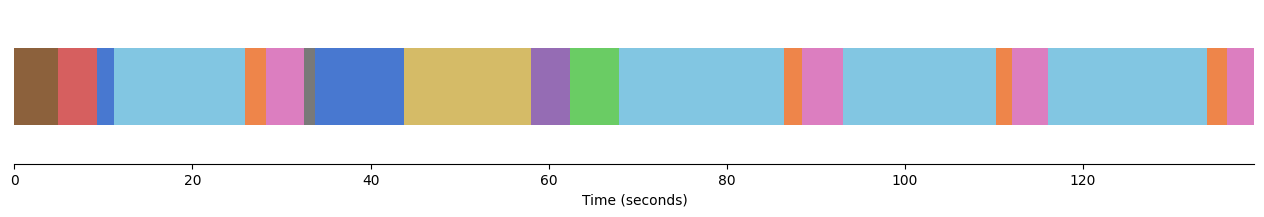

Subject: ng8, Trial: 4
GoPro file name: GX010325_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/4/GoPro/GX010325_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/4/GoPro/GX010325_encoded_trimmed.mp4
Segments: [(5.72, 10.28811, 'check_breathing'), (5.72, 10.28811, 'check_pulse'), (10.288, 26.59237, 'chest_compressions'), (26.592, 29.06733, 'place_bvm'), (29.067, 33.31016, 'ventilate_patient'), (33.31, 44.49634, 'attach_defib_pads'), (44.496, 47.42682, 'turn_on_aed'), (47.427, 61.58367, 'chest_compressions'), (61.584, 64.03535, 'place_bvm'), (64.035, 68.88108, 'ventilate_patient'), (68.881, 85.6757, 'chest_compressions'), (85.676, 87.78325, 'place_bvm'), (87.783, 91.79957, 'ventilate_patient'), (91.8, 108.79481, 'clear_for_analysis'), (108.795, 113.97591, 'clear_for_shock'), (113.976, 119.21663, 'administer_shock_aed'), (119.217, 13

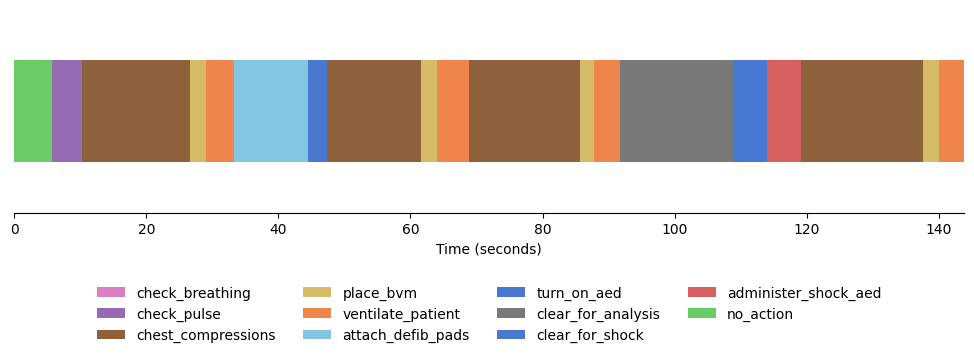

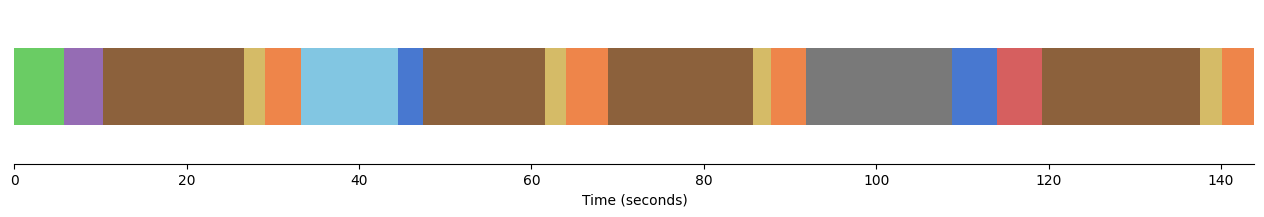

Subject: ng8, Trial: 5
GoPro file name: GX010361_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/5/GoPro/GX010361_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/5/GoPro/GX010361_encoded_trimmed.mp4
Segments: [(1.10642, 3.35642, 'check_pulse'), (3.79392, 21.60642, 'chest_compressions'), (22.35642, 23.85642, 'place_bvm'), (24.50226, 28.37726, 'ventilate_patient'), (37.02309, 48.54392, 'attach_defib_pads'), (48.71059, 58.33559, 'clear_for_analysis'), (60.64809, 65.27309, 'clear_for_shock'), (66.73142, 71.85642, 'administer_shock_aed'), (72.60642, 91.83559, 'chest_compressions'), (92.31476, 95.87726, 'place_bvm'), (96.12726, 99.43976, 'ventilate_patient'), (100.60642, 115.54392, 'chest_compressions'), (116.04392, 118.33559, 'place_bvm'), (118.68976, 121.66892, 'ventilate_patient')]


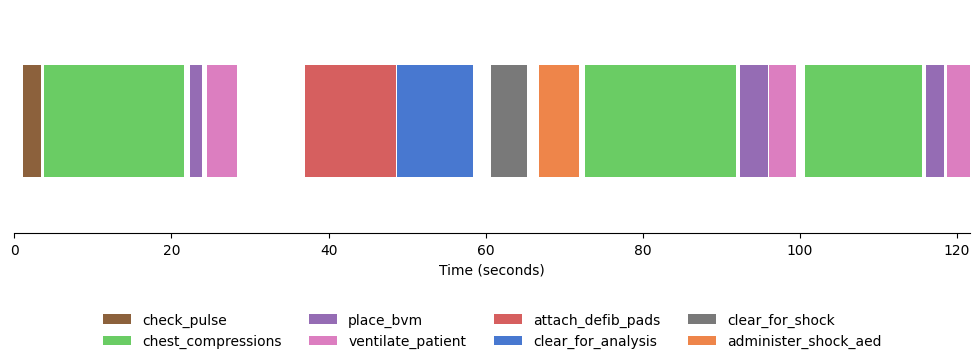

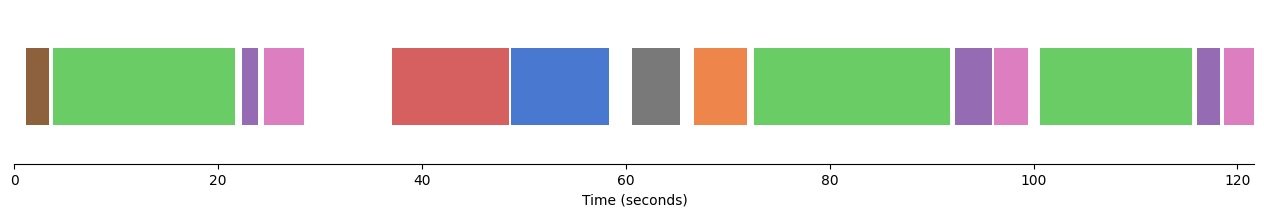

Subject: ng8, Trial: 6
GoPro file name: GX010362_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/6/GoPro/GX010362_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/6/GoPro/GX010362_encoded_trimmed.mp4
Segments: [(2.14809, 3.93976, 'approach_patient'), (4.39809, 5.96059, 'check_pulse'), (6.14809, 21.06476, 'chest_compressions'), (21.37726, 24.87726, 'place_bvm'), (25.27309, 27.87726, 'ventilate_patient'), (32.87726, 42.39809, 'attach_defib_pads'), (37.21059, 38.08559, 'turn_on_aed'), (45.179, 45.79392, 'chest_compressions'), (46.98142, 51.60642, 'place_bvm'), (51.68976, 53.64809, 'ventilate_patient'), (55.23142, 70.04392, 'chest_compressions'), (70.93976, 74.06476, 'place_bvm'), (74.065, 76.31476, 'ventilate_patient'), (77.85642, 93.58559, 'chest_compressions'), (93.912, 98.18976, 'place_bvm'), (98.37726, 100.79392, 'ventilate_patien

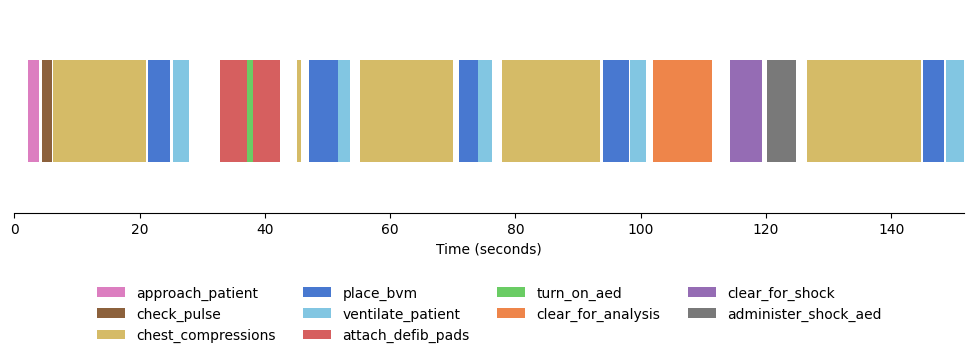

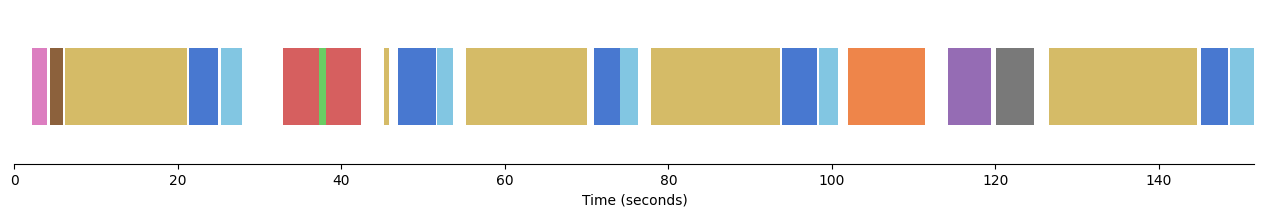

Subject: ng8, Trial: 7
GoPro file name: GX010363_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/7/GoPro/GX010363_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/7/GoPro/GX010363_encoded_trimmed.mp4
Segments: [(3.812, 6.43976, 'turn_on_aed'), (9.37726, 17.68976, 'chest_compressions'), (20.56476, 37.18976, 'attach_defib_pads'), (37.50226, 46.68976, 'clear_for_analysis'), (49.46059, 55.06476, 'clear_for_shock'), (55.065, 60.00226, 'administer_shock_aed'), (60.73142, 80.14809, 'chest_compressions'), (80.62726, 83.37726, 'place_bvm'), (83.48142, 85.68976, 'ventilate_patient'), (88.12726, 103.91892, 'chest_compressions'), (104.29392, 107.35642, 'place_bvm'), (107.50226, 110.48142, 'ventilate_patient')]


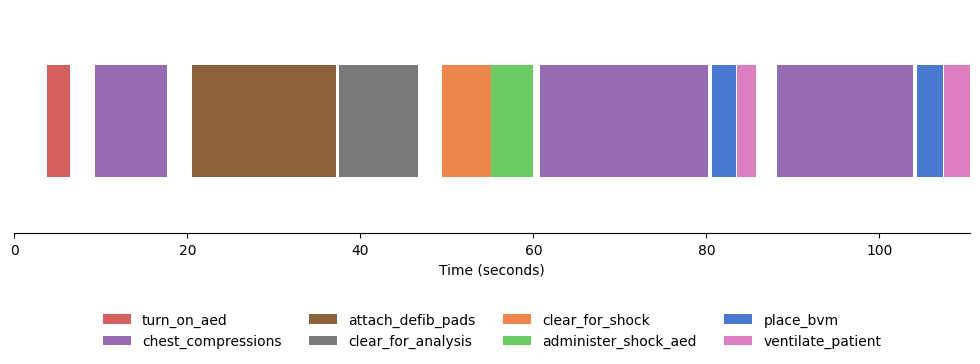

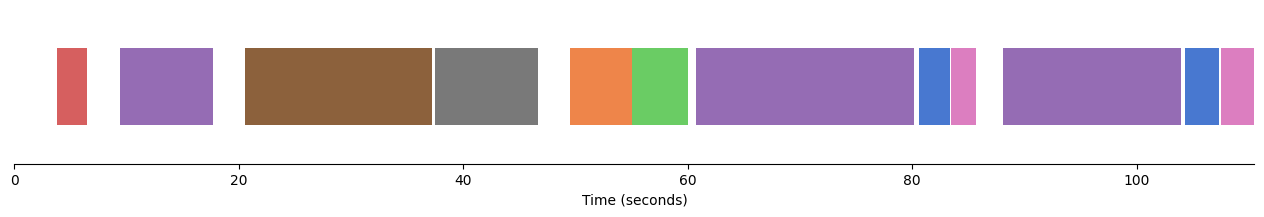

Subject: ng8, Trial: 8
GoPro file name: GX010378_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/8/GoPro/GX010378_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/8/GoPro/GX010378_encoded_trimmed.mp4
Segments: [(0, 1.73534, 'no_action'), (1.735, 6.47472, 'check_pulse'), (6.475, 26.66483, 'chest_compressions'), (26.665, 31.70924, 'place_bvm'), (31.709, 37.0941, 'ventilate_patient'), (37.094, 52.39456, 'chest_compressions'), (52.395, 77.69427, 'attach_defib_pads'), (71.342, 80.83622, 'turn_on_aed'), (80.836, 95.34463, 'clear_for_analysis'), (95.345, 99.8271, 'clear_for_shock'), (99.827, 105.92468, 'administer_shock_aed'), (105.925, 123.75903, 'chest_compressions'), (123.759, 127.85285, 'place_bvm'), (127.853, 132.59913, 'ventilate_patient')]


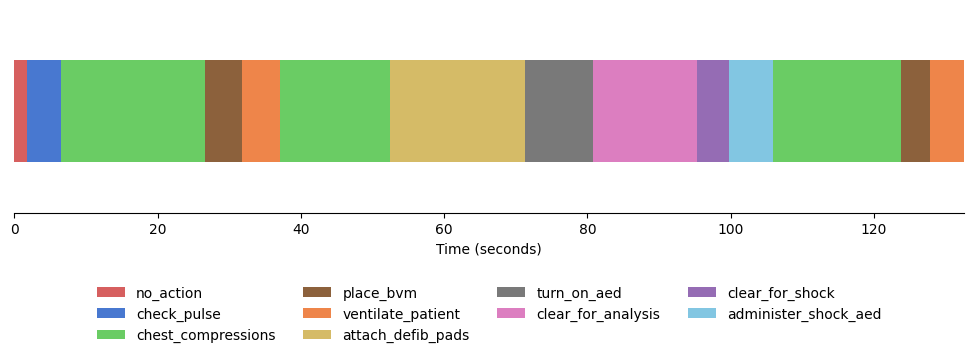

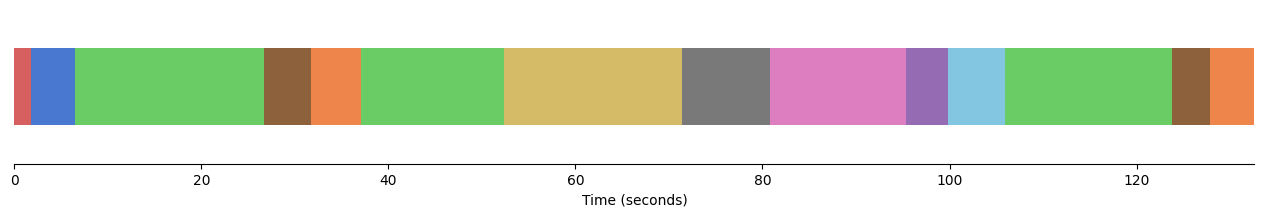

Subject: ng8, Trial: 9
GoPro file name: GX010379_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/9/GoPro/GX010379_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng8/cardiac_arrest/9/GoPro/GX010379_encoded_trimmed.mp4
Segments: [(0, 2.60805, 'no_action'), (2.608, 17.42895, 'chest_compressions'), (17.429, 21.85385, 'place_bvm'), (21.854, 28.84726, 'ventilate_patient'), (28.847, 46.92118, 'chest_compressions'), (46.921, 51.08761, 'attach_defib_pads'), (51.088, 54.55228, 'turn_on_aed'), (54.552, 63.46705, 'attach_defib_pads'), (63.467, 77.90971, 'clear_for_analysis'), (77.91, 81.80787, 'clear_for_shock'), (81.808, 88.42468, 'administer_shock_aed'), (88.425, 106.3691, 'chest_compressions'), (106.369, 111.32265, 'place_bvm'), (111.323, 115.85094, 'ventilate_patient'), (115.851, 131.19713, 'chest_compressions'), (131.197, 134.69096, 'place_bvm'), (134.691

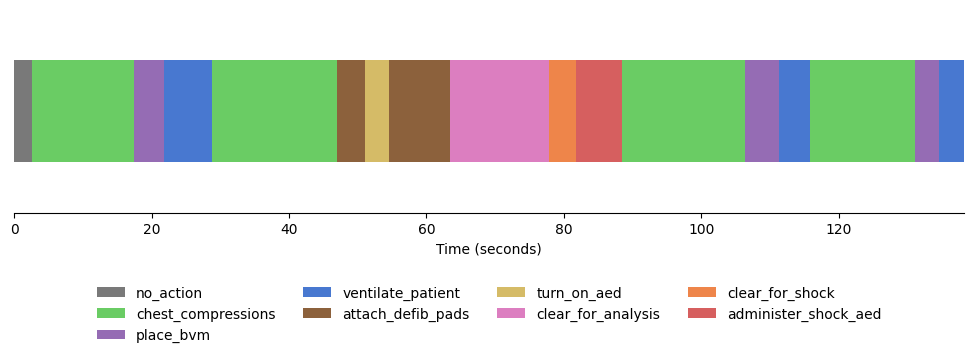

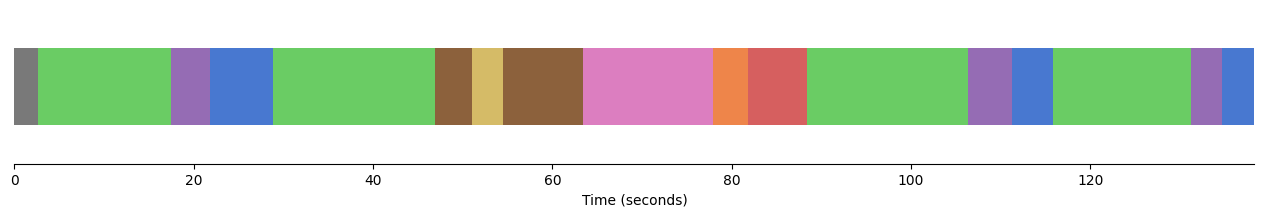

**************************************************
Subject: ng9, Trial: 0
GoPro file name: GX010345_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng9/cardiac_arrest/0/GoPro/GX010345_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng9/cardiac_arrest/0/GoPro/GX010345_encoded_trimmed.mp4
Segments: [(0, 5.05785, 'no_action'), (5.058, 7.01918, 'approach_patient'), (7.019, 9.98142, 'check_responsiveness'), (9.981, 13.16892, 'check_pulse'), (13.169, 14.82694, 'check_breathing'), (25.571, 27.16, 'place_bvm'), (13.169, 88, 'chest_compressions')]


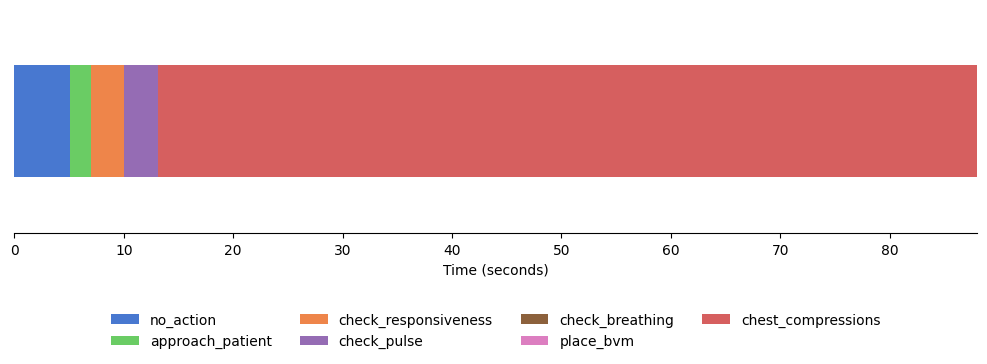

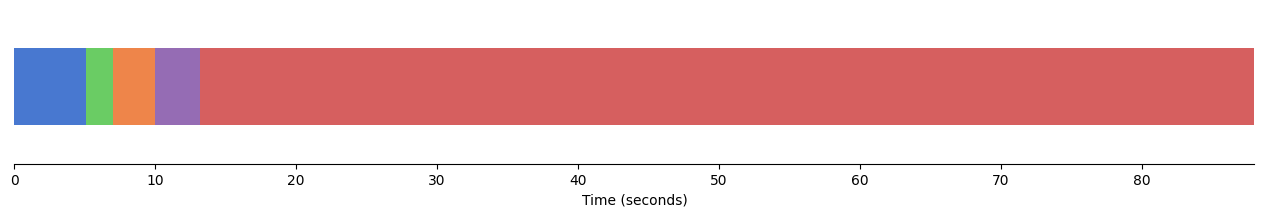

Subject: ng9, Trial: 1
GoPro file name: GX010346_encoded_trimmed.mp4, GoPro file path: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng9/cardiac_arrest/1/GoPro/GX010346_encoded_trimmed.mp4
Video file: /standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/ng9/cardiac_arrest/1/GoPro/GX010346_encoded_trimmed.mp4
Segments: [(0, 3.18206, 'approach_patient'), (3.182, 5.45519, 'check_responsiveness'), (5.455, 9.56142, 'check_pulse'), (29.655, 30.681, 'request_assistance'), (30.90542, 32.609, 'place_bvm'), (36.542, 51.96711, 'ventilate_patient'), (56.40542, 58.607, 'ventilate_patient'), (71.30542, 72.993, 'ventilate_patient'), (9.561, 71, 'chest_compressions')]


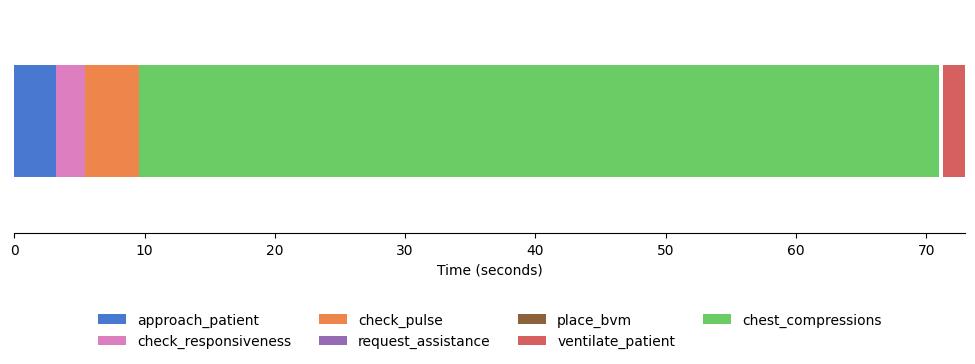

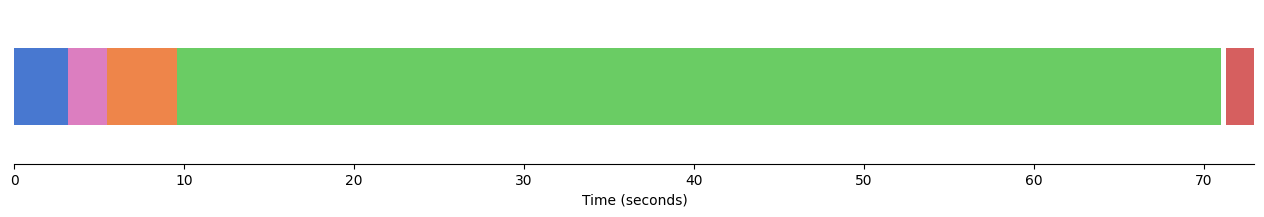

**************************************************


In [3]:
# Main annotation file
annotation_file = '../../Annotations/main_annotation.json'

# load the annotation file
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

    # iterate over each subject
    for subject in annotations['subjects']:
        print("*" * 50)
        subject_id = subject['subject_id']
        for trial in subject['trials']:
            trial_id = trial['trial_id']
            for stream_type, files in trial['streams'].items():
                if(stream_type == 'GoPro'):

                    annotation_file = None
                    gopro_file_name = None
                    gopro_file_path = None

                    for file in files:
                        # check if file['file_path'] ends with '.json'
                        if file['file_path'].endswith('.json'):
                            annotation_file = file['file_path']

                        if file['file_path'].endswith('.mp4'):
                            gopro_file_name = file['file_id']+ '.mp4'
                            gopro_file_path = file['file_path']

            if annotation_file and gopro_file_name:
                print(f"Subject: {subject['subject_id']}, Trial: {trial['trial_id']}")
                print(f"GoPro file name: {gopro_file_name}, GoPro file path: {gopro_file_path}")
                
                keysteps = trial['keysteps']
                
                # check if keysteps is not empty
                if not keysteps:
                    print("No keysteps found")
                else:
                    timeline_creator(gopro_file_path, keysteps, subject_id, trial_id)

                # print(f"Keysteps: {keysteps}")


In [2]:
# output_dir = 'output'
# plot_output_dir = f'{output_dir}/plot'
# video_output_dir = f'{output_dir}/visualized_video'

# data_dir = '/standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/DO_NOT_DELETE/ego_camera/clipped_with_audio/GX010305_clipped_with_audio.mp4'
# # annotations_file = '../../../Annotations/keysteps/GX010306_clipped_with_audio_KEYSTEP_ANNOTATION.json'
# annotations_file = '../../Annotations/keysteps/LATEST_KEYSTEPS.json'
# # annotations_file = '../../Annotations/main_annotation.json'

# # strip the file extension and add _with_timeline.mp4
# video_file = data_dir
# file_name = video_file.split('/')[-1]
# output_file = file_name.split('.')[0] + "_with_timeline_interventions.mp4"
# timeline_output_file = file_name.split('.')[0] + "_timeline_only.mp4"
# final_output_path = f'{video_output_dir}/{output_file}'
# print(f'output file: {final_output_path}')

# # make dirs if not exists
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# if not os.path.exists(plot_output_dir):
#     os.makedirs(plot_output_dir)
# if not os.path.exists(video_output_dir):
#     os.makedirs(video_output_dir)


output file: output/visualized_video/GX010305_clipped_with_audio_with_timeline_interventions.mp4


In [17]:
print(color_map)

{'administer_shock_aed': (0.2823529411764706, 0.47058823529411764, 0.8156862745098039), 'approach_patient': (0.5490196078431373, 0.3803921568627451, 0.23529411764705882), 'attach_defib_pads': (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), 'check_pulse_breathing': (0.4745098039215686, 0.4745098039215686, 0.4745098039215686), 'check_responsiveness': (0.41568627450980394, 0.8, 0.39215686274509803), 'chest_compressions': (0.5843137254901961, 0.4235294117647059, 0.7058823529411765), 'compress_bvm': (0.8627450980392157, 0.49411764705882355, 0.7529411764705882), 'no_action': (0.8352941176470589, 0.7333333333333333, 0.403921568627451), 'place_bvm': (0.9333333333333333, 0.5215686274509804, 0.2901960784313726)}


## Visualize above on the video

In [6]:

# Load the video with MoviePy
video_clip = VideoFileClip(video_file)
fps = video_clip.fps
duration = video_clip.duration

# Prepare to create timeline frames
frames = []

for t in np.linspace(0, duration, int(fps * duration)):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_xlim(0, max([end for _, end, _ in segments]))
    ax.set_ylim(0, 1)

    # Remove y-axis ticks, labels, and spines
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

    # set x axis label
    ax.set_xlabel("Time (seconds)")
    # Track which labels have been added to the legend
    labels_added = set()

    for start, end, label in segments:
        color = color_map[label]
        if label not in labels_added:
            ax.broken_barh([(start, end - start)], (0.25, 0.5), facecolors=color, label=label)
            labels_added.add(label)
        else:
            ax.broken_barh([(start, end - start)], (0.25, 0.5), facecolors=color)

    # Add legend below the x-axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=4, frameon=False)
    # Add a moving cursor
    ax.axvline(t, color='red', linewidth=2)
    
    fig.tight_layout()
    fig.canvas.draw()
    
    img_plot = np.array(fig.canvas.renderer.buffer_rgba())
    frames.append(img_plot)
    plt.close(fig)
    # break


# Create a clip from the frames
timeline_clip = ImageSequenceClip(frames, fps=fps)
timeline_clip = timeline_clip.set_duration(duration).resize(width=video_clip.w)

timeline_output_path = f'{video_output_dir}/{timeline_output_file}'
timeline_clip.write_videofile(timeline_output_path, fps=fps)



Moviepy - Building video output/visualized_video/GX010305_clipped_with_audio_timeline_only.mp4.
Moviepy - Writing video output/visualized_video/GX010305_clipped_with_audio_timeline_only.mp4



Moviepy - Done !
Moviepy - video ready output/visualized_video/GX010305_clipped_with_audio_timeline_only.mp4


### Use ffmpeg to combine videos

In [3]:
!module load ffmpeg

In [7]:
! ffmpeg

/bin/bash: ffmpeg: command not found


In [5]:
# execute shell commmand
original_file = data_dir
timeline_output_path = f'{video_output_dir}/{timeline_output_file}'


# replace spaces with \ in the file path
original_file = original_file.replace(' ', '\ ')
# update command to forcefully overwrite the output file
command = f'module load ffmpeg && ffmpeg -i {original_file} -i {timeline_output_path} -filter_complex "[1:v]fps=fps=30[v1];[0:v][v1]vstack=inputs=2" -c:v libx264 -c:a copy -r 30 -y {final_output_path}'

# import subprocess to execute the command
! {command}
# import subprocess as sp

# # execute the command
# sp.run(command, shell=True)


ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 8 (GCC)
  configuration: --prefix=/apps/software/standard/core/ffmpeg/5.1.2 --enable-pic --enable-shared --enable-gpl --enable-version3 --enable-nonfree --cc=gcc --cxx=g++ --enable-libx264 --enable-libx265 --enable-libmp3lame --enable-libfreetype --enable-fontconfig --enable-libfribidi --enable-sdl2
  libavutil      57. 28.100 / 57. 28.100
  libavcodec     59. 37.100 / 59. 37.100
  libavformat    59. 27.100 / 59. 27.100
  libavdevice    59.  7.100 / 59.  7.100
  libavfilter     8. 44.100 /  8. 44.100
  libswscale      6.  7.100 /  6.  7.100
  libswresample   4.  7.100 /  4.  7.100
  libpostproc    56.  6.100 / 56.  6.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/standard/UVA-DSA/NIST EMS Project Data/CognitiveEMS_Datasets/North_Garden/May_2024/DO_NOT_DELETE/ego_camera/clipped_with_audio/GX010305_clipped_with_audio.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_bran

In [92]:
frames[0].shape
# convert to pil image
from PIL import Image
img = Image.fromarray(frames[0])

# save image
img.save('test.png')



### Code to visualize label on the video

In [11]:
import json
import cv2
import matplotlib.pyplot as plt

# Load VIA annotation file
annotation_file = './via_project_28Aug2024_11h02m15s.json'

with open(annotation_file, 'r') as file:
    annotations = json.load(file)

# Extract relevant information from the JSON
video_info = annotations['file']['1']
video_filename = video_info['fname']
metadata = annotations['metadata']

# Load the video
cap = cv2.VideoCapture(video_filename)
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
output_filename = 'annotated_video_output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter(output_filename, fourcc, frame_rate, (frame_width, frame_height))

# Function to add annotation text on frames
def add_annotation(frame, text):
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    font_scale = 1
    color = (255, 0, 0)
    thickness = 2
    frame = cv2.putText(frame, text, org, font, font_scale, color, thickness, cv2.LINE_AA)
    return frame

# Process each annotation and save to video
for key, value in metadata.items():
    # Extract start time, end time, and label
    start_time = value['z'][0]
    end_time = value['z'][1]
    label = value['av']['1']
    
    # Convert times to frame numbers
    start_frame = int(start_time * frame_rate)
    end_frame = int(end_time * frame_rate)
    
    # Set the video to the start frame of the segment
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    
    # Write frames with annotation to output video
    for frame_num in range(start_frame, end_frame + 1):
        ret, frame = cap.read()
        if ret:
            # Add annotation text to frame
            annotated_frame = add_annotation(frame, f"Label: {label}")
            # Write the frame to the output video
            out.write(annotated_frame)
        else:
            print(f"Failed to read frame at {frame_num}.")
            break

# Release the video capture and writer objects
cap.release()
out.release()

print(f"Annotated video saved to {output_filename}")
